# 로지스틱 모델 이용 전 전처리

In [1]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 1.9 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#method : scaling, log transformation, cube Root normalization, Box-Cox transformation
from scipy.stats import skew 
from scipy.stats import boxcox

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/content/drive/MyDrive/기계학습 팀플/heart_2020_cleaned.csv')
df.shape

(319795, 18)

In [5]:
df = df.drop_duplicates()
df.shape

(301717, 18)

In [6]:
# noise 처리
df = df[(df['BMI'] < 80) & (df['SleepTime'] != 24)]
df.shape

(301653, 18)

In [7]:
def yesno_tolabel(x):
    if (x == 'Yes') | (x == 'Yes (during pregnancy)') :
        return 1
    else:
        return 0

In [8]:
sex_map = {'Female' : 0, 'Male' : 1}
health_map = {'Excellent' : 4, 'Very good' : 3, 'Good' : 2, 'Fair' : 1, 'Poor' : 0}
diabetic_map = {'Yes' : 2, 'Yes (during pregnancy)' : 2, 'No, borderline diabetes' : 1, 'No' : 0}
age_map = {'18-24' : 20, '25-29' : 25, '30-34' : 30, '35-39' : 35, '40-44' : 40, '45-49' : 45, '50-54' : 50, '55-59' : 55, '60-64' : 60, '65-69' : 65, '70-74' : 70, '75-79' : 75, '80 or older' : 80}
columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']
diabetic_map = {'Yes' : 2, 'Yes (during pregnancy)' : 2, 'No, borderline diabetes' : 1, 'No' : 0}
for column in columns:
    df[column] = df[column].apply(lambda x : yesno_tolabel(x))

df['Sex'] = df['Sex'].map(sex_map)
df['GenHealth'] = df['GenHealth'].map(health_map)
df['Diabetic'] = df['Diabetic'].map(diabetic_map)
df['AgeCategory'] = df['AgeCategory'].map(age_map)

In [9]:
df

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0                  0  16.60        1                0       0             3.0   
1                  0  20.34        0                0       1             0.0   
2                  0  26.58        1                0       0            20.0   
3                  0  24.21        0                0       0             0.0   
4                  0  23.71        0                0       0            28.0   
...              ...    ...      ...              ...     ...             ...   
319790             1  27.41        1                0       0             7.0   
319791             0  29.84        1                0       0             0.0   
319792             0  24.24        0                0       0             0.0   
319793             0  32.81        0                0       0             0.0   
319794             0  46.56        0                0       0             0.0   

        MentalHealth  DiffWalking  Sex  AgeCategory      Race  Diabetic  \
0               30.0            0    0           55     White         2   
1                0.0            0    0           80     White         0   
2               30.0            0    1           65     White         2   
3                0.0            0    0           75     White         0   
4                0.0            1    0           40     White         0   
...              ...          ...  ...          ...       ...       ...   
319790           0.0            1    1           60  Hispanic         2   
319791           0.0            0    1           35  Hispanic         0   
319792           0.0            0    0           45  Hispanic         0   
319793           0.0            0    0           25  Hispanic         0   
319794           0.0            0    0           80  Hispanic         0   

        PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  \
0                      1          3        5.0       1              0   
1                      1          3        7.0       0              0   
2                      1          1        8.0       1              0   
3                      0          2        6.0       0              0   
4                      1          3        8.0       0              0   
...                  ...        ...        ...     ...            ...   
319790                 0          1        6.0       1              0   
319791                 1          3        5.0       1              0   
319792                 1          2        6.0       0              0   
319793                 0          2       12.0       0              0   
319794                 1          2        8.0       0              0   

        SkinCancer  
0                1  
1                0  
2                0  
3                1  
4                0  
...            ...  
319790           0  
319791           0  
319792           0  
319793           0  
319794           0  

[301653 rows x 18 columns]

In [10]:
def quantile_operation(outlier_df, column):
    quantile_1 = outlier_df[column].quantile(0.25)
    quantile_3 = outlier_df[column].quantile(0.75)
    iqr = quantile_3 - quantile_1
    Lower_tail = quantile_1 - 1.5 * iqr
    Upper_tail = quantile_3 + 1.5 * iqr

    return Lower_tail, Upper_tail

In [11]:

df['PhysicalHealth'] = df['PhysicalHealth'] + 1
df['MentalHealth'] = df['MentalHealth'] + 1
outlier_columns = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
for column in outlier_columns:
    Lower_tail, Upper_tail = quantile_operation(df, column)
    df[column] = boxcox(df[column])[0]

In [12]:
#Race 인코딩 - Binary
import category_encoders as ce
import pandas as pd

ce_binary = ce.BinaryEncoder(cols = ['Race'], return_df = True)
ce_binary_encoded = ce_binary.fit_transform(df['Race'])

df = pd.concat([df, ce_binary_encoded], axis = 1).drop(['Race'], axis = 1)

In [13]:
df

HeartDisease       BMI  Smoking  AlcoholDrinking  Stroke  \
0                  0  1.403407        1                0       0   
1                  0  1.442302        0                0       1   
2                  0  1.487128        1                0       0   
3                  0  1.472250        0                0       0   
4                  0  1.468816        0                0       0   
...              ...       ...      ...              ...     ...   
319790             1  1.491857        1                0       0   
319791             0  1.504497        1                0       0   
319792             0  1.472452        0                0       0   
319793             0  1.517915        0                0       0   
319794             0  1.561599        0                0       0   

        PhysicalHealth  MentalHealth  DiffWalking  Sex  AgeCategory  Diabetic  \
0             0.669364      1.089487            0    0           55         2   
1             0.000000      0.000000            0    0           80         0   
2             0.801003      1.089487            0    1           65         2   
3             0.000000      0.000000            0    0           75         0   
4             0.807551      0.000000            1    0           40         0   
...                ...           ...          ...  ...          ...       ...   
319790        0.755892      0.000000            1    1           60         2   
319791        0.000000      0.000000            0    1           35         0   
319792        0.000000      0.000000            0    0           45         0   
319793        0.000000      0.000000            0    0           25         0   
319794        0.000000      0.000000            0    0           80         0   

        PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  \
0                      1          3   3.488639       1              0   
1                      1          3   5.054525       0              0   
2                      1          1   5.813435       1              0   
3                      0          2   4.280563       0              0   
4                      1          3   5.813435       0              0   
...                  ...        ...        ...     ...            ...   
319790                 0          1   4.280563       1              0   
319791                 1          3   3.488639       1              0   
319792                 1          2   4.280563       0              0   
319793                 0          2   8.734516       0              0   
319794                 1          2   5.813435       0              0   

        SkinCancer  Race_0  Race_1  Race_2  
0                1       0       0       1  
1                0       0       0       1  
2                0       0       0       1  
3                1       0       0       1  
4                0       0       0       1  
...            ...     ...     ...     ...  
319790           0       1       1       0  
319791           0       1       1       0  
319792           0       1       1       0  
319793           0       1       1       0  
319794           0       1       1       0  

[301653 rows x 20 columns]

In [14]:
# x y분리
x=df.drop('HeartDisease', axis=1)
x_columns=x.columns
y=df['HeartDisease']

In [15]:
# train test 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2,random_state = 42)

In [16]:
# 데이터 불균형 처리 전 상태

print('origin target data :\n', df['HeartDisease'].value_counts())

origin target data :
 0    274401
1     27252
Name: HeartDisease, dtype: int64


In [17]:
# 언더 샘플링 처리 <- 코드만 남겨둠
from imblearn.under_sampling import *

#CNN
#x_train_CNN, y_train_CNN =CondensedNearestNeighbour(random_state=42).fit_resample(x_train, y_train) 

#ENN
#x_train_ENN, y_train_ENN =EditedNearestNeighbours(kind_sel="all", n_neighbors=5).fit_resample(x_train, y_train) 

#Tomek's link
#x_train_Tomek, y_train_Tomek =TomekLinks().fit_resample(x_train, y_train) 

#OSS
#x_train_OSS, y_train_OSS =OneSidedSelection(random_state=42).fit_resample(x_train, y_train) 

#NCR
#x_train_NCR, y_train_NCR =NeighbourhoodCleaningRule().fit_resample(x_train, y_train) 


#NearMiss-1
#x_train_NearMiss, y_train_NearMiss=NearMiss().fit_resample(x_train, y_train) 

In [ ]:
# # 언더 샘플링 결과 보기

# print('befor undersampling :\n', y_train.value_counts())
# print('\nAfter CNN :\n', y_train_CNN.value_counts())
# print('\n\n')

# print('befor undersampling :\n', y_train.value_counts()) 
# print('\nAfter ENN :\n', y_train_ENN.value_counts())
# print('\n\n')

# print('befor undersampling :\n', y_train.value_counts())  
# print('\nAfter TomekLink :\n', y_train_Tomek.value_counts())
# print('\n\n')

# print('befor undersampling :\n', y_train.value_counts()) 
# print('\nAfter OSS :\n', y_train_OSS.value_counts())
# print('\n\n')

# print('befor undersampling :\n', y_train.value_counts()) 
# print('\nAfter NCR :\n', y_train_NCR.value_counts())
# print('\n\n')

# print('befor undersampling :\n', y_train.value_counts()) 
# print('\nAfter NearMiss :\n', y_train_NearMiss.value_counts())
# print('\n\n')

In [18]:
##오버샘플링 처리
from imblearn.over_sampling import *

#SMOTE
x_train_SMOTE, y_train_SMOTE =SMOTE(random_state=42).fit_resample(x_train, y_train) 

#BorderlineSMOTE
x_train_BorderlineSM, y_train_BorderlineSM =BorderlineSMOTE(random_state=42).fit_resample(x_train, y_train) 

#SVMSMOTE
x_train_SVMSMOTE, y_train_SVMSMOTE =SVMSMOTE(random_state=42).fit_resample(x_train, y_train) 

#ADASYN
x_train_ADASYN, y_train_ADASYN =ADASYN(random_state=42).fit_resample(x_train, y_train) 

In [19]:
#오버 샘플링 결과

print('befor oversampling :\n', y_train.value_counts())
print('\nAfter SMOTE :\n', y_train_SMOTE.value_counts())
print('\n\n')
print('befor oversampling :\n', y_train.value_counts())
print('\nAfter BoderlineSMOTE :\n', y_train_BorderlineSM.value_counts())
print('\n\n')
print('befor oversampling :\n', y_train.value_counts())
print('\nAfter SVMSMOTE :\n', y_train_SVMSMOTE.value_counts())
print('\n\n')
print('befor oversampling :\n', y_train.value_counts())
print('\nAfter ADASYN :\n', y_train_ADASYN.value_counts())
print('\n\n')

befor oversampling :
 0    219556
1     21766
Name: HeartDisease, dtype: int64

After SMOTE :
 1    219556
0    219556
Name: HeartDisease, dtype: int64



befor oversampling :
 0    219556
1     21766
Name: HeartDisease, dtype: int64

After BoderlineSMOTE :
 1    219556
0    219556
Name: HeartDisease, dtype: int64



befor oversampling :
 0    219556
1     21766
Name: HeartDisease, dtype: int64

After SVMSMOTE :
 1    219556
0    219556
Name: HeartDisease, dtype: int64



befor oversampling :
 0    219556
1     21766
Name: HeartDisease, dtype: int64

After ADASYN :
 1    220152
0    219556
Name: HeartDisease, dtype: int64





In [20]:
# 복합 샘플링 진행 
from imblearn.combine import *

## SMOTETomek 
#x_train_SMOTETomek, y_train_SMOTETomek =SMOTETomek(random_state=42).fit_resample(x_train, y_train)  

#SMOTETENN
x_train_SMOTEENN, y_train_SMOTEENN =SMOTEENN(random_state=42).fit_resample(x_train, y_train) 

In [21]:
#복합 샘플링 결과
# print('befor combinesampling :\n', y_train.value_counts())
# print('\nAfter SMOTETomek :\n', y_train_SMOTETomek.value_counts())
# print('\n\n')
print('befor combinesampling :\n', y_train.value_counts())
print('\nAfter SMOTEENN :\n', y_train_SMOTEENN.value_counts())

befor combinesampling :
 0    219556
1     21766
Name: HeartDisease, dtype: int64

After SMOTEENN :
 1    173552
0    163441
Name: HeartDisease, dtype: int64


# 모델 적용

Accuracy 0.9104108998690557
Precision 0.5367847411444142
Recall 0.1077287641268684
F1 0.17944436010323367
AUC 0.8362456775494336
[[54335   510]
 [ 4895   591]]


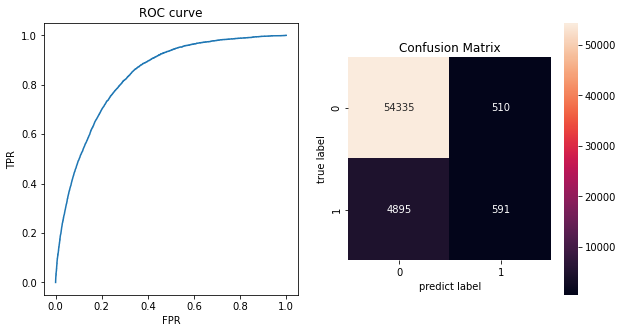

In [23]:
#로지스틱 이용 샘플링 안한경우
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Display confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)


print(f"Accuracy {acc}")
print(f"Precision {prec}")
print(f"Recall {rec}")
print(f"F1 {f1}")
print(f"AUC {auc}")

print(cm)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('ROC curve')
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')


plt.subplot(1,2,2)
plt.title('Confusion Matrix')
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar='False')
plt.xlabel('predict label')
plt.ylabel('true label')
plt.show()

Accuracy 0.7361389667003696
Precision 0.2203698740284106
Recall 0.7493620123951877
F1 0.34058241166480263
AUC 0.8153898284320772
[[40301 14544]
 [ 1375  4111]]


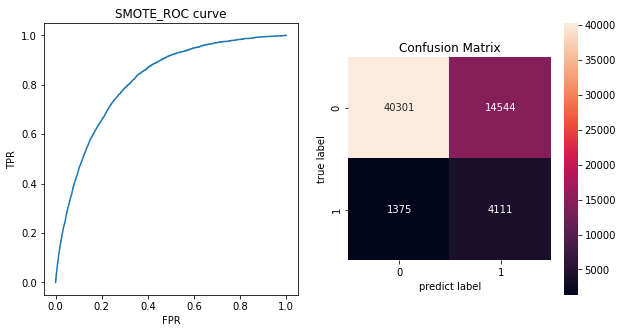

In [24]:
#SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model_SMOTE = LogisticRegression()
model_SMOTE.fit(x_train_SMOTE, y_train_SMOTE)
y_pred = model_SMOTE.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
y_pred_proba = model_SMOTE.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Display confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)


print(f"Accuracy {acc}")
print(f"Precision {prec}")
print(f"Recall {rec}")
print(f"F1 {f1}")
print(f"AUC {auc}")

print(cm)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('SMOTE_ROC curve')
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')


plt.subplot(1,2,2)
plt.title('Confusion Matrix')
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar='False')
plt.xlabel('predict label')
plt.ylabel('true label')
plt.show()

Accuracy 0.7609189305663755
Precision 0.2357185097575399
Recall 0.7265767407947503
F1 0.3559564207894267
AUC 0.8223320688300411
[[41921 12924]
 [ 1500  3986]]


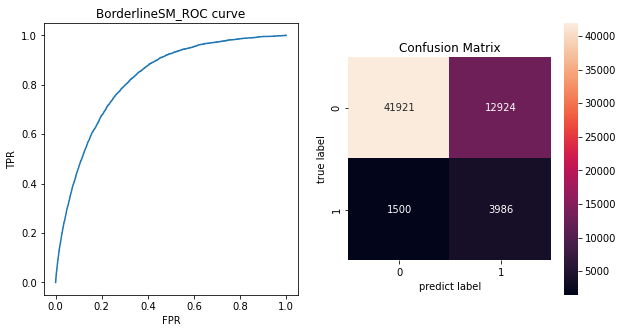

In [25]:
#BorderlineSMote
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model_BorderlineSM = LogisticRegression()
model_BorderlineSM.fit(x_train_BorderlineSM, y_train_BorderlineSM)
y_pred = model_BorderlineSM.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
y_pred_proba = model_BorderlineSM.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Display confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)


print(f"Accuracy {acc}")
print(f"Precision {prec}")
print(f"Recall {rec}")
print(f"F1 {f1}")
print(f"AUC {auc}")

print(cm)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('BorderlineSM_ROC curve')
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')


plt.subplot(1,2,2)
plt.title('Confusion Matrix')
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar='False')
plt.xlabel('predict label')
plt.ylabel('true label')
plt.show()

Accuracy 0.8071472377384761
Precision 0.26937214012452176
Recall 0.6545752825373679
F1 0.38167614391241966
AUC 0.8309714395126797
[[45105  9740]
 [ 1895  3591]]


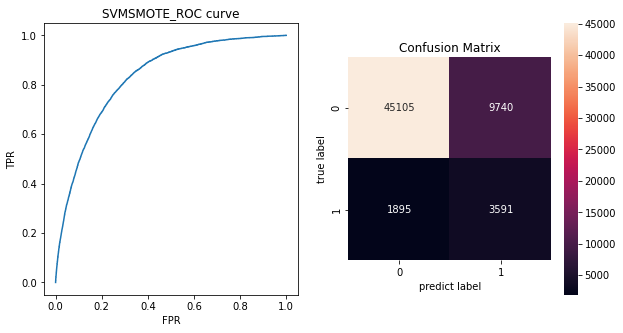

In [26]:
#SVMSMote
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model_SVMSMOTE = LogisticRegression()
model_SVMSMOTE.fit(x_train_SVMSMOTE, y_train_SVMSMOTE)
y_pred = model_SVMSMOTE.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
y_pred_proba = model_SVMSMOTE.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Display confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)


print(f"Accuracy {acc}")
print(f"Precision {prec}")
print(f"Recall {rec}")
print(f"F1 {f1}")
print(f"AUC {auc}")

print(cm)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('SVMSMOTE_ROC curve')
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')


plt.subplot(1,2,2)
plt.title('Confusion Matrix')
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar='False')
plt.xlabel('predict label')
plt.ylabel('true label')
plt.show()

Accuracy 0.7161492433409027
Precision 0.2103141022450097
Recall 0.7701421800947867
F1 0.3304007820136853
AUC 0.811689272658402
[[38981 15864]
 [ 1261  4225]]


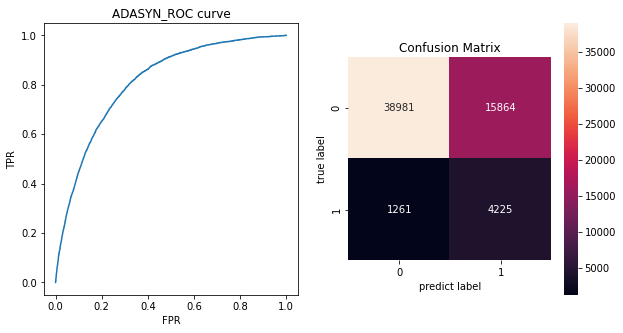

In [27]:
#ADASYN
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model_ADASYN = LogisticRegression()
model_ADASYN.fit(x_train_ADASYN, y_train_ADASYN)
y_pred = model_ADASYN.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
y_pred_proba = model_ADASYN.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Display confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)


print(f"Accuracy {acc}")
print(f"Precision {prec}")
print(f"Recall {rec}")
print(f"F1 {f1}")
print(f"AUC {auc}")

print(cm)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('ADASYN_ROC curve')
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')


plt.subplot(1,2,2)
plt.title('Confusion Matrix')
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar='False')
plt.xlabel('predict label')
plt.ylabel('true label')
plt.show()

Accuracy 0.7119225605410154
Precision 0.2131210805595755
Recall 0.8053226394458622
F1 0.33704607873054626
AUC 0.8277880406476118
[[38533 16312]
 [ 1068  4418]]


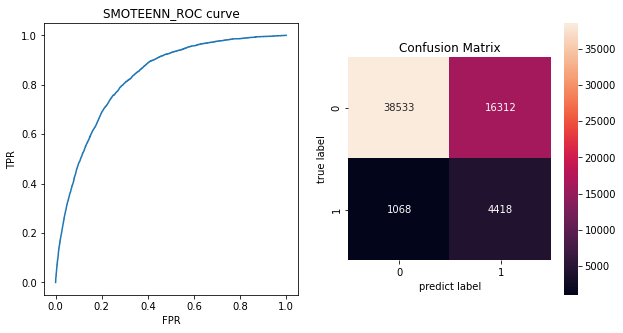

In [28]:
#SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model_SMOTEENN = LogisticRegression()
model_SMOTEENN.fit(x_train_SMOTEENN, y_train_SMOTEENN)
y_pred = model_SMOTEENN.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
y_pred_proba = model_SMOTEENN.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Display confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)


print(f"Accuracy {acc}")
print(f"Precision {prec}")
print(f"Recall {rec}")
print(f"F1 {f1}")
print(f"AUC {auc}")

print(cm)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('SMOTEENN_ROC curve')
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')


plt.subplot(1,2,2)
plt.title('Confusion Matrix')
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar='False')
plt.xlabel('predict label')
plt.ylabel('true label')
plt.show()

Accuracy 0.745537120220119
Precision 0.2319021739130435
Recall 0.7777980313525337
F1 0.357280415306037
AUC 0.8368198838426005
[[40712 14133]
 [ 1219  4267]]


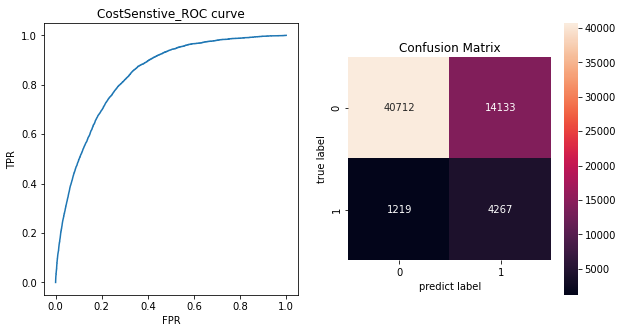

In [29]:
#Costsensitive
#원본 데이터를 가지고 class-weight 이용 로지스틱
model_cost = LogisticRegression(class_weight='balanced')
model_cost.fit(x_train, y_train)
y_pred = model_cost.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

y_pred_proba = model_cost.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Display confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)


print(f"Accuracy {acc}")
print(f"Precision {prec}")
print(f"Recall {rec}")
print(f"F1 {f1}")
print(f"AUC {auc}")

print(cm)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('CostSenstive_ROC curve')
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')


plt.subplot(1,2,2)
plt.title('Confusion Matrix')
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar='False')
plt.xlabel('predict label')
plt.ylabel('true label')
plt.show()

# 하이퍼 파라미터 튜닝 후 결과

Accuracy 0.9103280237357246
Precision 0.5341726618705036
Recall 0.1082756106452789
F1 0.18005456198848135
AUC 0.8361867403670046
[[54327   518]
 [ 4892   594]]


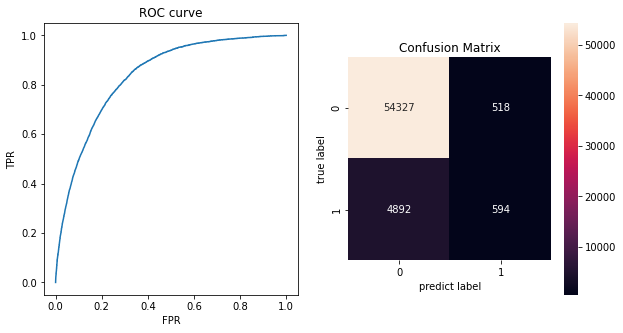

In [30]:
#원본-> 하이퍼파라미터 튜닝
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression(C=0.1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Display confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)


print(f"Accuracy {acc}")
print(f"Precision {prec}")
print(f"Recall {rec}")
print(f"F1 {f1}")
print(f"AUC {auc}")

print(cm)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('ROC curve')
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')


plt.subplot(1,2,2)
plt.title('Confusion Matrix')
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar='False')
plt.xlabel('predict label')
plt.ylabel('true label')
plt.show()

Accuracy 0.7361555419270358
Precision 0.220920278223649
Recall 0.7526430915056508
F1 0.34157842488418266
AUC 0.8152072139004938
[[40284 14561]
 [ 1357  4129]]


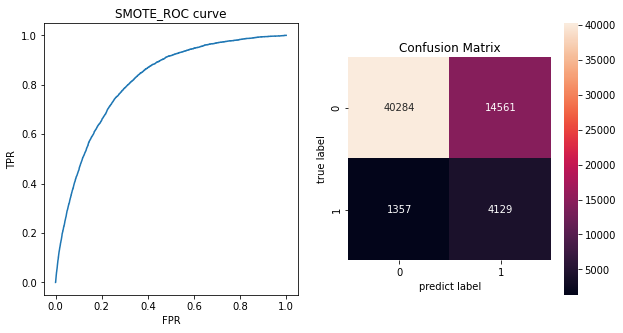

In [31]:
#SMOTE -> 하이퍼파라미터 튜닝
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model_SMOTE = LogisticRegression(C=0.1)
model_SMOTE.fit(x_train_SMOTE, y_train_SMOTE)
y_pred = model_SMOTE.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
y_pred_proba = model_SMOTE.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Display confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)


print(f"Accuracy {acc}")
print(f"Precision {prec}")
print(f"Recall {rec}")
print(f"F1 {f1}")
print(f"AUC {auc}")

print(cm)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('SMOTE_ROC curve')
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')


plt.subplot(1,2,2)
plt.title('Confusion Matrix')
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar='False')
plt.xlabel('predict label')
plt.ylabel('true label')
plt.show()

Accuracy 0.7611178332863702
Precision 0.23597964978703265
Recall 0.7271235873131607
F1 0.3563197856185797
AUC 0.8224636563181553
[[41930 12915]
 [ 1497  3989]]


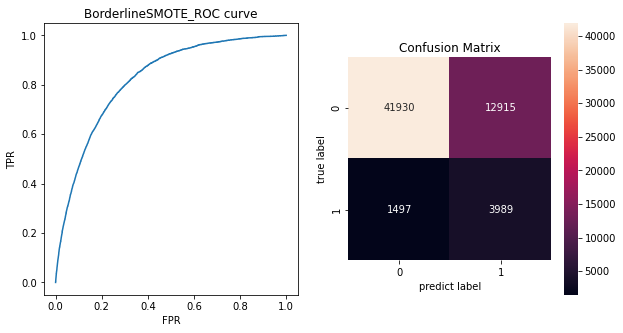

In [32]:
#BoderlineSMOTE -> 하이퍼파라미터 튜닝
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model_BorderlineSM = LogisticRegression(C=0.1)
model_BorderlineSM.fit(x_train_BorderlineSM, y_train_BorderlineSM)
y_pred = model_BorderlineSM.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
y_pred_proba = model_BorderlineSM.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Display confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)


print(f"Accuracy {acc}")
print(f"Precision {prec}")
print(f"Recall {rec}")
print(f"F1 {f1}")
print(f"AUC {auc}")

print(cm)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('BorderlineSMOTE_ROC curve')
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')


plt.subplot(1,2,2)
plt.title('Confusion Matrix')
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar='False')
plt.xlabel('predict label')
plt.ylabel('true label')
plt.show()

Accuracy 0.8070809368318111
Precision 0.2693259353677739
Recall 0.6547575647101713
F1 0.3816607342081496
AUC 0.8319873539478424
[[45100  9745]
 [ 1894  3592]]


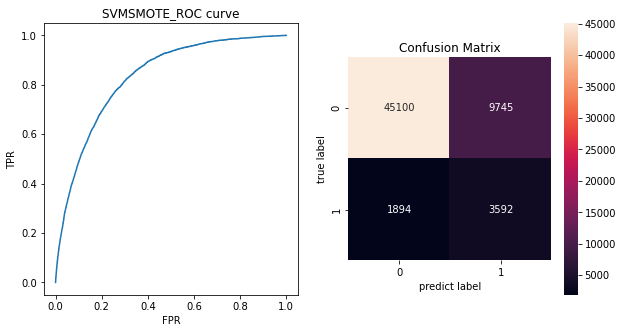

In [33]:
#SVMSMOTE -> 하이퍼파라미터 튜닝
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model_SVMSMOTE = LogisticRegression(C=0.1)
model_SVMSMOTE.fit(x_train_SVMSMOTE, y_train_SVMSMOTE)
y_pred = model_SVMSMOTE.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
y_pred_proba = model_SVMSMOTE.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Display confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)


print(f"Accuracy {acc}")
print(f"Precision {prec}")
print(f"Recall {rec}")
print(f"F1 {f1}")
print(f"AUC {auc}")

print(cm)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('SVMSMOTE_ROC curve')
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')


plt.subplot(1,2,2)
plt.title('Confusion Matrix')
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar='False')
plt.xlabel('predict label')
plt.ylabel('true label')
plt.show()

Accuracy 0.715436508594255
Precision 0.20995133578309663
Recall 0.7706890266131973
F1 0.3300031220730565
AUC 0.8115613344696901
[[38935 15910]
 [ 1258  4228]]


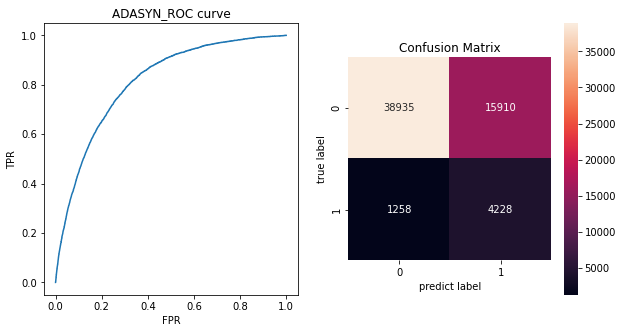

In [34]:
#ADASYN -> 하이퍼파라미터 튜닝
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model_ADASYN = LogisticRegression(C=0.1)
model_ADASYN.fit(x_train_ADASYN, y_train_ADASYN)
y_pred = model_ADASYN.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
y_pred_proba = model_ADASYN.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Display confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)


print(f"Accuracy {acc}")
print(f"Precision {prec}")
print(f"Recall {rec}")
print(f"F1 {f1}")
print(f"AUC {auc}")

print(cm)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('ADASYN_ROC curve')
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')


plt.subplot(1,2,2)
plt.title('Confusion Matrix')
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar='False')
plt.xlabel('predict label')
plt.ylabel('true label')
plt.show()

Accuracy 0.7115579055543585
Precision 0.21322680015402387
Recall 0.8075100255195042
F1 0.3373695834285279
AUC 0.8281399853303482
[[38499 16346]
 [ 1056  4430]]


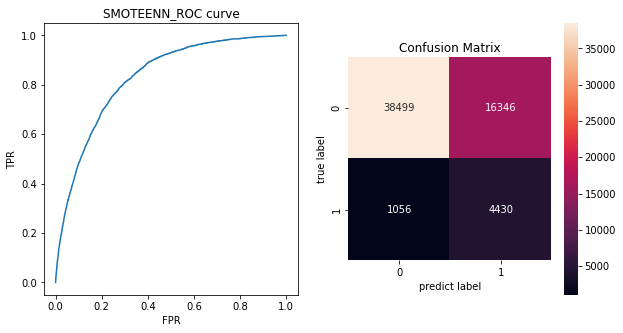

In [35]:
#SMOTEENN->하이퍼파라미터 튜닝
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model_SMOTEENN = LogisticRegression(C=0.1)
model_SMOTEENN.fit(x_train_SMOTEENN, y_train_SMOTEENN)
y_pred = model_SMOTEENN.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
y_pred_proba = model_SMOTEENN.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Display confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)


print(f"Accuracy {acc}")
print(f"Precision {prec}")
print(f"Recall {rec}")
print(f"F1 {f1}")
print(f"AUC {auc}")

print(cm)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('SMOTEENN_ROC curve')
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')


plt.subplot(1,2,2)
plt.title('Confusion Matrix')
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar='False')
plt.xlabel('predict label')
plt.ylabel('true label')
plt.show()

Accuracy 0.745172465233462
Precision 0.23165436387320887
Recall 0.7779803135253373
F1 0.3570054370556253
AUC 0.836828664761564
[[40689 14156]
 [ 1218  4268]]


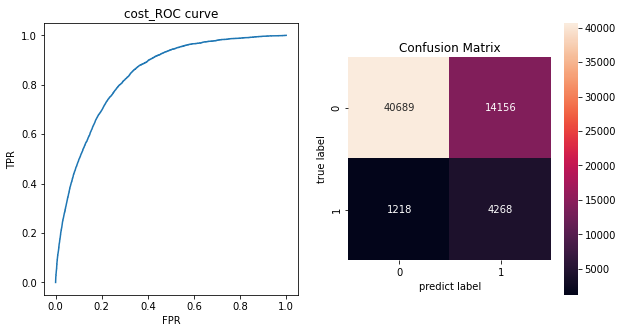

In [36]:
#CostSensitive -> 하이퍼파라미터 튜닝
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model_cost = LogisticRegression(C=0.1,class_weight='balanced')
model_cost.fit(x_train, y_train)
y_pred = model_cost.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
y_pred_proba = model_cost.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Display confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)


print(f"Accuracy {acc}")
print(f"Precision {prec}")
print(f"Recall {rec}")
print(f"F1 {f1}")
print(f"AUC {auc}")

print(cm)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('cost_ROC curve')
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')


plt.subplot(1,2,2)
plt.title('Confusion Matrix')
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar='False')
plt.xlabel('predict label')
plt.ylabel('true label')
plt.show()

# 추후 샘플링 시간 절약을 위한 각 데이터 세트 내보내기

In [ ]:
x_train.to_csv('/content/drive/MyDrive/기계학습 팀플/Binary/x_train.csv')
y_train.to_csv('/content/drive/MyDrive/기계학습 팀플/Binary/y_train.csv')
x_test.to_csv('/content/drive/MyDrive/기계학습 팀플/Binary/x_test.csv')
y_test.to_csv('/content/drive/MyDrive/기계학습 팀플/Binary/y_test.csv')
x_train_SMOTE.to_csv('/content/drive/MyDrive/기계학습 팀플/Binary/x_train_SMOTE.csv')
y_train_SMOTE.to_csv('/content/drive/MyDrive/기계학습 팀플/Binary/y_train_SMOTE.csv')
x_train_BorderlineSM.to_csv('/content/drive/MyDrive/기계학습 팀플/Binary/x_train_BorderlineSM.csv')
y_train_BorderlineSM.to_csv('/content/drive/MyDrive/기계학습 팀플/Binary/y_train_BorderlineSM.csv')
x_train_SVMSMOTE.to_csv('/content/drive/MyDrive/기계학습 팀플/Binary/x_train_SVMSMOTE.csv')
y_train_SVMSMOTE.to_csv('/content/drive/MyDrive/기계학습 팀플/Binary/y_train_SVMSMOTE.csv')
x_train_ADASYN.to_csv('/content/drive/MyDrive/기계학습 팀플/Binary/x_train_ADASYN.csv')
y_train_ADASYN.to_csv('/content/drive/MyDrive/기계학습 팀플/Binary/y_train_ADASYN.csv')
x_train_SMOTEENN.to_csv('/content/drive/MyDrive/기계학습 팀플/Binary/x_train_SMOTEENN.csv')
y_train_SMOTEENN.to_csv('/content/drive/MyDrive/기계학습 팀플/Binary/y_train_SMOTEENN.csv')

# XAI 이용

In [37]:
!pip install pdpbox
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.0 MB 145 kB/s 
     |████████████████████████████████| 13.1 MB 41.7 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=802c71ac3e7063cb2d8247b1413589122760801ea5969abfe3006cdc902410cf
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 7.2 MB/s 


In [48]:
from pdpbox import pdp
import shap
print(x_test.columns)
#분포를 보기위해 yes no와 그 외로 피쳐 분리
feature = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',  'PhysicalActivity',   'Asthma', 'KidneyDisease',
       'SkinCancer', 'Diabetic', 'Race_0', 'Race_1', 'Race_2']
feature2=['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory',  'GenHealth', 'SleepTime']

features = x_test.columns

Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Race_0', 'Race_1', 'Race_2'],
      dtype='object')


# 샘플링 안한 경우 PDP, ICE, SHAP

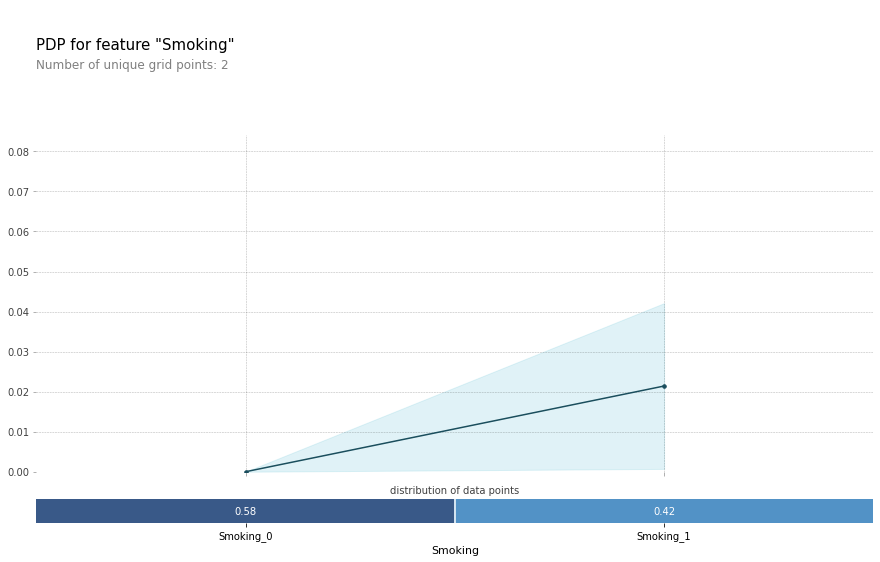

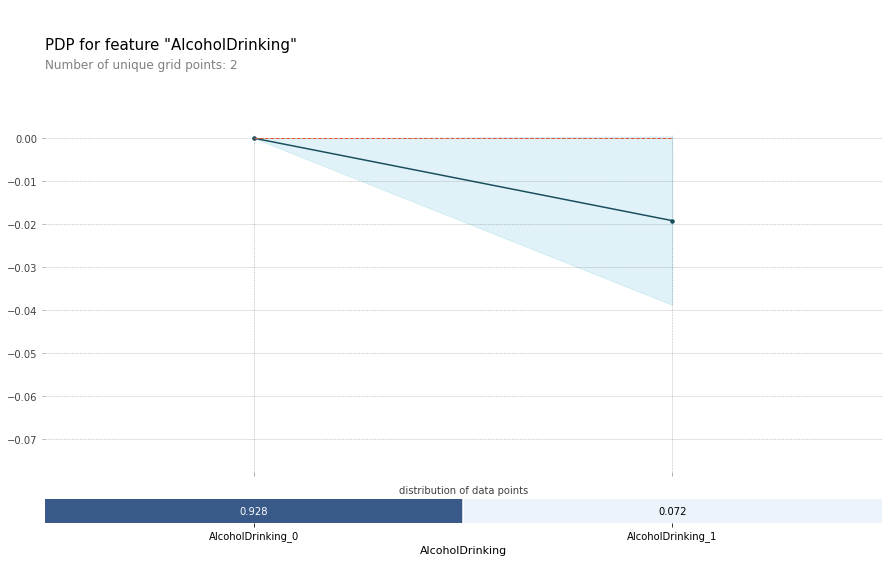

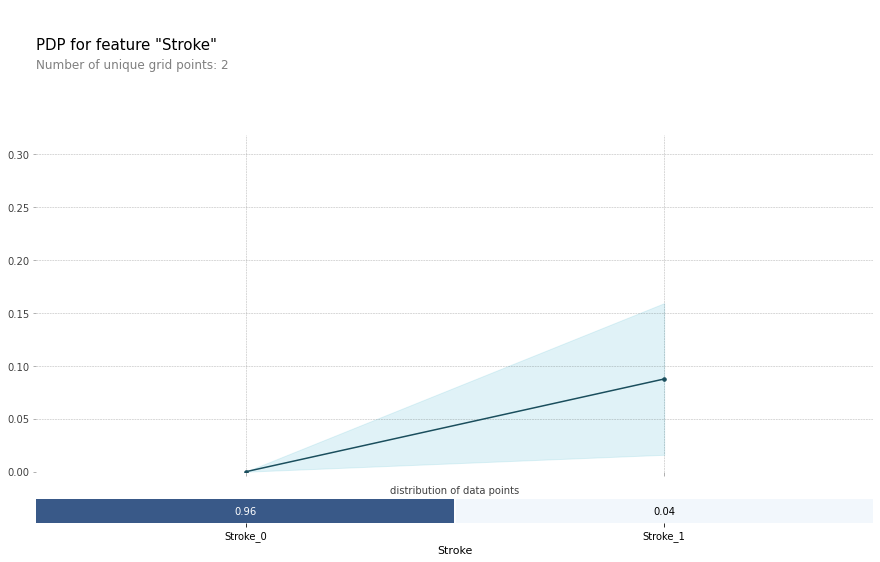

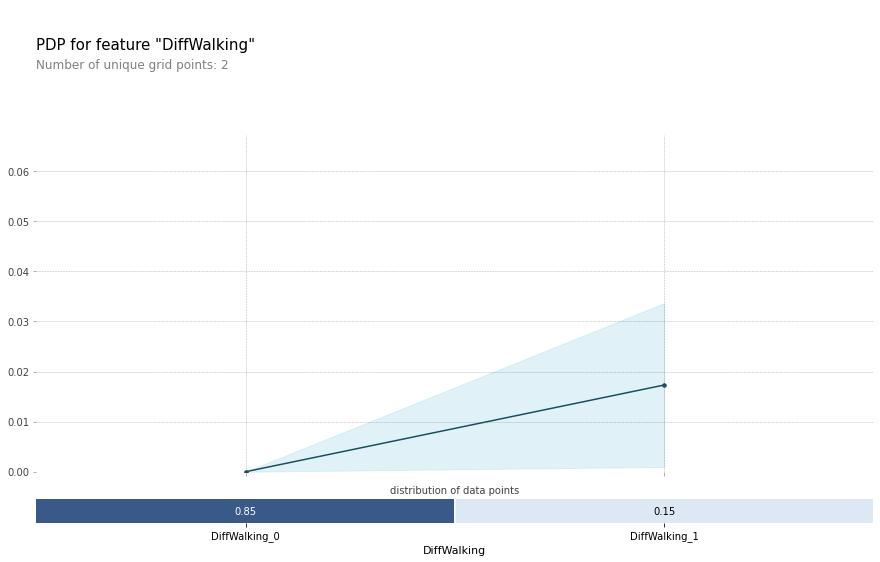

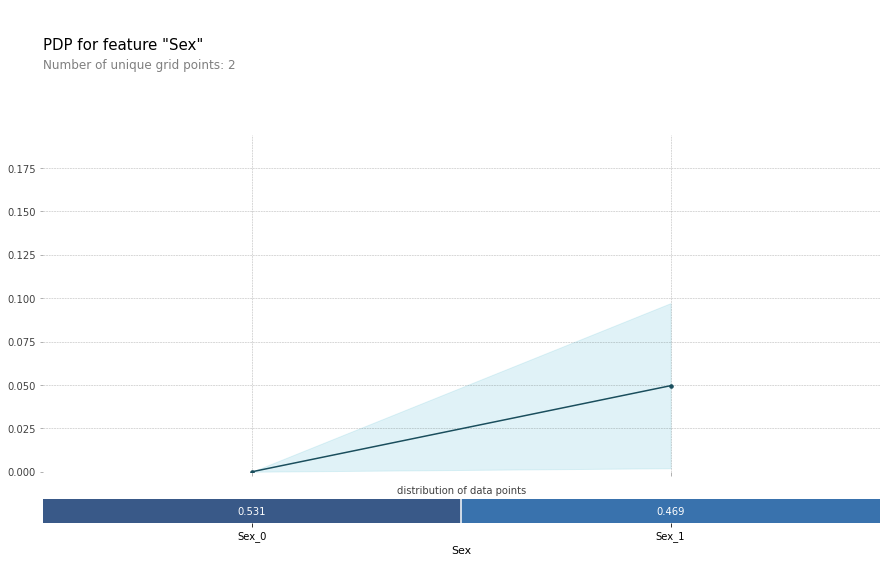

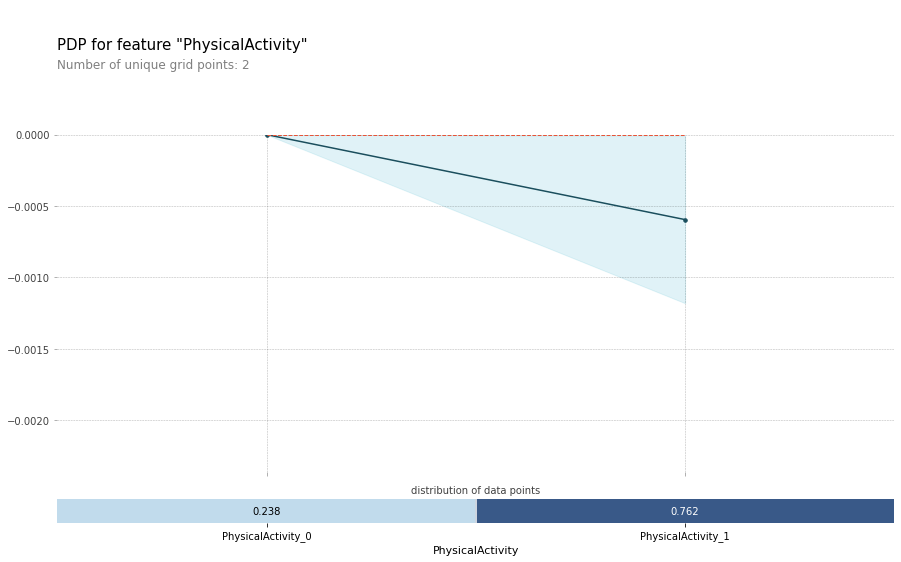

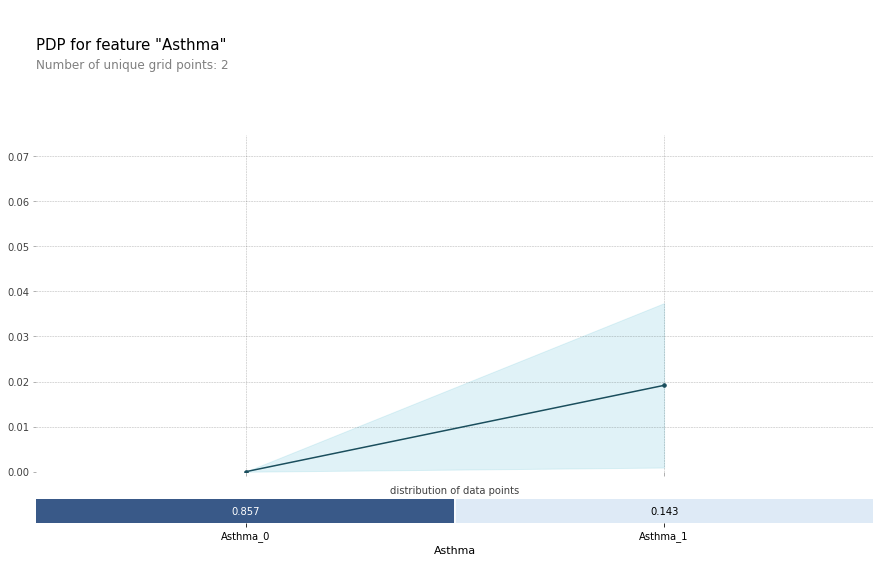

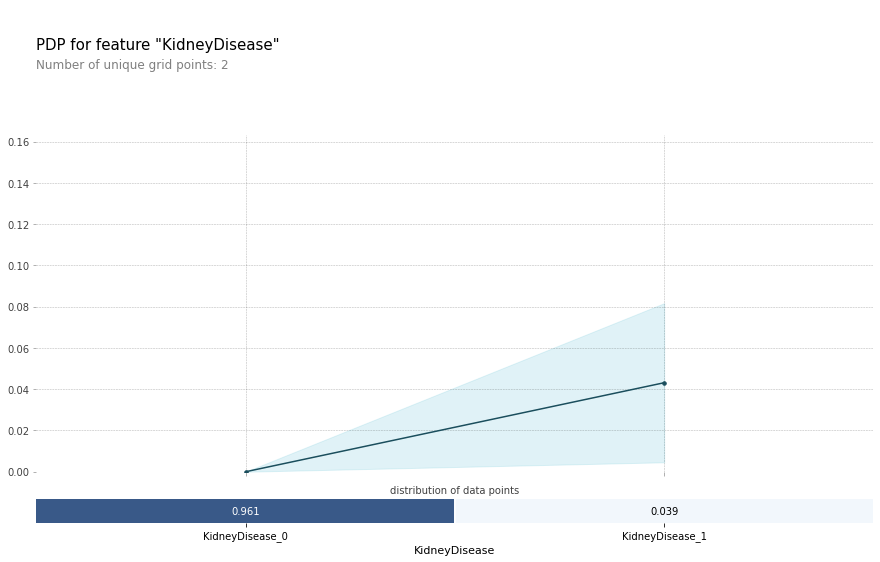

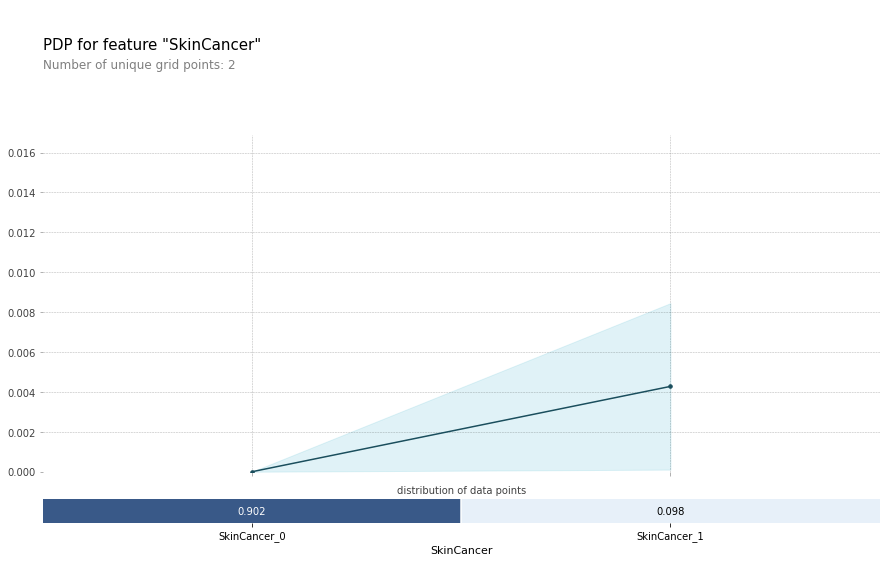

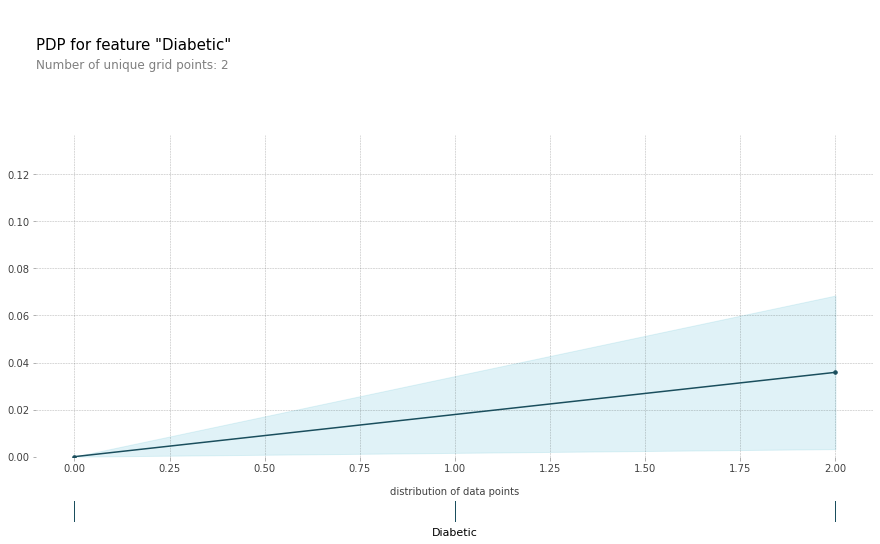

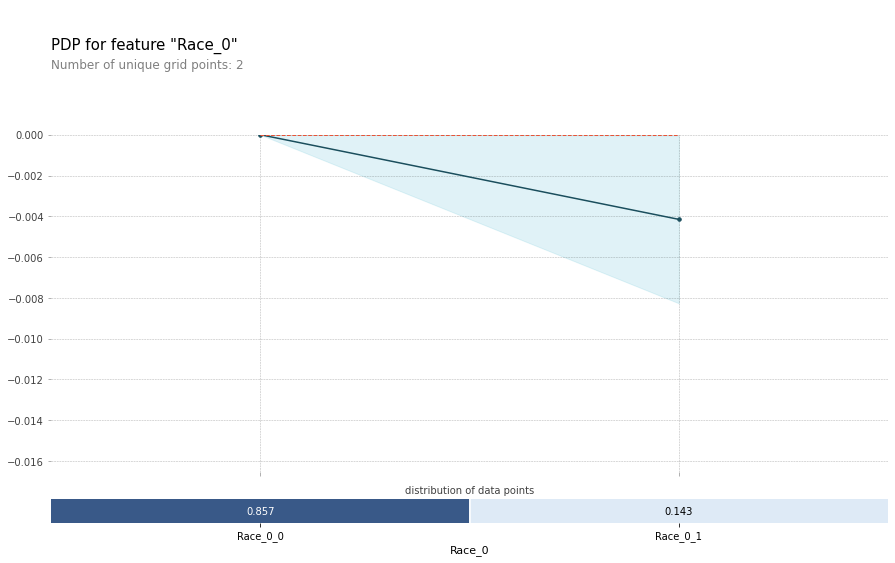

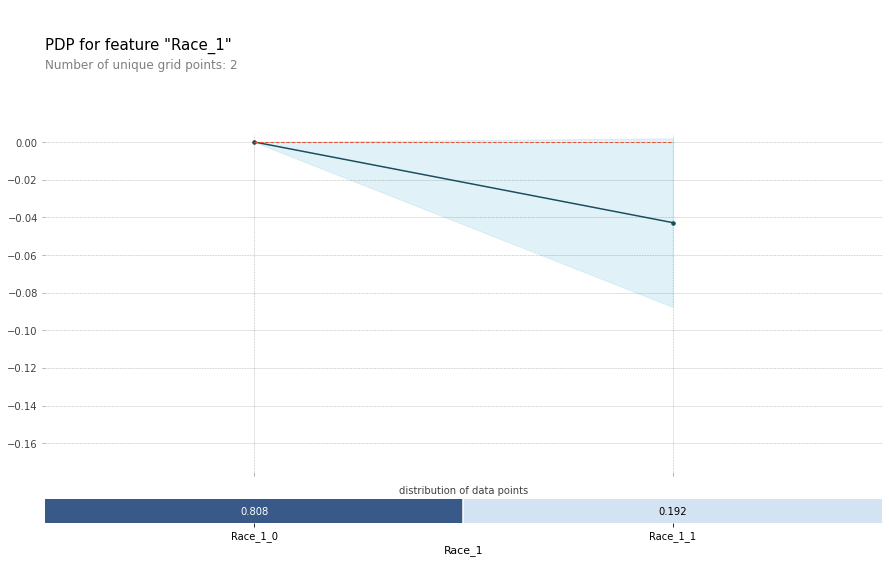

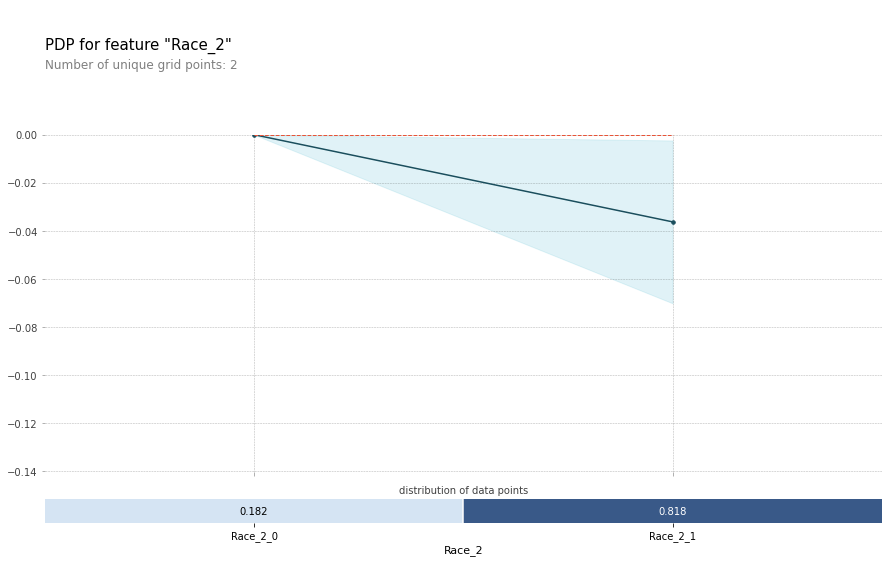

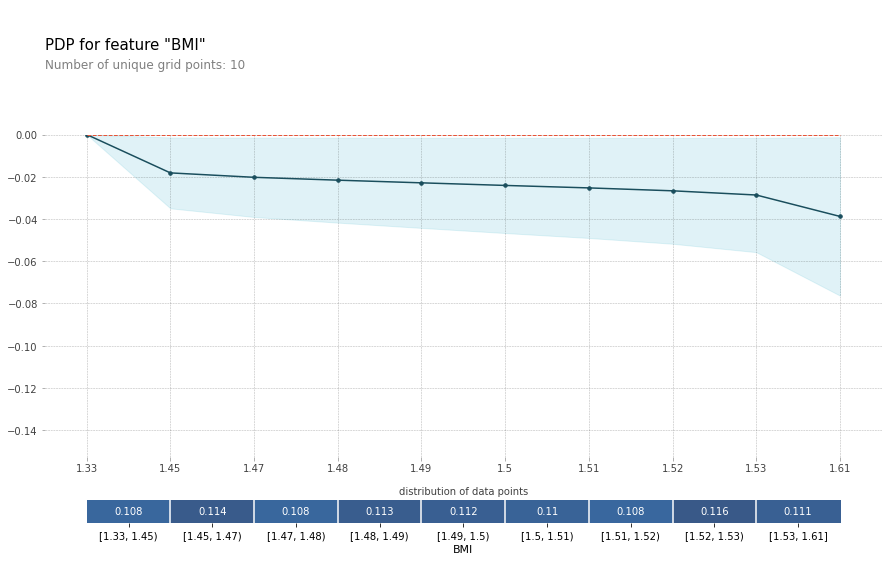

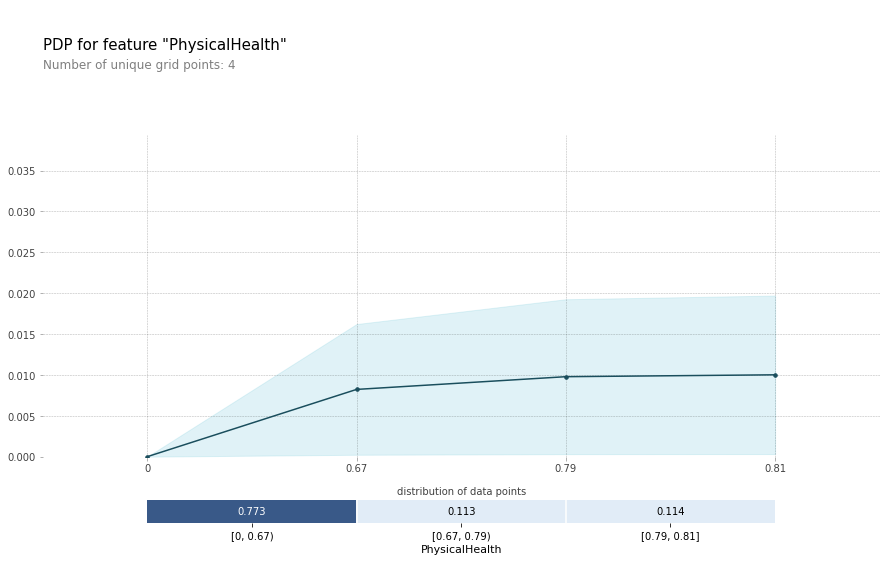

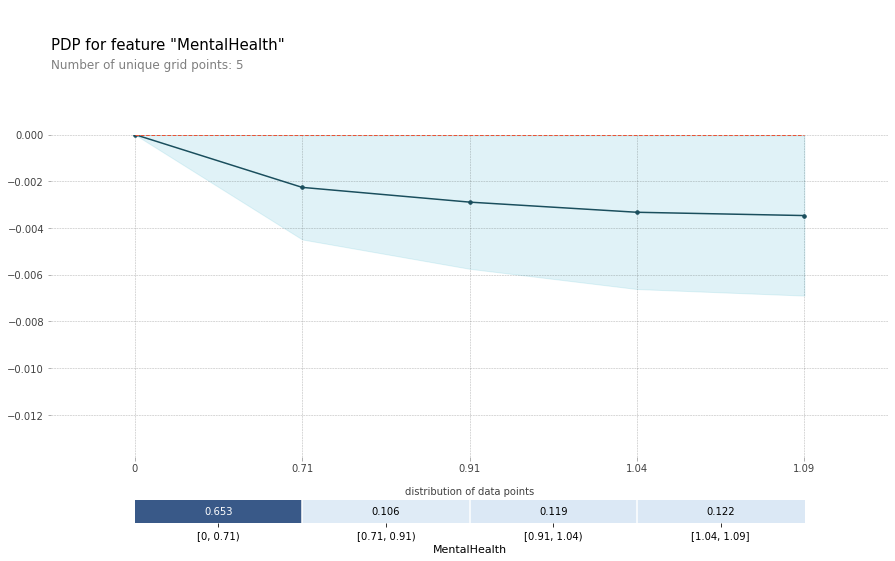

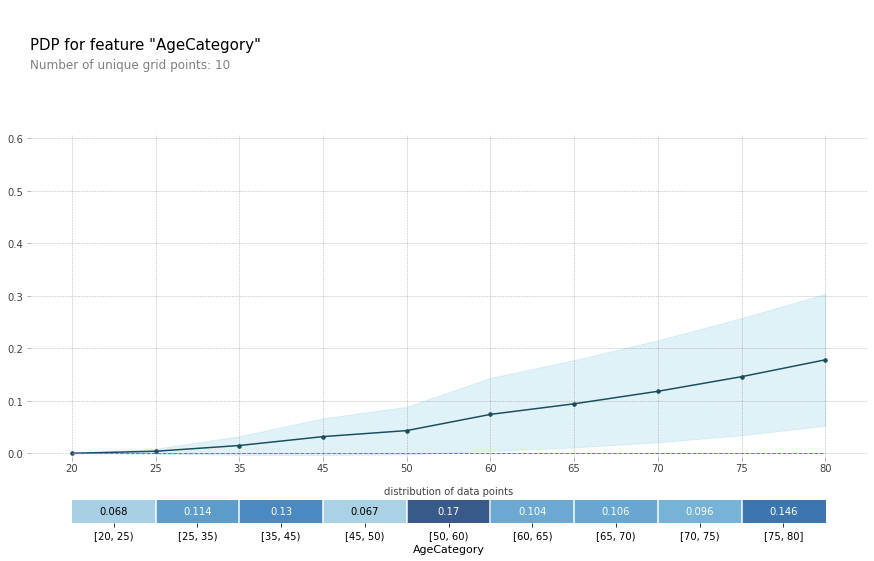

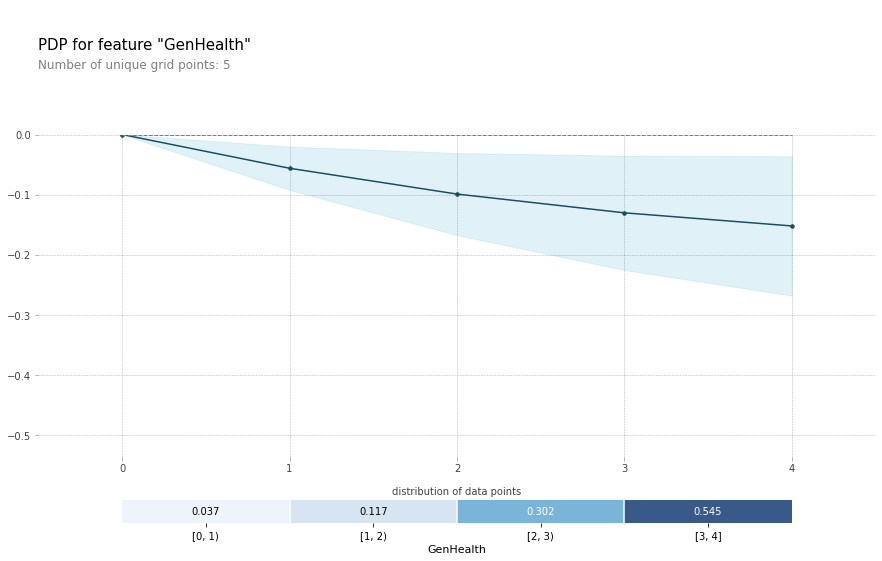

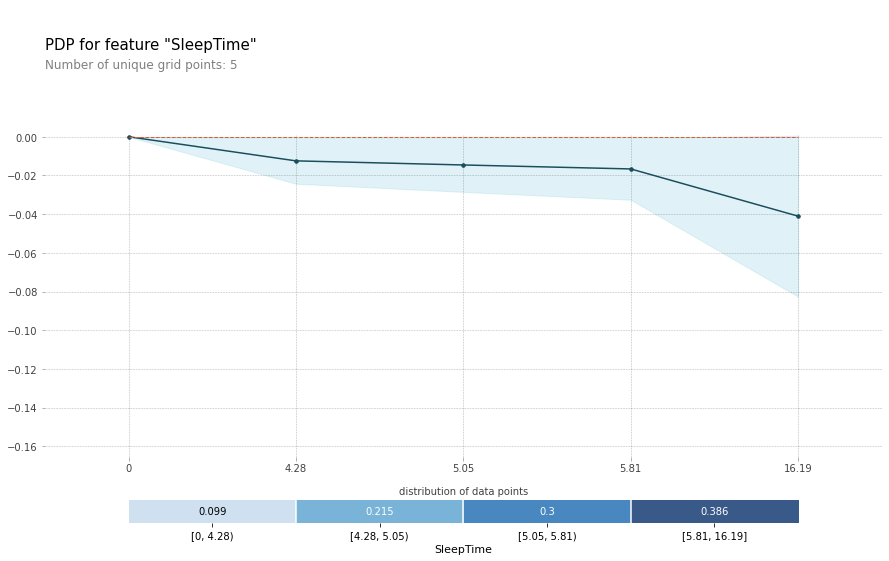

In [49]:
# 샘플링 없는 pdp
for i in range (len(feature)):
  pdp_res = pdp.pdp_isolate(model=model, dataset=x_test, model_features=features, feature=feature[i])
  pdp.pdp_plot(pdp_res, feature[i], plot_pts_dist=True)

for i in range (len(feature2)):
  pdp_res = pdp.pdp_isolate(model=model, dataset=x_test, model_features=features, feature=feature2[i])
  pdp.pdp_plot(pdp_res, feature2[i], plot_pts_dist=True,  x_quantile=True)




In [50]:
# 샘플링 적용안한 경우의 center ICE
for i in range (len(feature)):
  pdp_res = pdp.pdp_isolate(model=model, dataset=x_test, model_features=features, feature=feature[i])
  pdp.pdp_plot(pdp_res, feature[i],frac_to_plot=1000, plot_lines=True, plot_pts_dist=True)
  
for i in range (len(feature2)):
  pdp_res = pdp.pdp_isolate(model=model, dataset=x_test, model_features=features, feature=feature2[i])
  pdp.pdp_plot(pdp_res, feature2[i], frac_to_plot=1000, plot_lines=True, plot_pts_dist=True,  x_quantile=True)



Output hidden; open in https://colab.research.google.com to view.

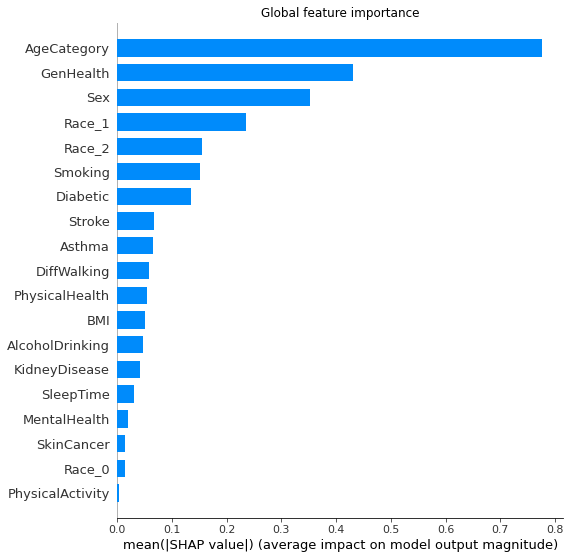

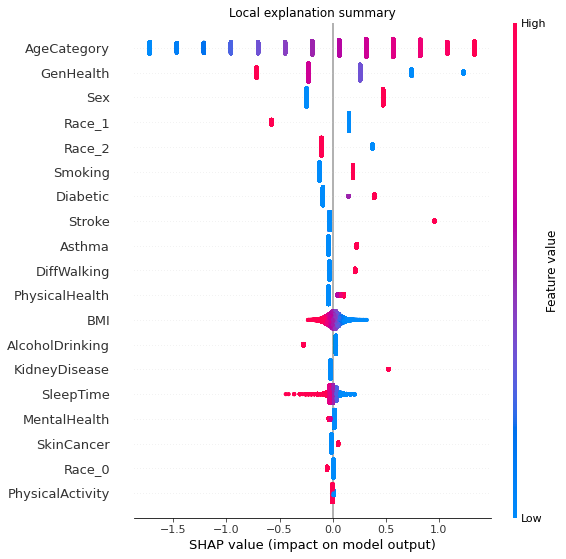

In [51]:
# SHAP
explainer = shap.Explainer(model, x_train, feature_names=features)
shap_values = explainer(x_test)

plt.title('Global feature importance')
shap.summary_plot(shap_values, plot_type="bar")


plt.title('Local explanation summary')
shap.summary_plot(shap_values)

# SMOTE 샘플링 PDP, ICE, SHAP

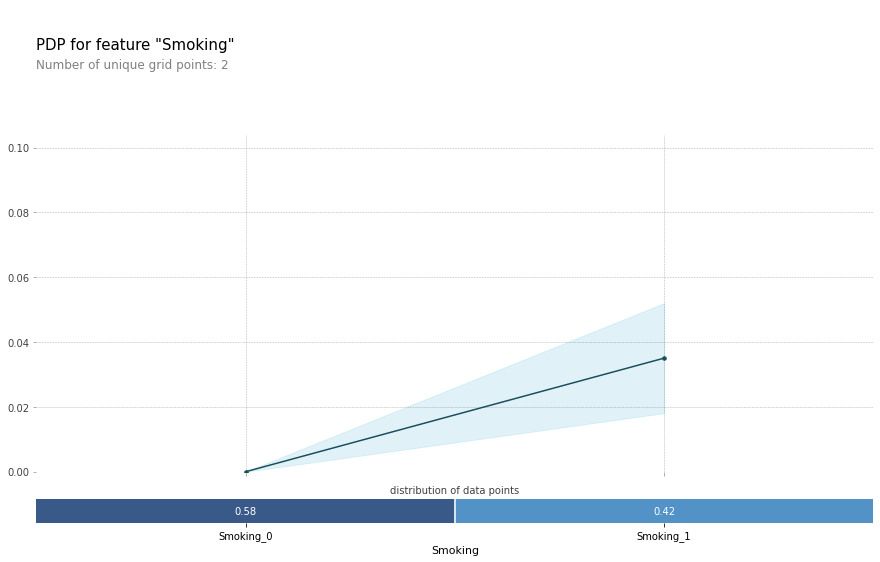

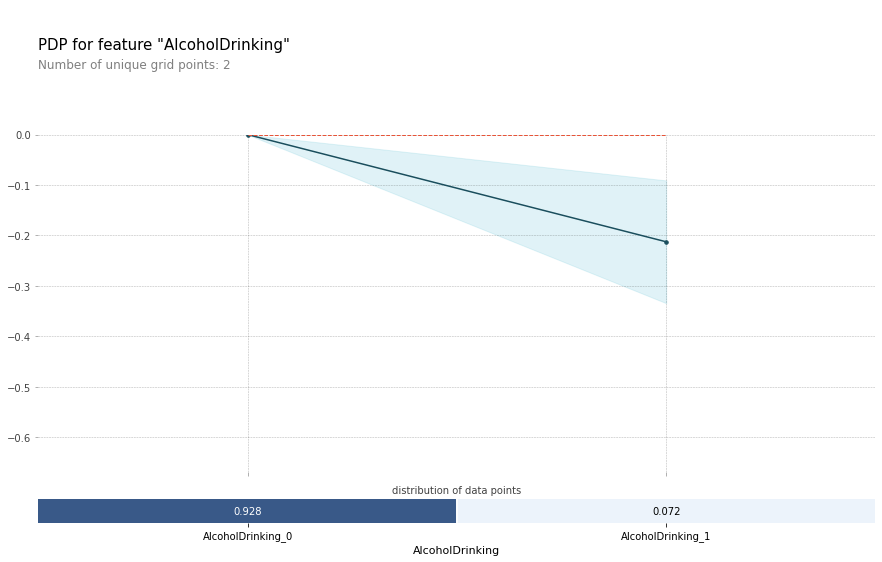

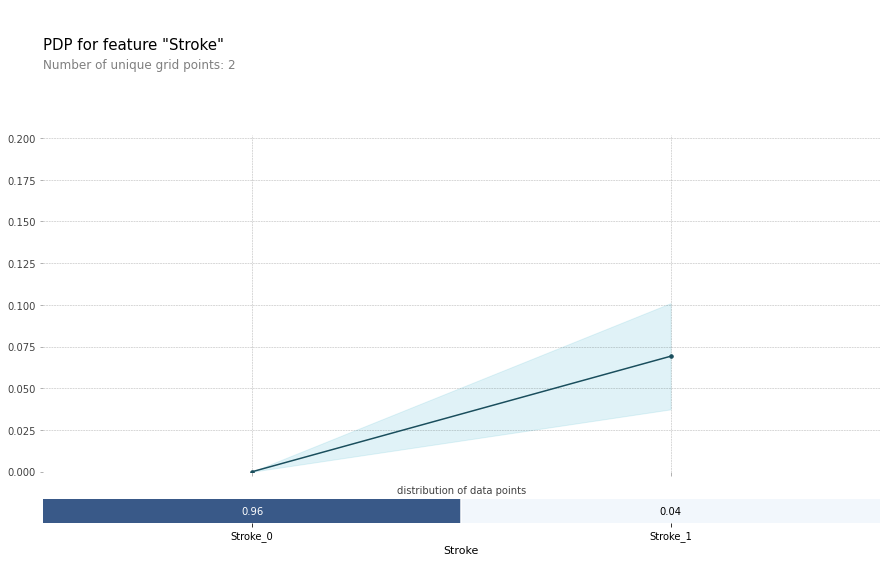

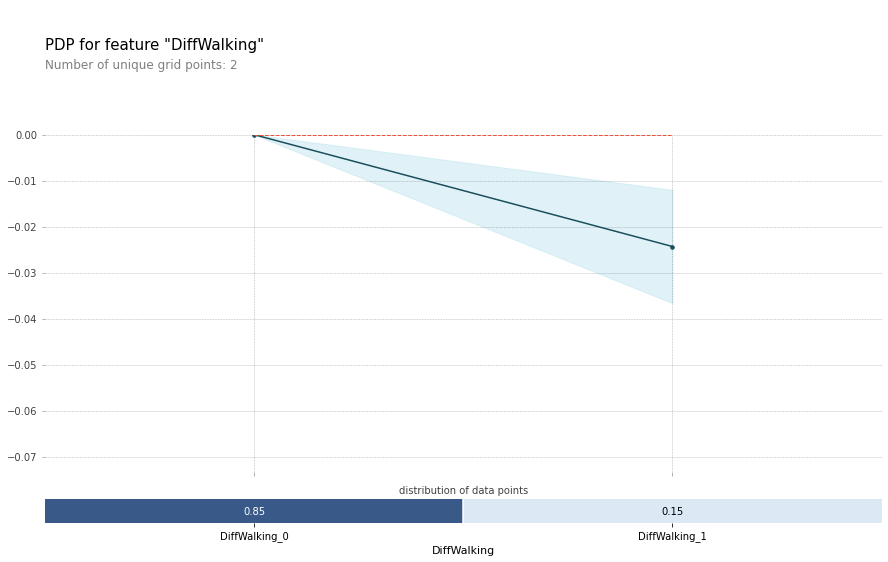

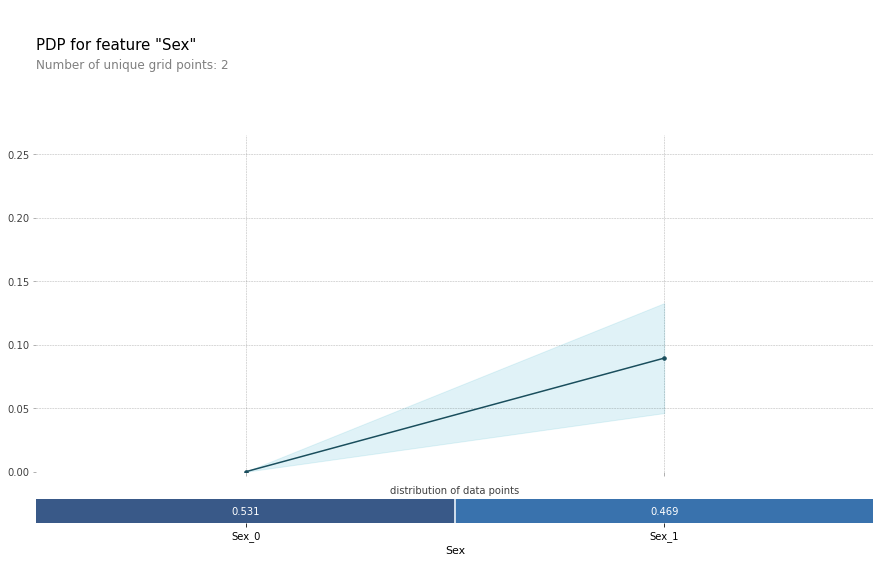

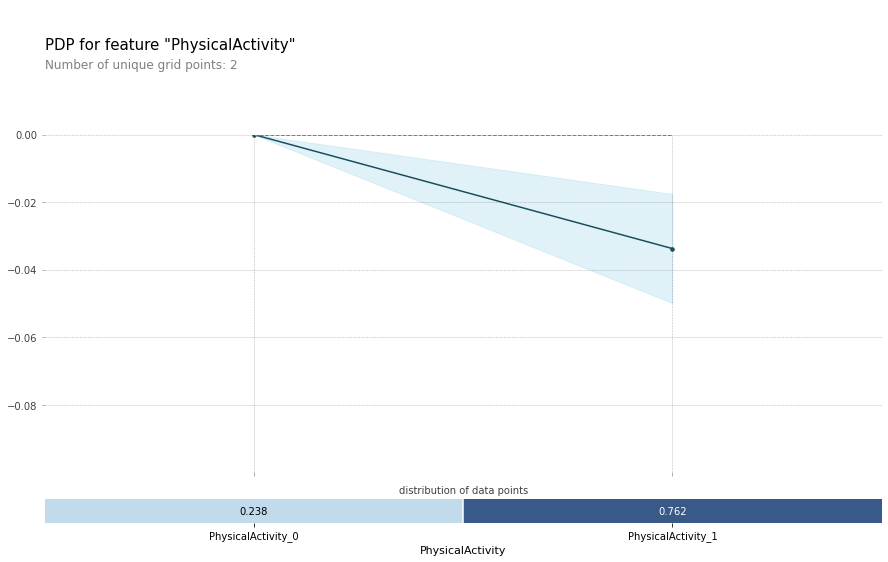

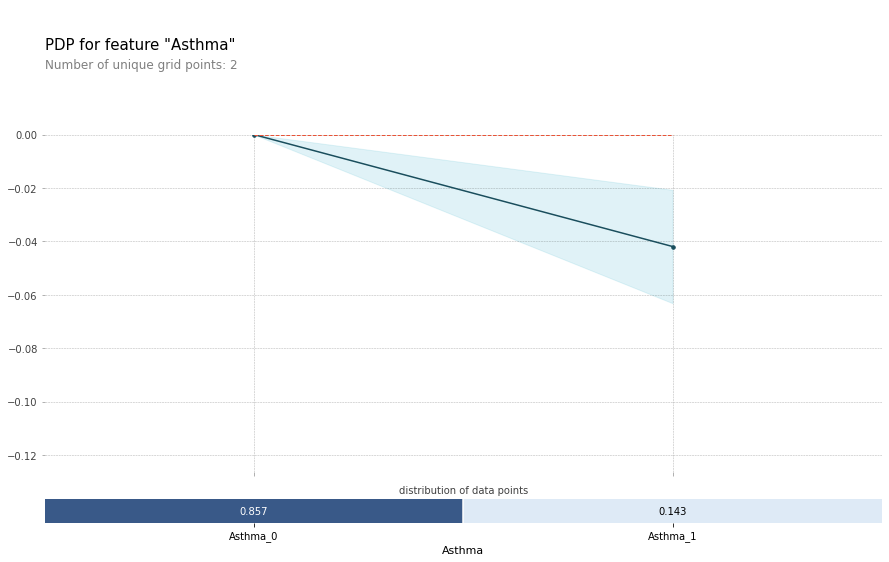

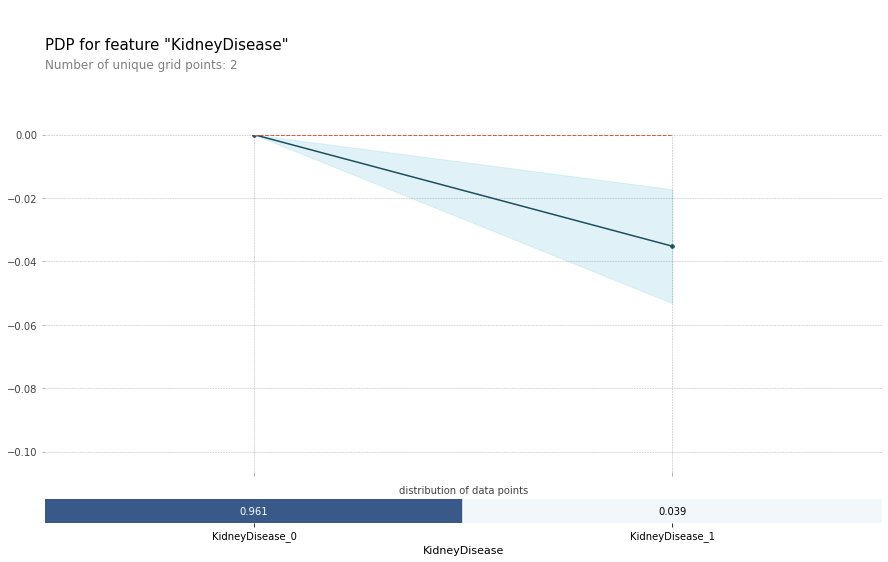

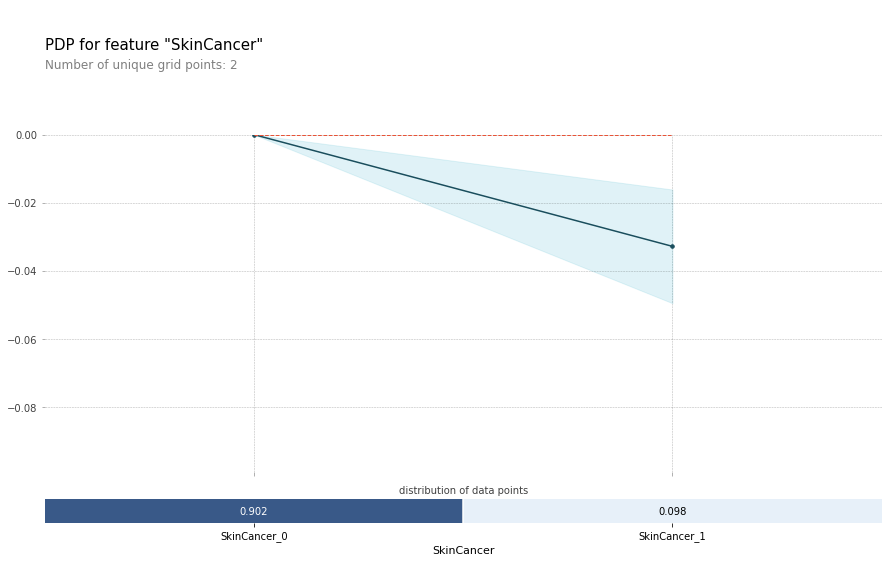

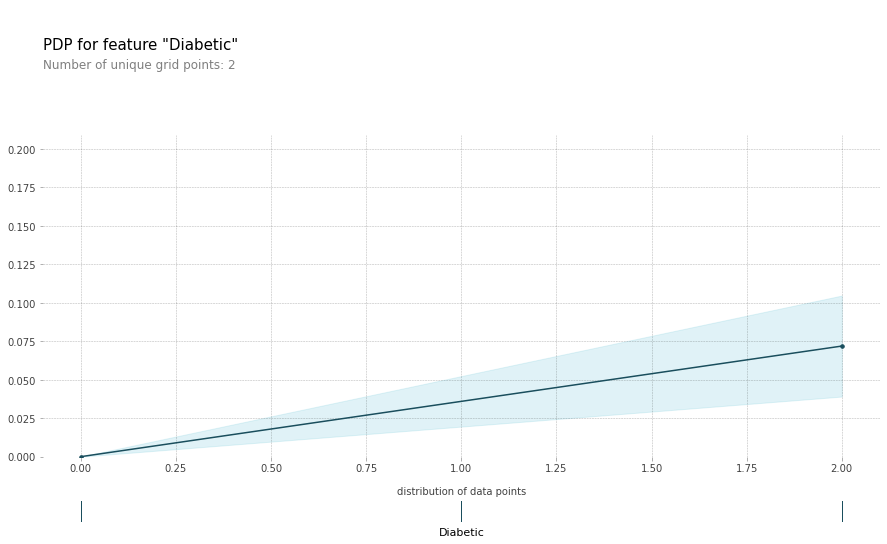

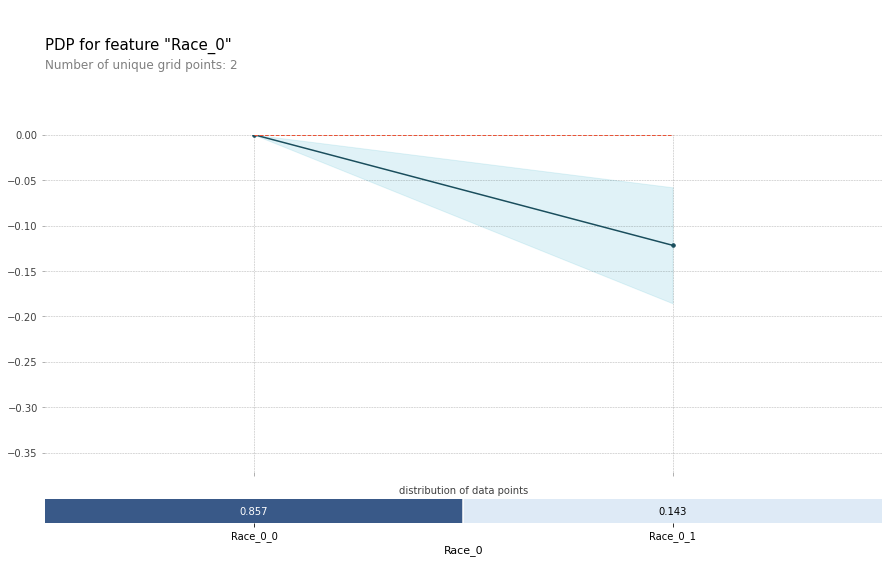

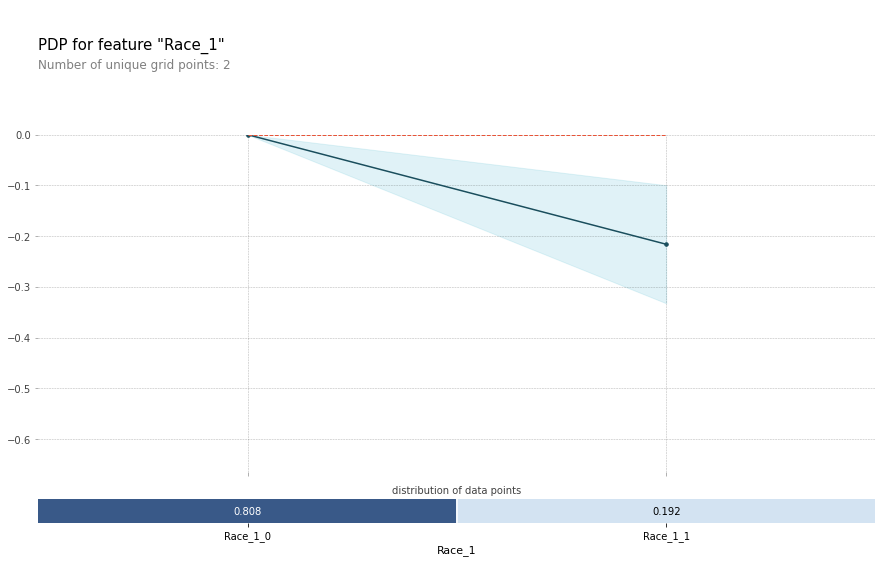

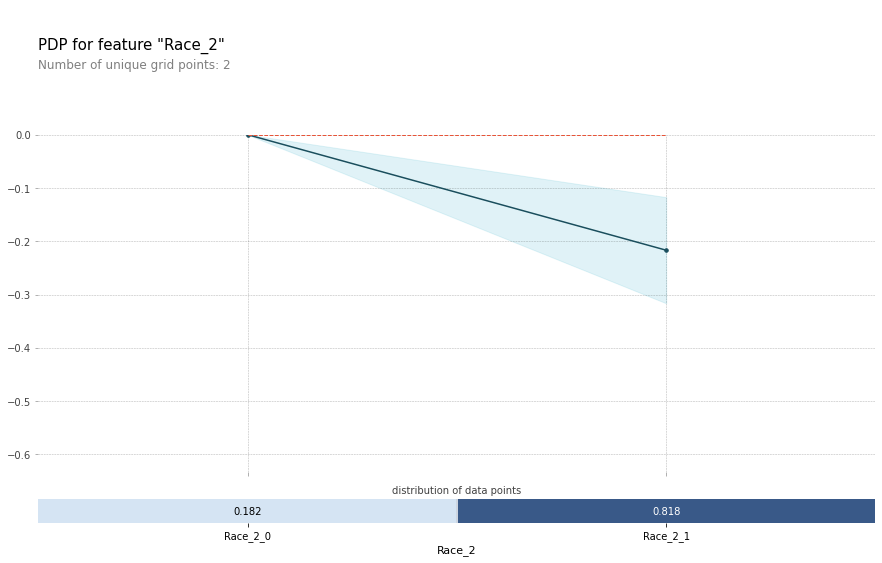

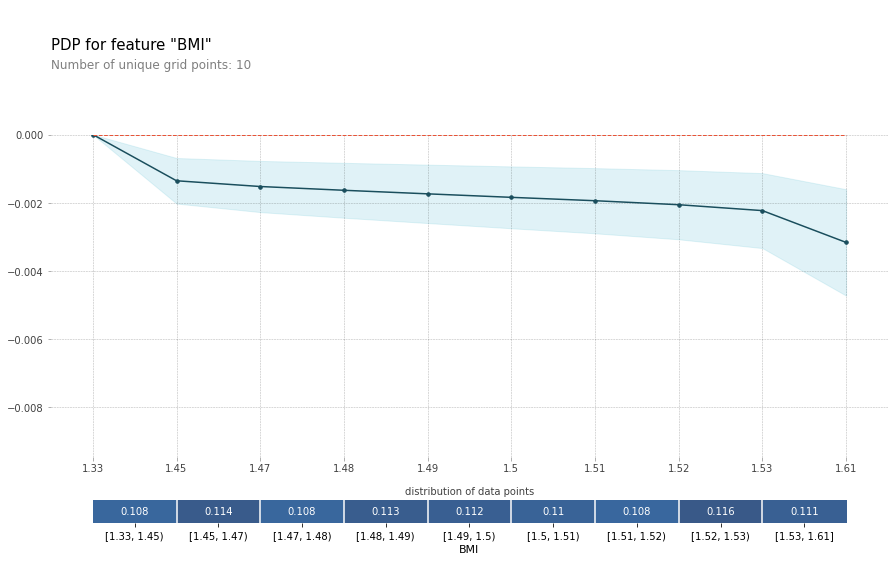

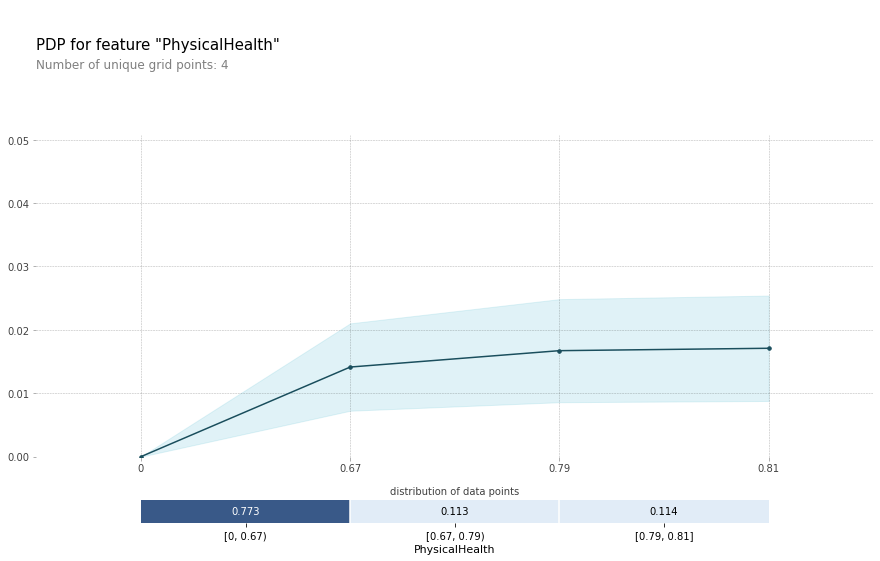

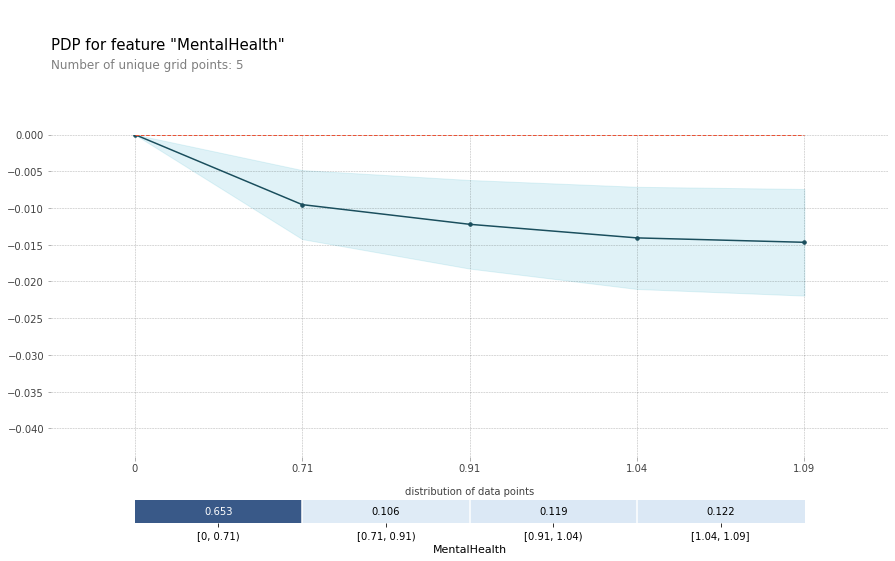

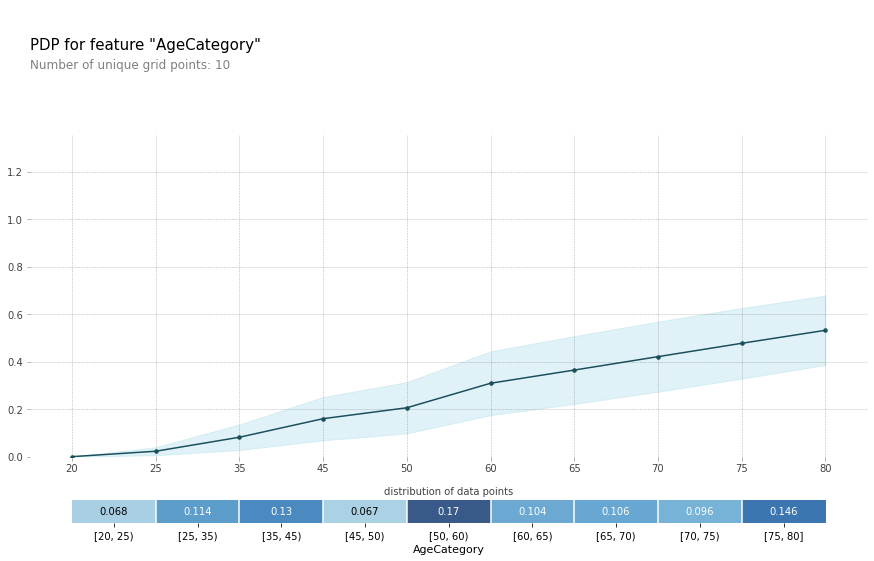

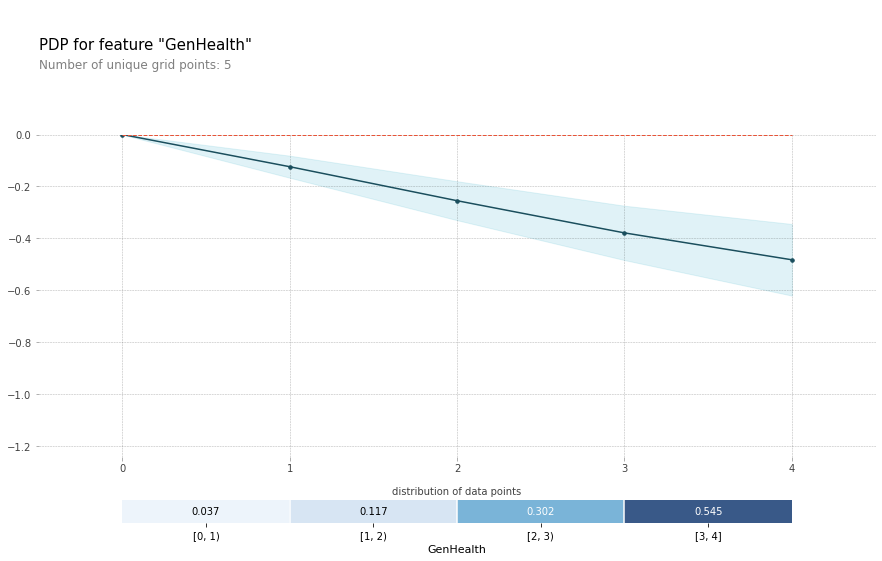

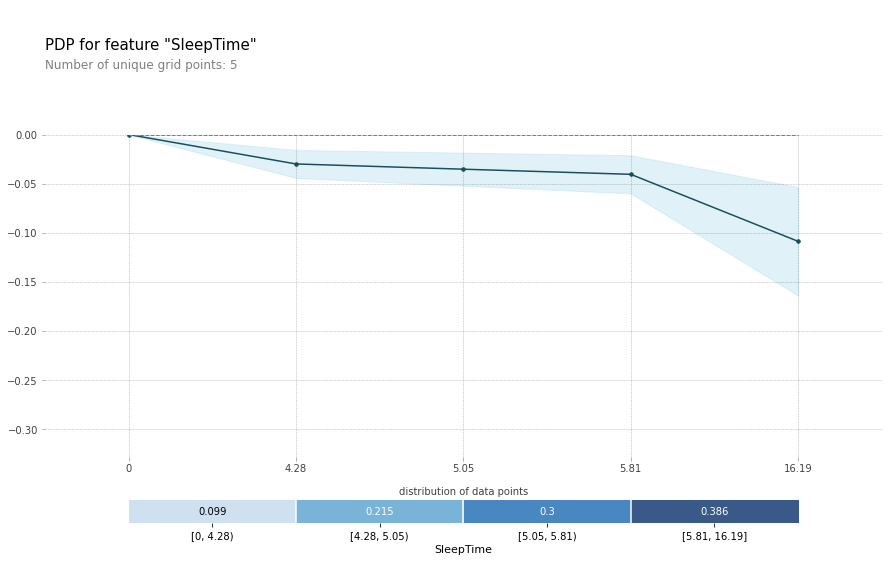

In [52]:
# SMOTE 데이터 PDP
for i in range (len(feature)):
  pdp_res = pdp.pdp_isolate(model=model_SMOTE, dataset=x_test, model_features=features, feature=feature[i])
  pdp.pdp_plot(pdp_res, feature[i], plot_pts_dist=True)

for i in range (len(feature2)):
  pdp_res = pdp.pdp_isolate(model=model_SMOTE, dataset=x_test, model_features=features, feature=feature2[i])
  pdp.pdp_plot(pdp_res, feature2[i], plot_pts_dist=True,  x_quantile=True)

In [53]:
# SMOTE 데이터 ICE
for i in range (len(feature)):
  pdp_res = pdp.pdp_isolate(model=model_SMOTE, dataset=x_test, model_features=features, feature=feature[i])
  pdp.pdp_plot(pdp_res, feature[i],frac_to_plot=1000, plot_lines=True, plot_pts_dist=True)
for i in range (len(feature2)):
  pdp_res = pdp.pdp_isolate(model=model_SMOTE, dataset=x_test, model_features=features, feature=feature2[i])
  pdp.pdp_plot(pdp_res, feature2[i], frac_to_plot=1000, plot_lines=True, plot_pts_dist=True,  x_quantile=True)

Output hidden; open in https://colab.research.google.com to view.

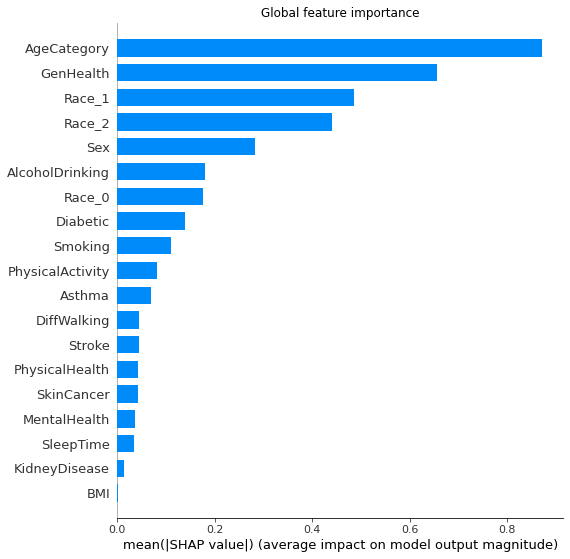

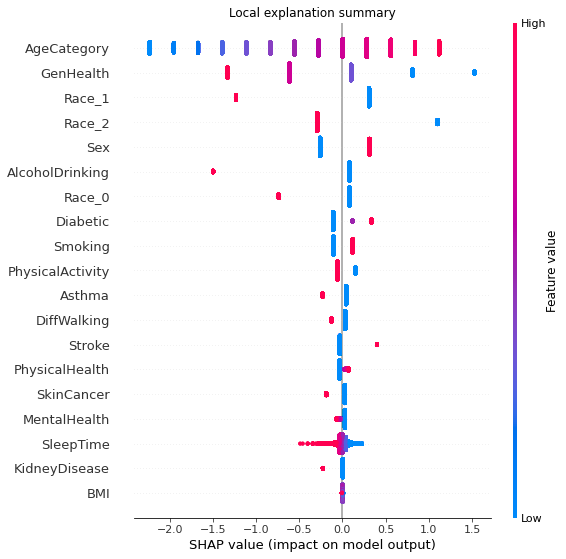

In [54]:
# SMOTE 데이터 SHAP
explainer = shap.Explainer(model_SMOTE, x_train_SMOTE, feature_names=features)
shap_values = explainer(x_test)

plt.title('Global feature importance')
shap.summary_plot(shap_values, plot_type="bar")


plt.title('Local explanation summary')
shap.summary_plot(shap_values)

# BorderlineSMOTE 샘플링 PDP, ICE, SHAP

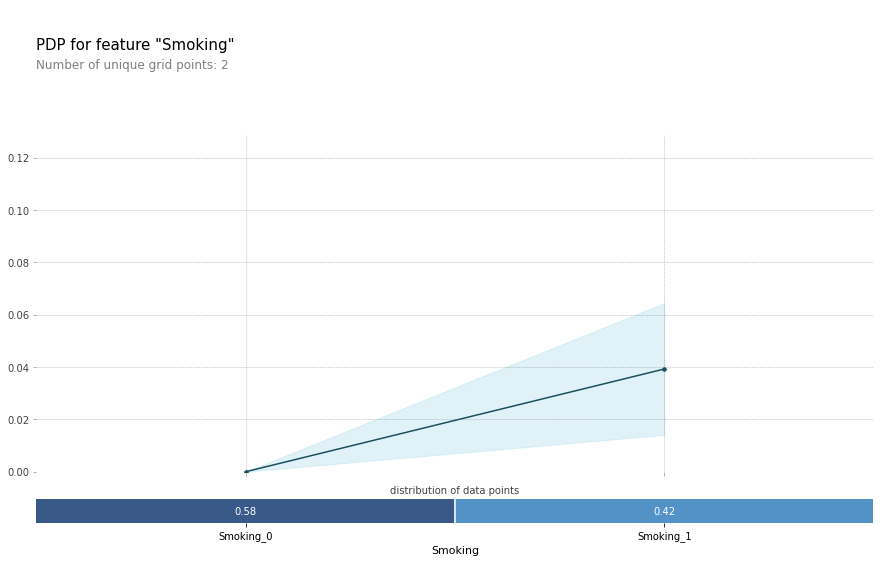

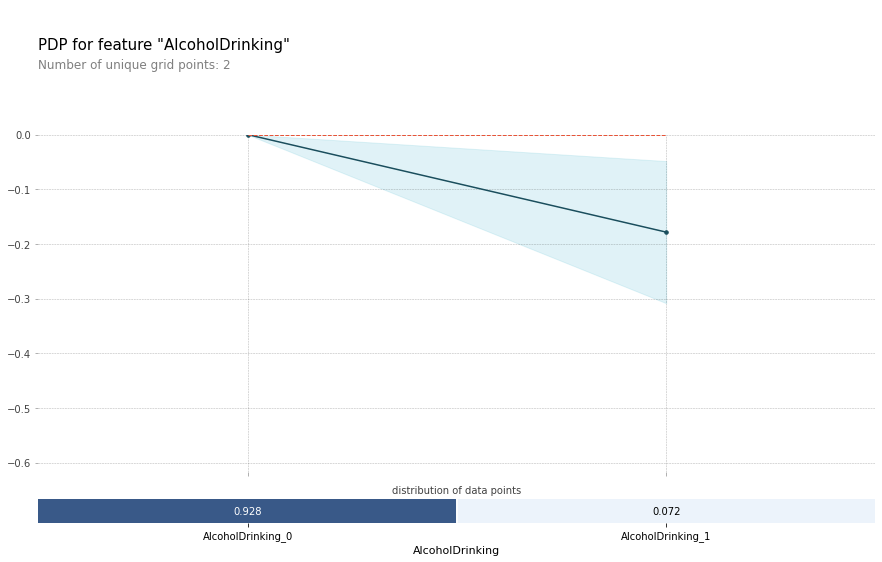

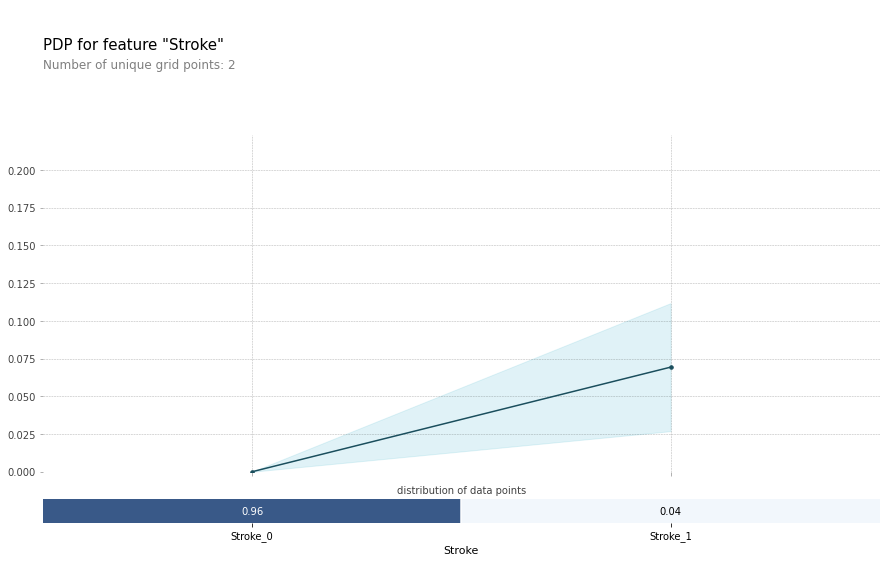

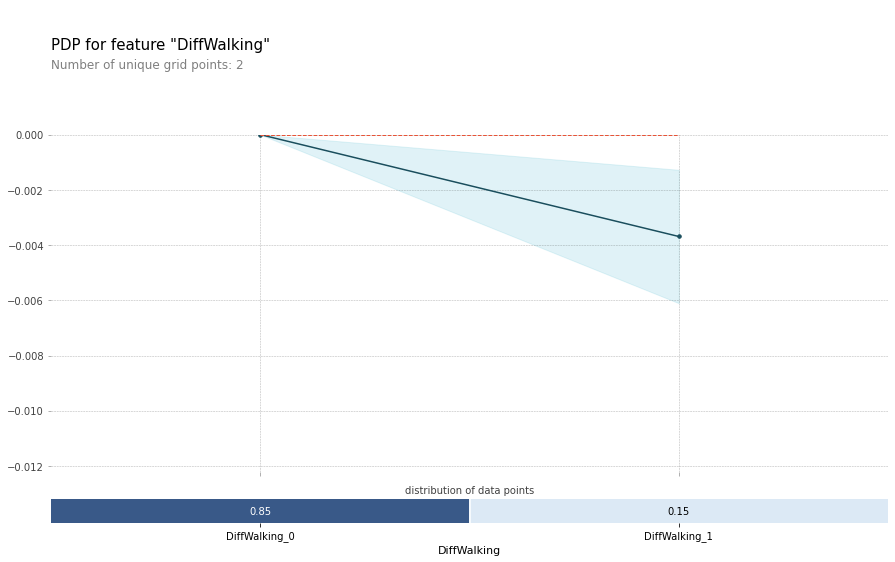

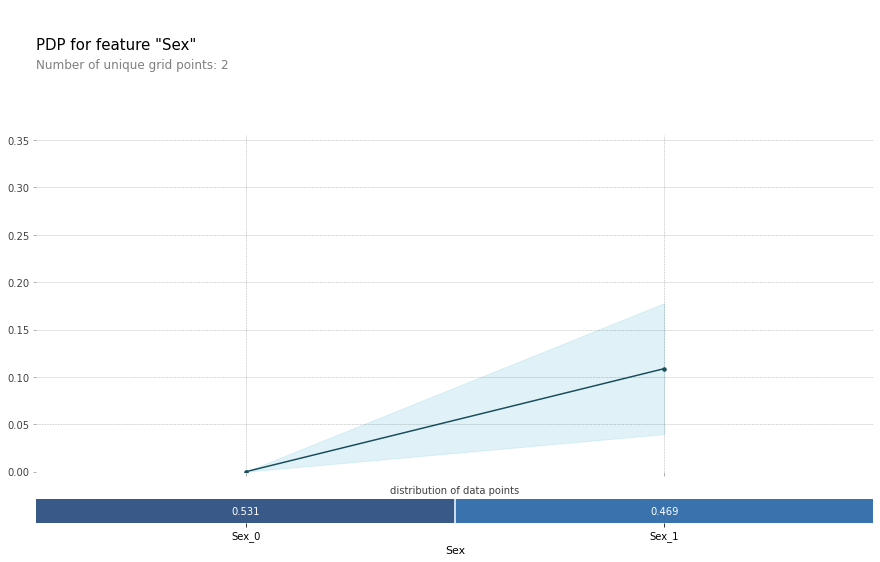

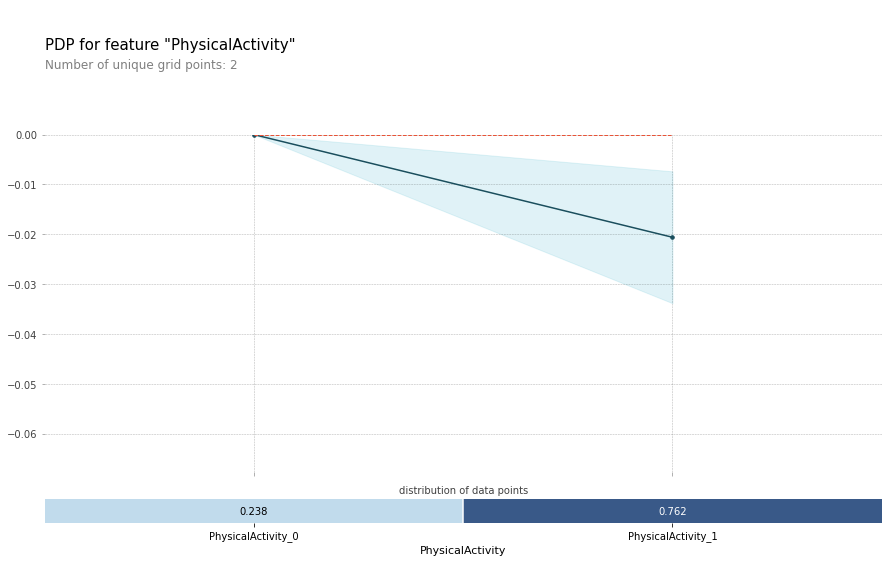

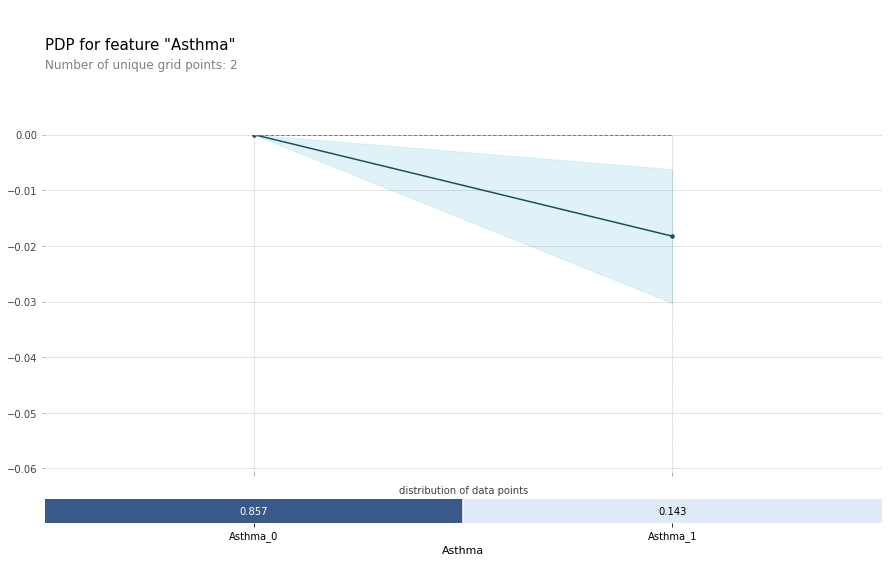

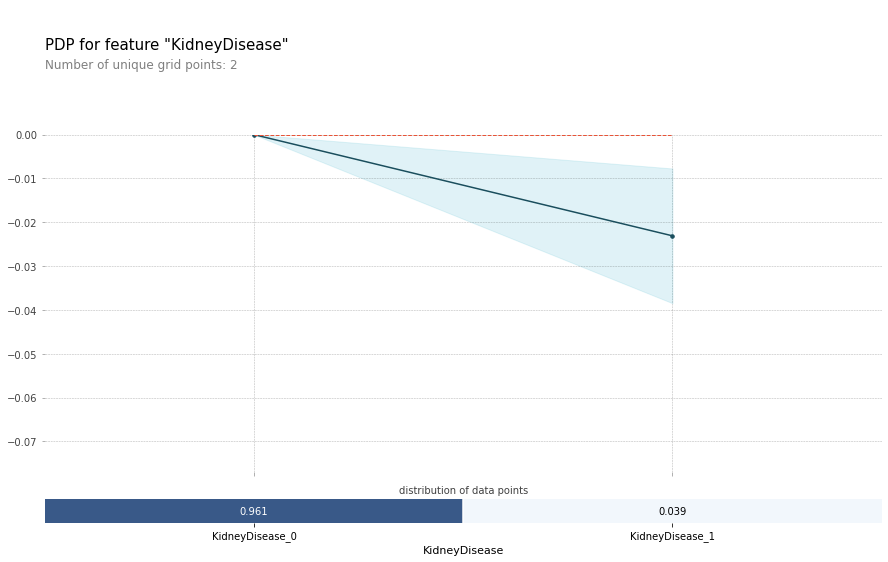

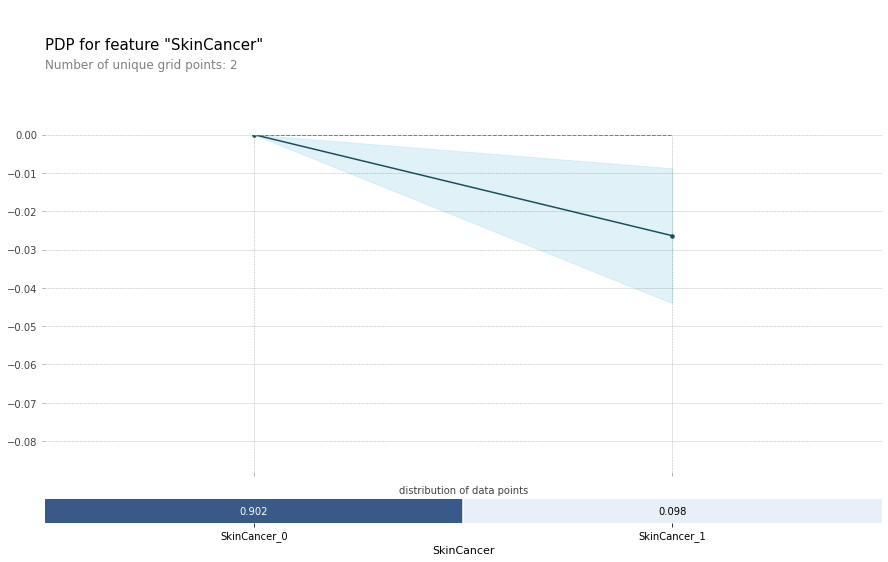

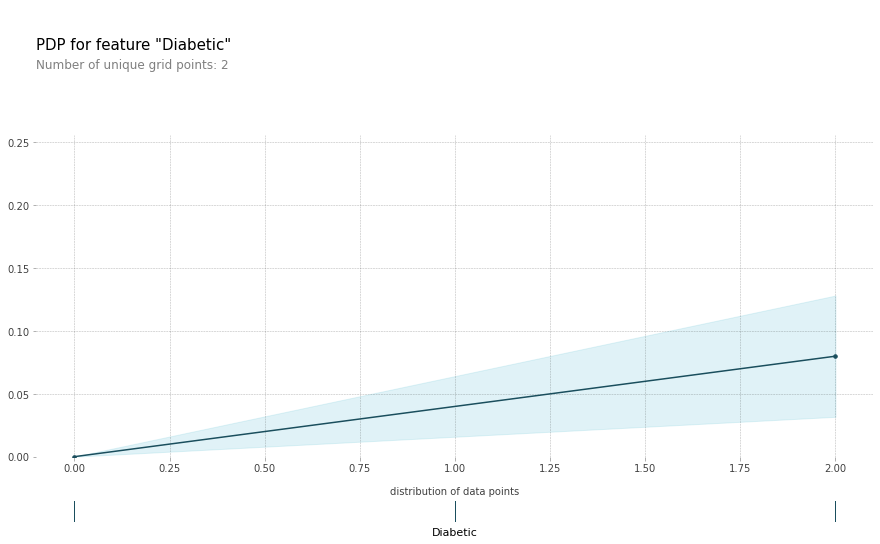

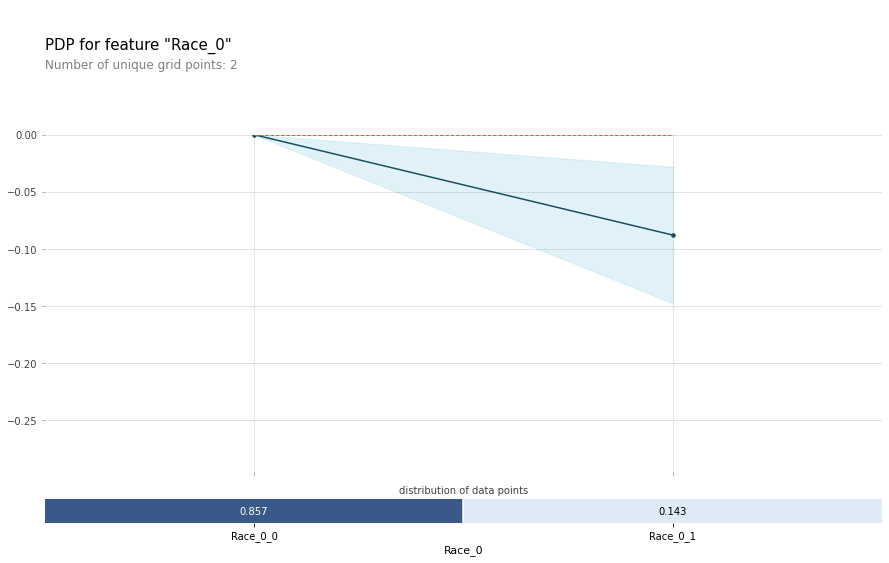

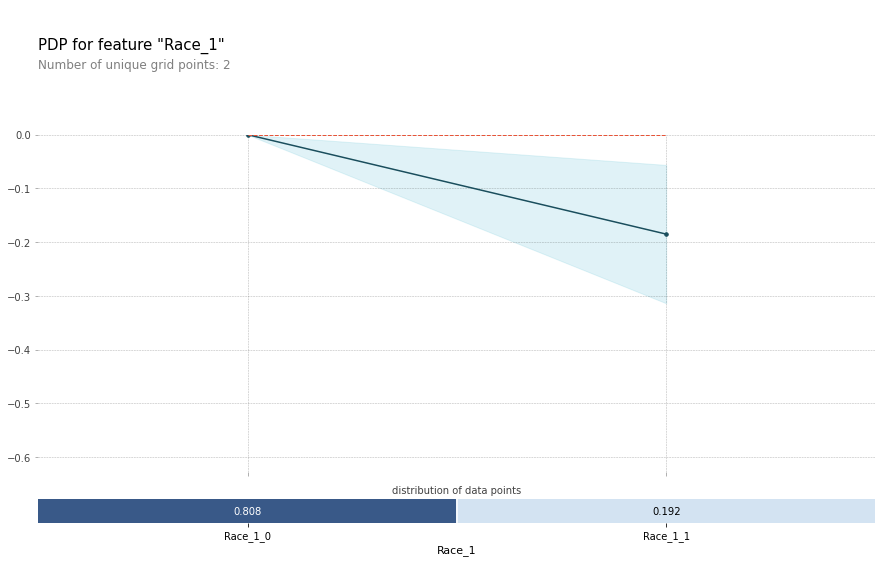

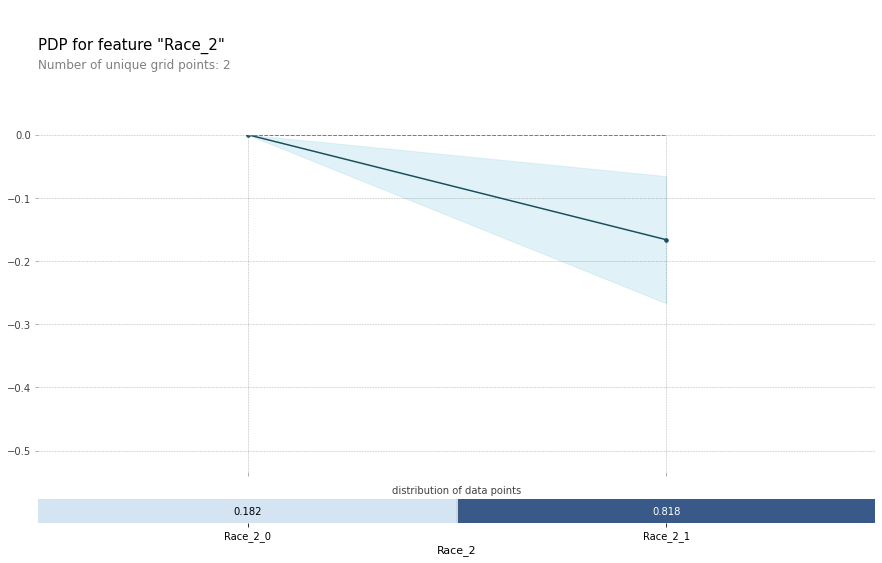

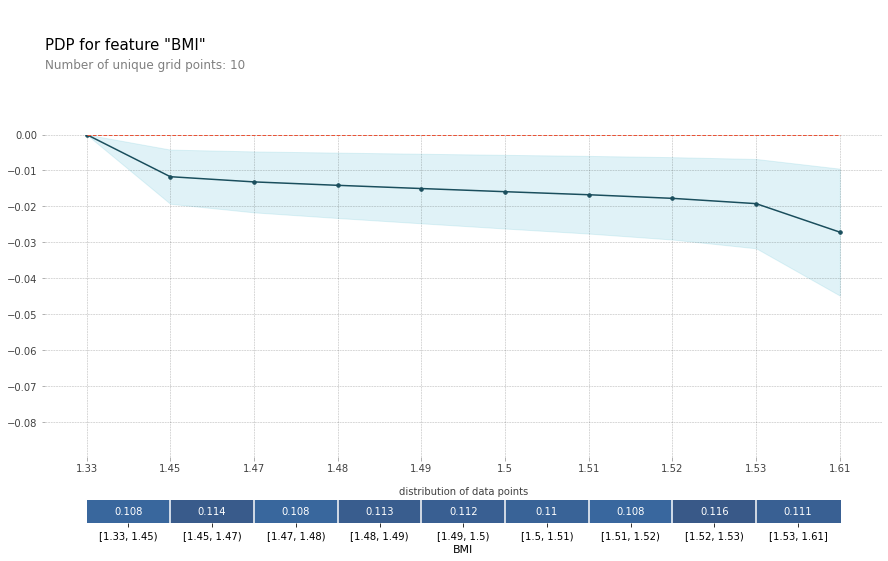

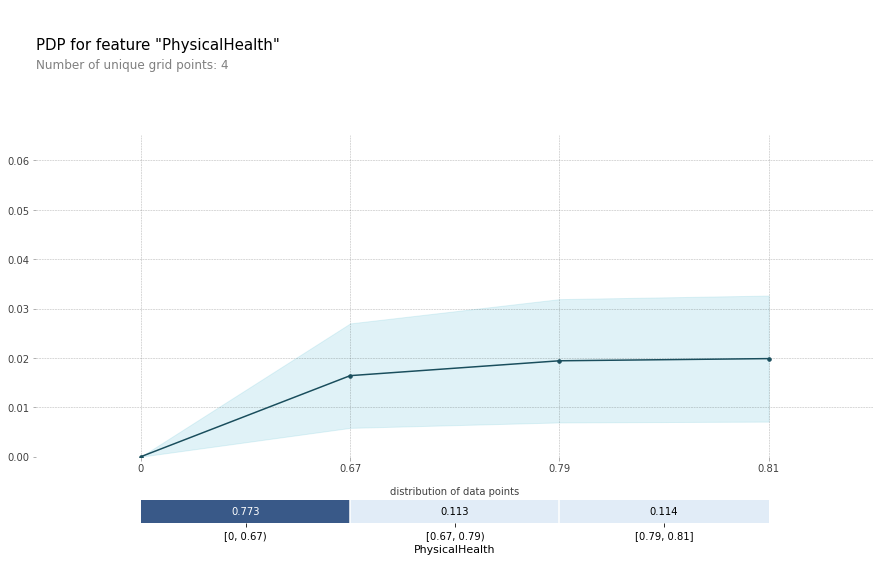

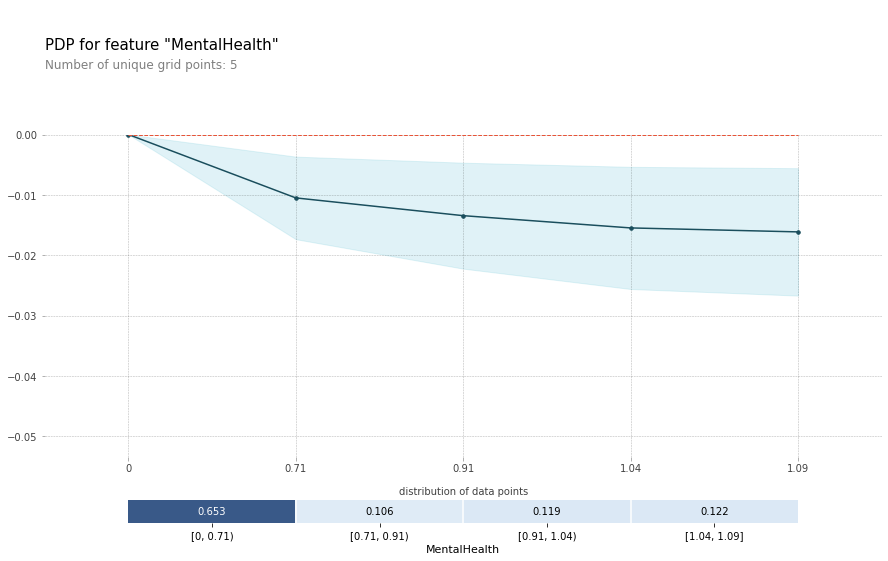

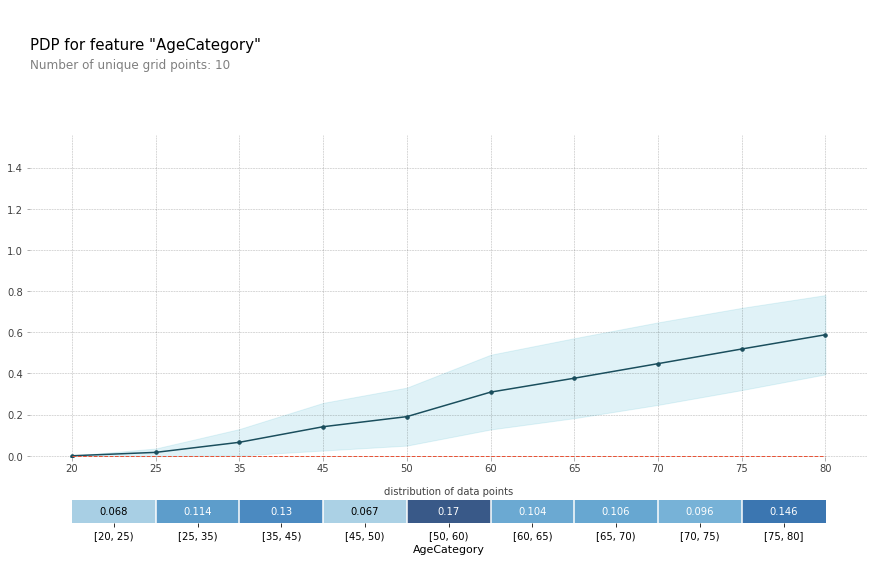

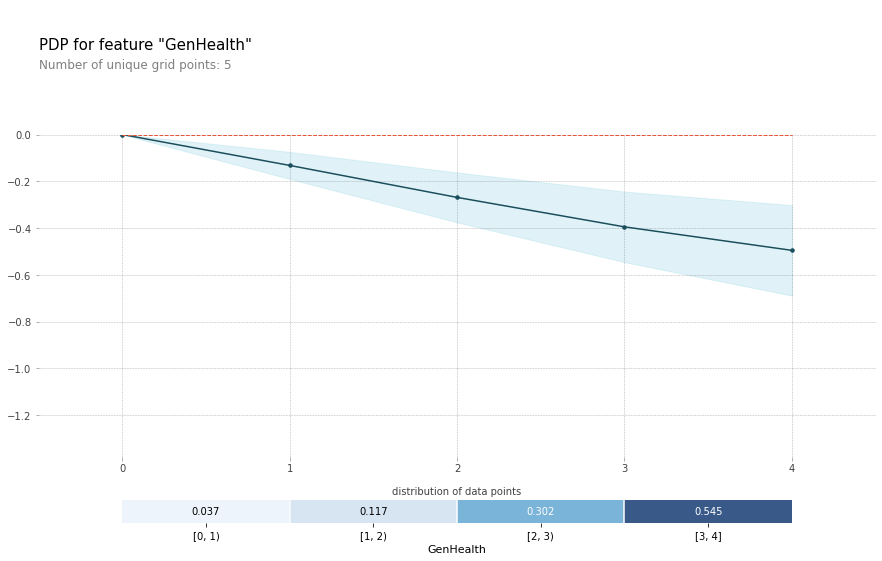

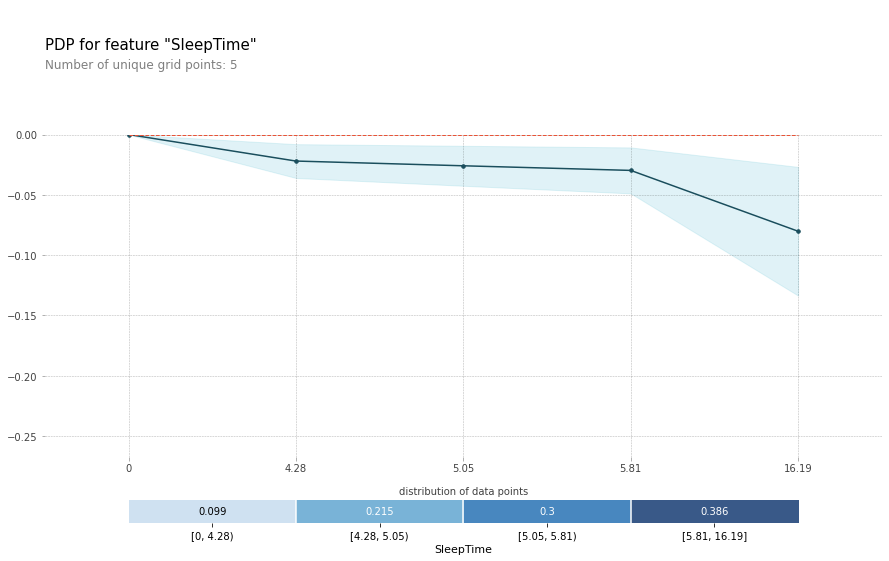

In [55]:
#PDP
for i in range (len(feature)):
  pdp_res = pdp.pdp_isolate(model=model_BorderlineSM, dataset=x_test, model_features=features, feature=feature[i])
  pdp.pdp_plot(pdp_res, feature[i], plot_pts_dist=True)
  
for i in range (len(feature2)):
  pdp_res = pdp.pdp_isolate(model=model_BorderlineSM, dataset=x_test, model_features=features, feature=feature2[i])
  pdp.pdp_plot(pdp_res, feature2[i], plot_pts_dist=True,  x_quantile=True)

In [56]:
# ICE
for i in range (len(feature)):
  pdp_res = pdp.pdp_isolate(model=model_BorderlineSM, dataset=x_test, model_features=features, feature=feature[i])
  pdp.pdp_plot(pdp_res, feature[i],frac_to_plot=1000, plot_lines=True, plot_pts_dist=True)
  
for i in range (len(feature2)):
  pdp_res = pdp.pdp_isolate(model=model_BorderlineSM, dataset=x_test, model_features=features, feature=feature2[i])
  pdp.pdp_plot(pdp_res, feature2[i], frac_to_plot=1000, plot_lines=True, plot_pts_dist=True,  x_quantile=True)

Output hidden; open in https://colab.research.google.com to view.

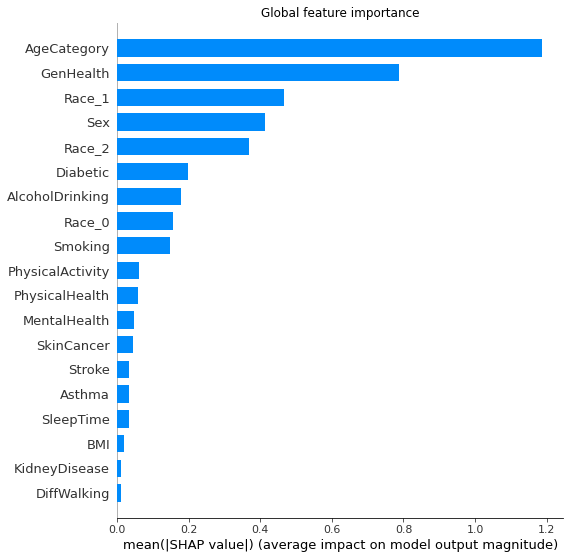

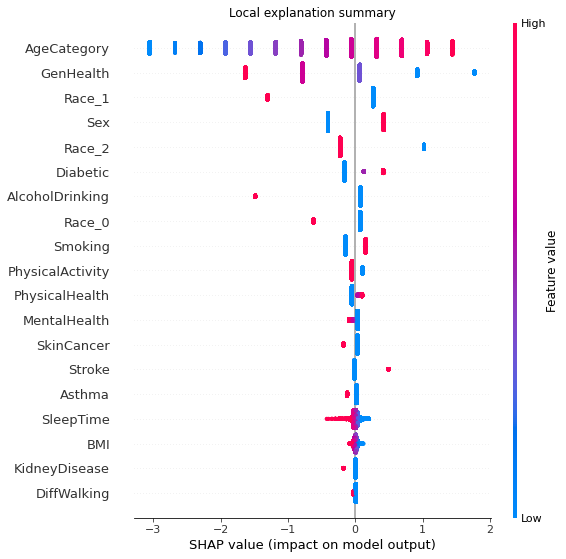

In [57]:
# SHAP
explainer = shap.Explainer(model_BorderlineSM, x_train_BorderlineSM, feature_names=features)
shap_values = explainer(x_test)

plt.title('Global feature importance')
shap.summary_plot(shap_values, plot_type="bar")

plt.title('Local explanation summary')
shap.summary_plot(shap_values)

# SVMSMOTE 샘플링 PDP, ICE, SHAP

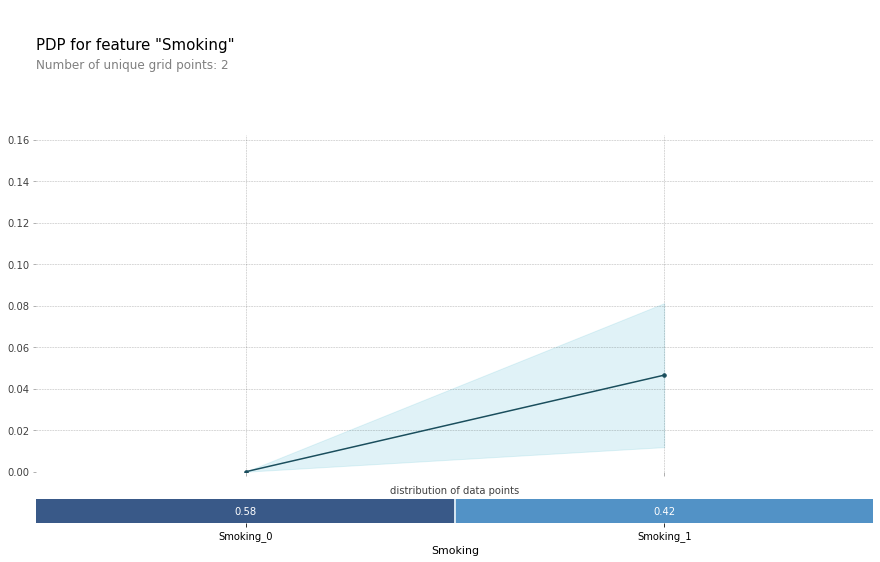

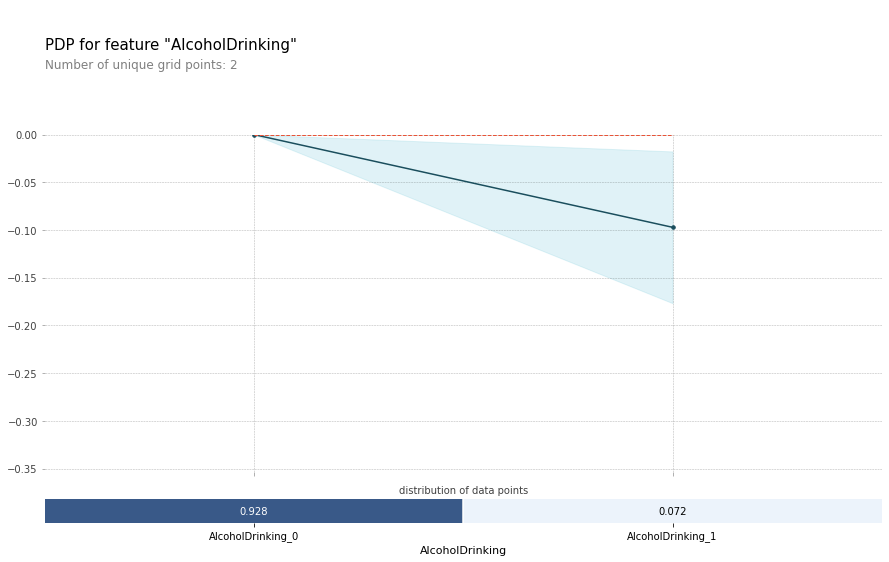

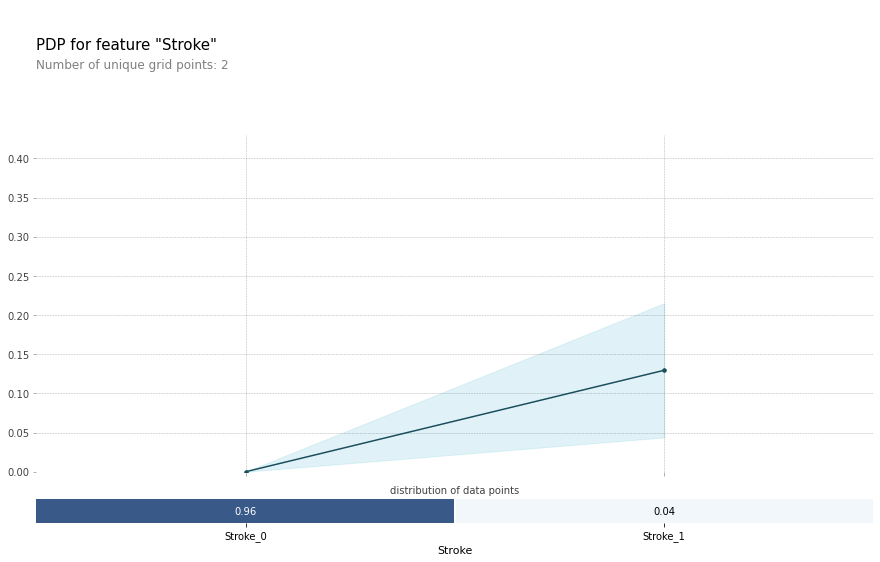

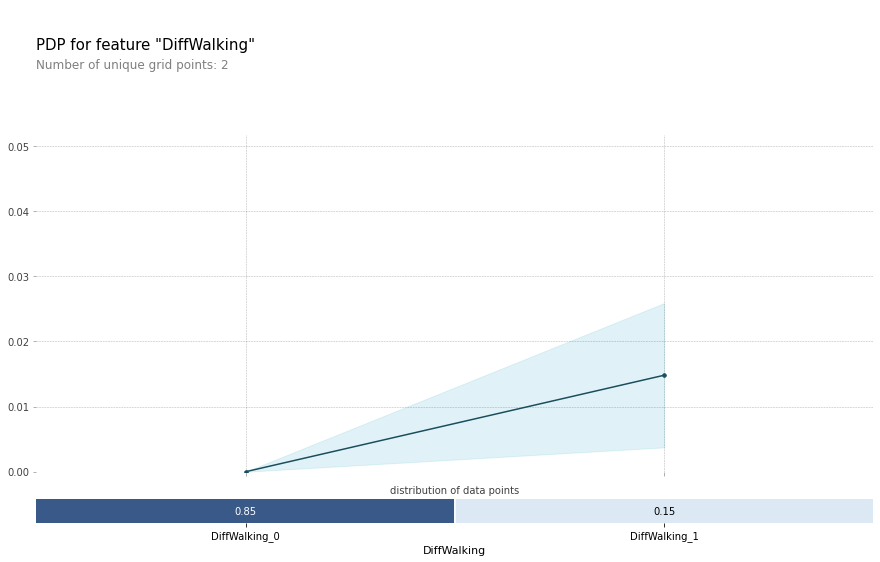

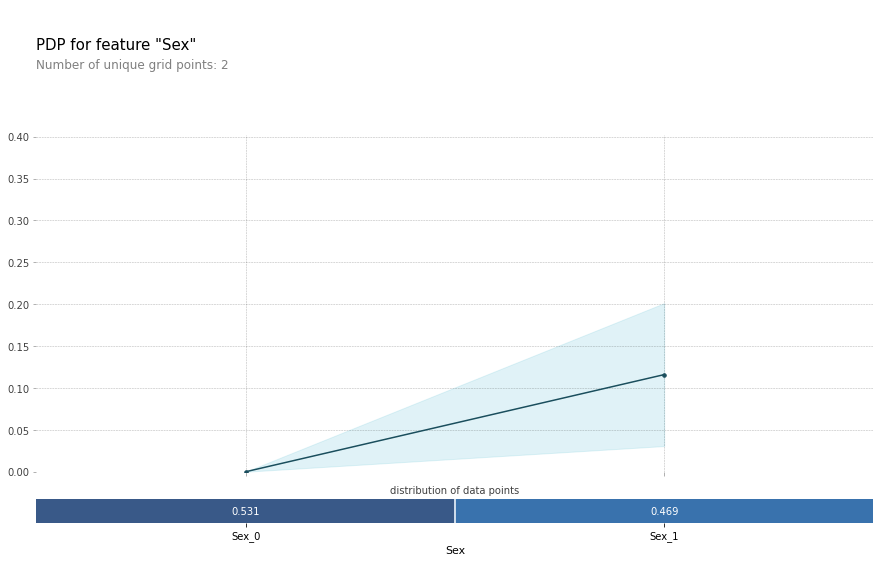

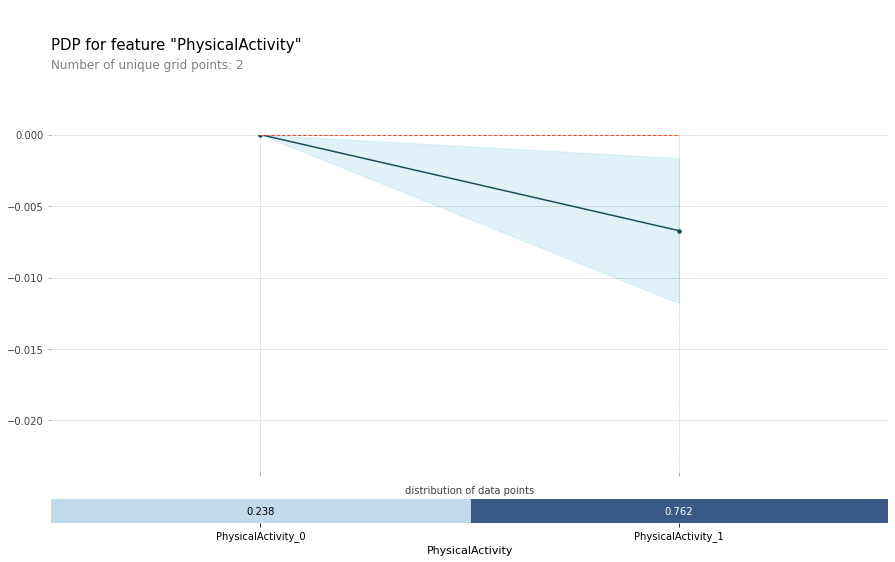

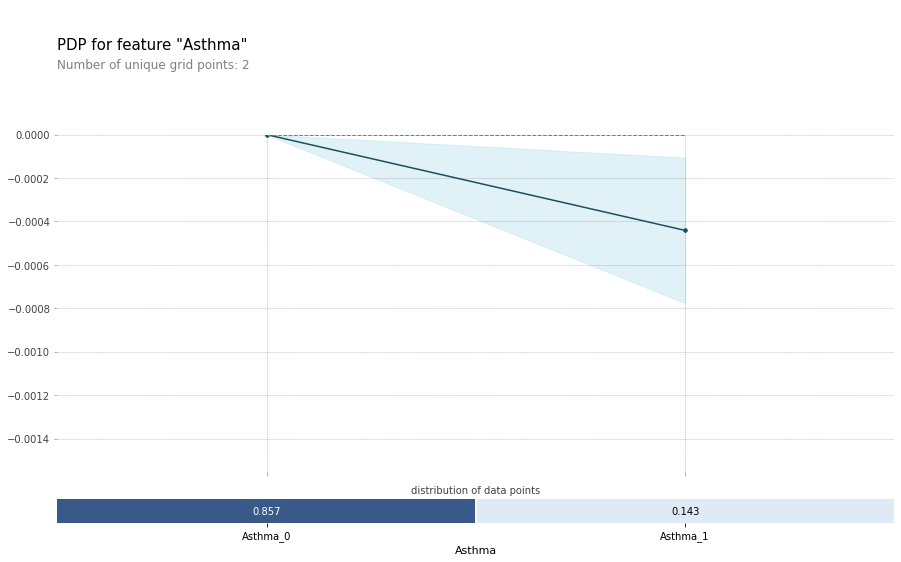

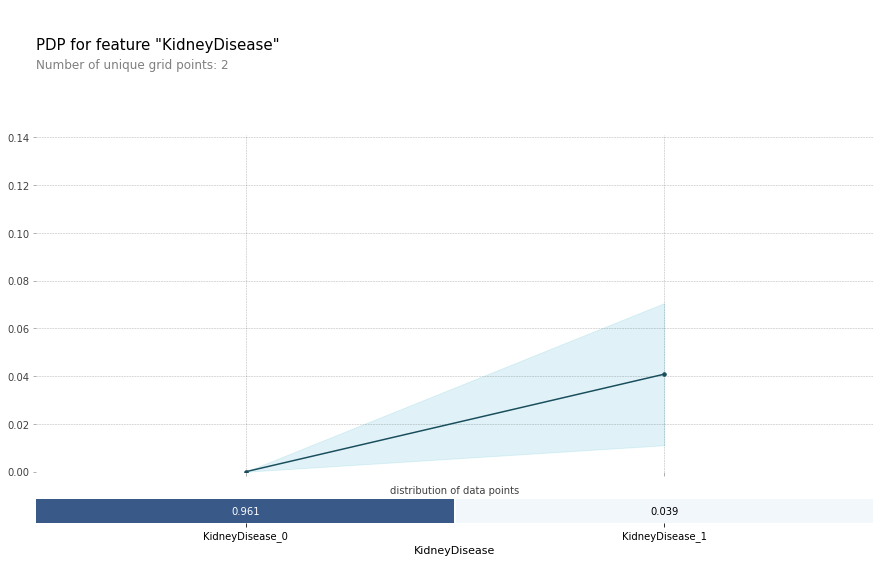

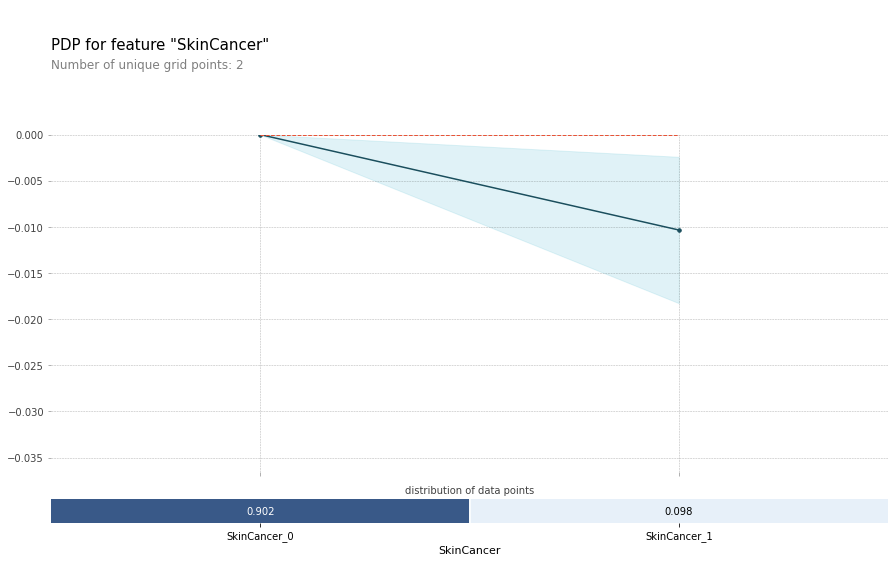

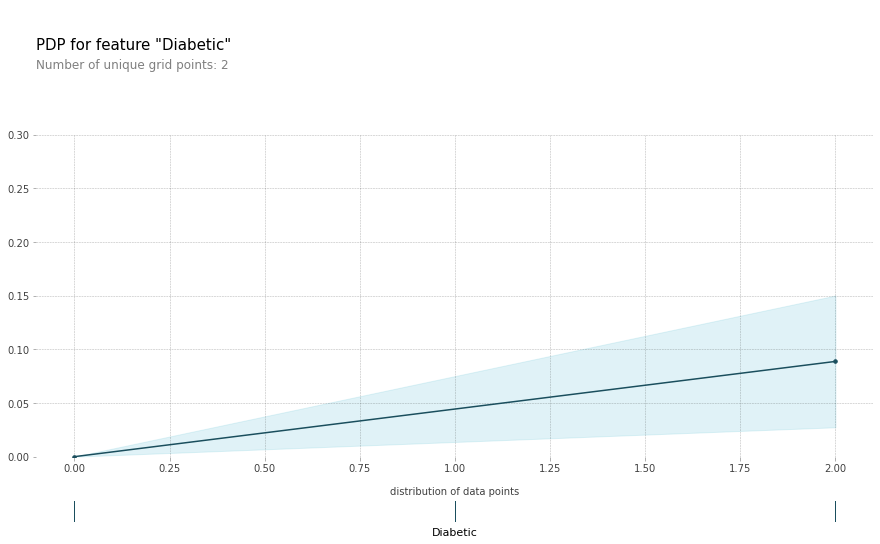

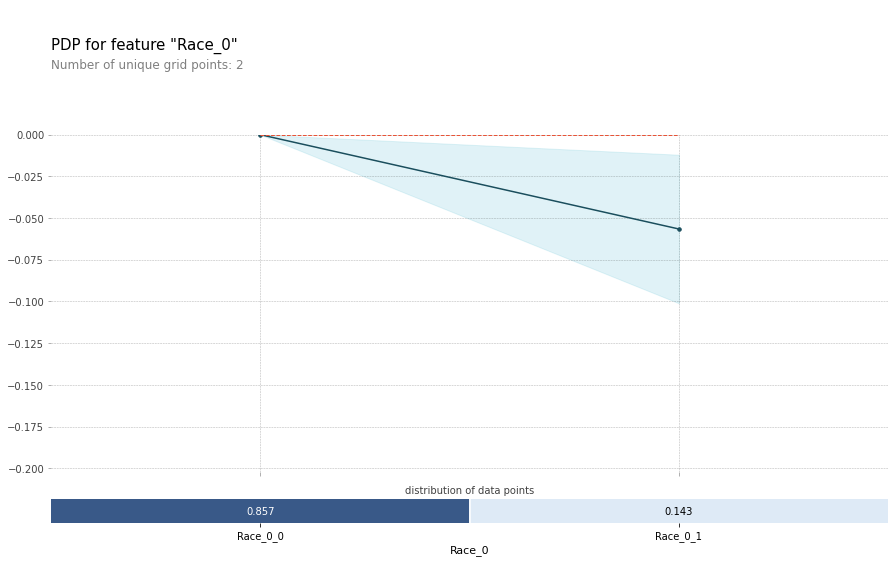

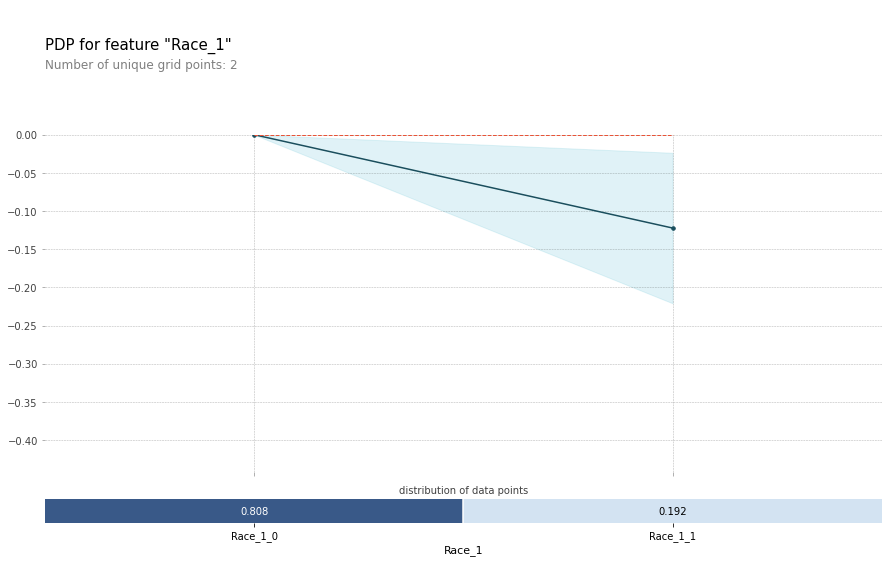

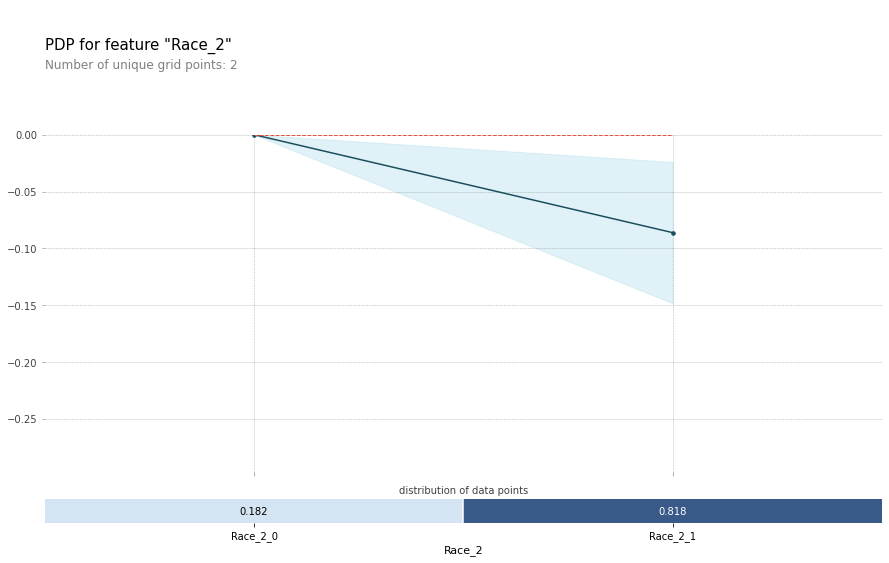

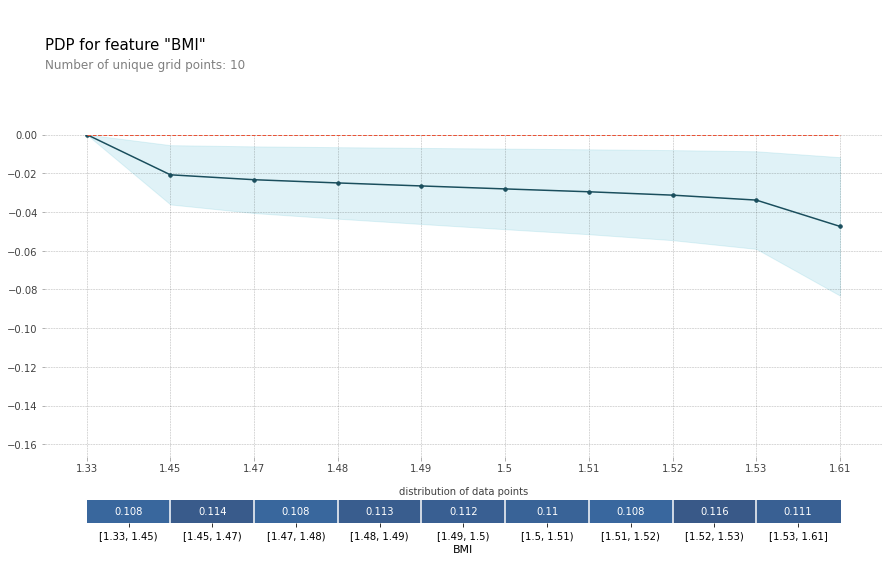

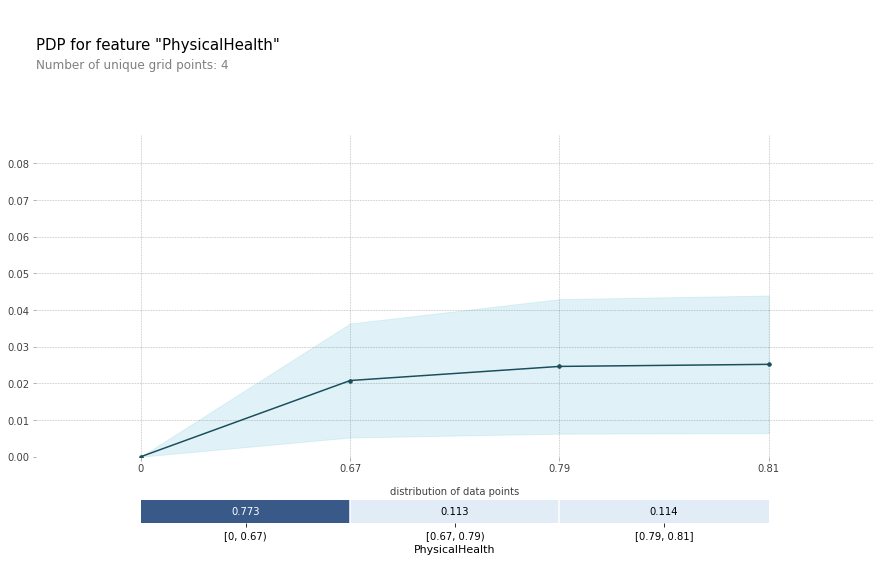

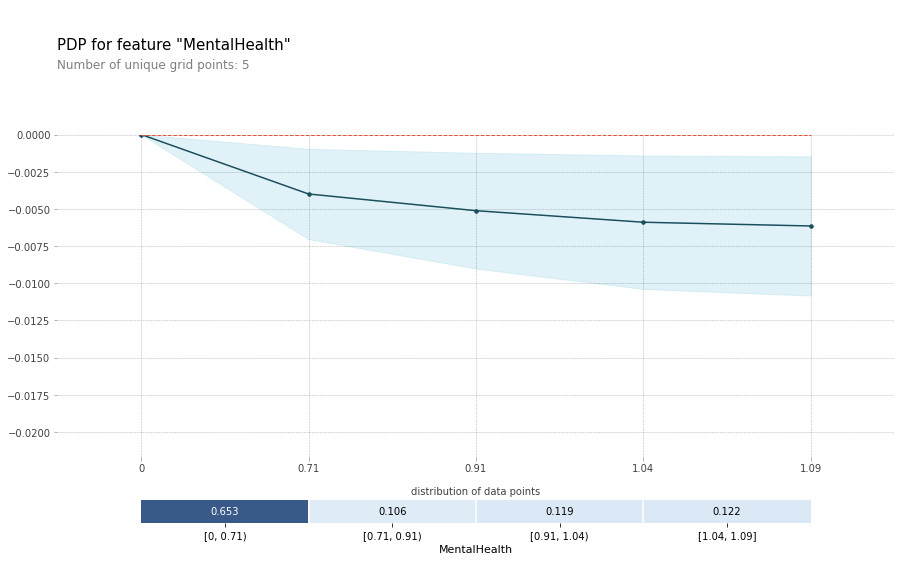

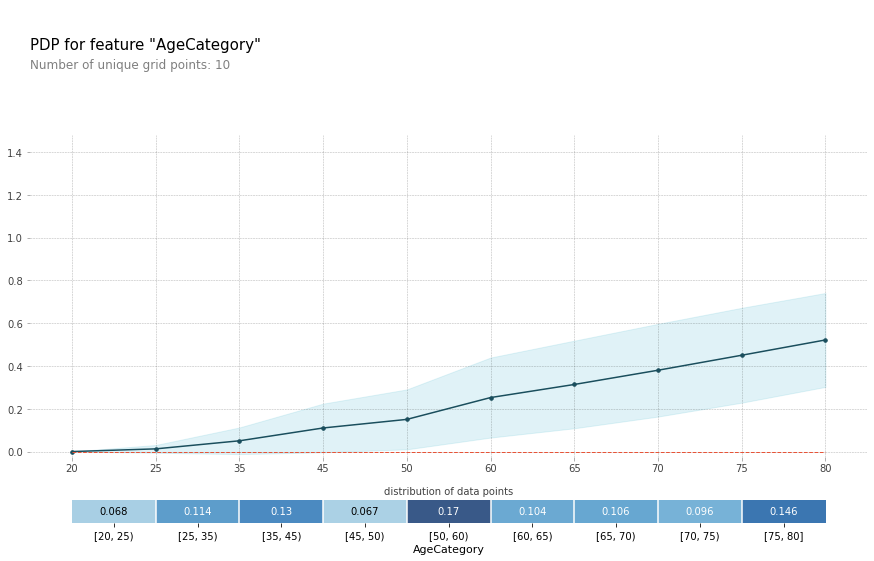

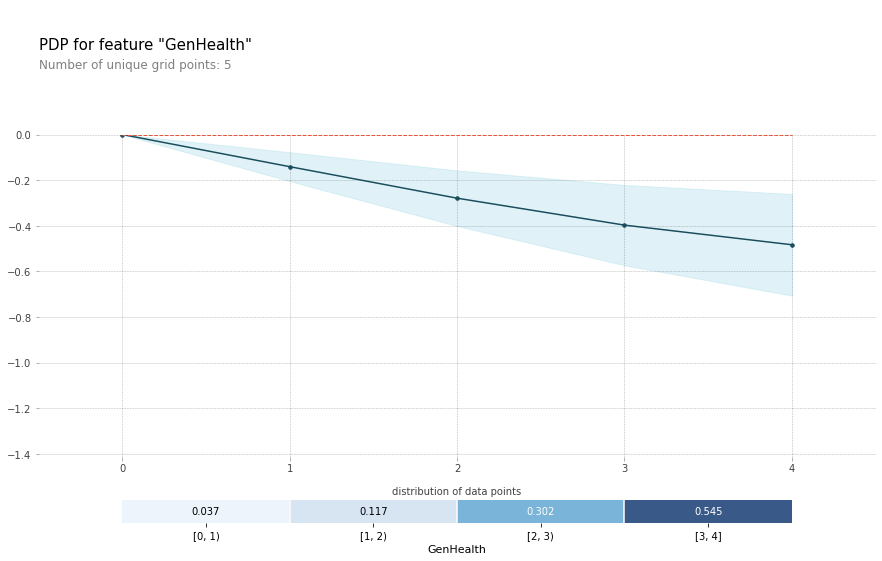

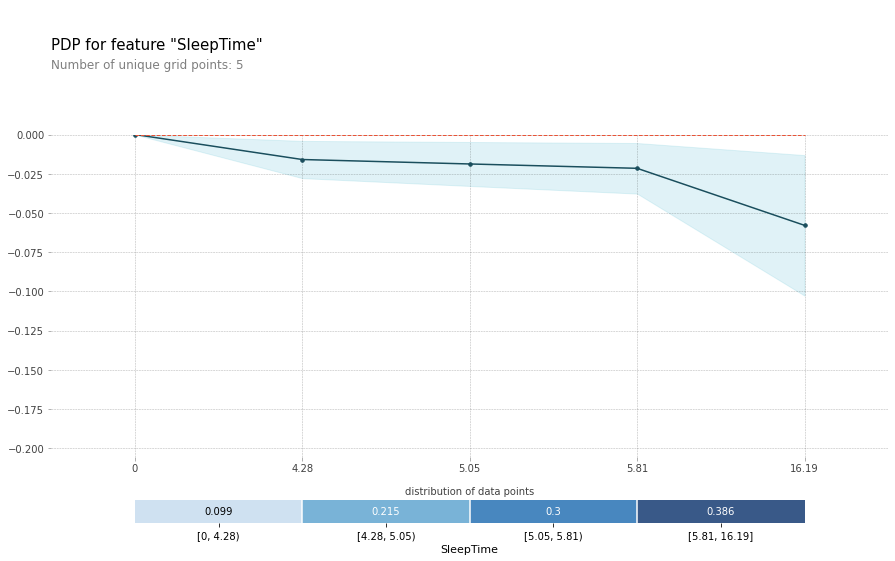

In [58]:
# PDP
for i in range (len(feature)):
  pdp_res = pdp.pdp_isolate(model=model_SVMSMOTE, dataset=x_test, model_features=features, feature=feature[i])
  pdp.pdp_plot(pdp_res, feature[i], plot_pts_dist=True)

for i in range (len(feature2)):
  pdp_res = pdp.pdp_isolate(model=model_SVMSMOTE, dataset=x_test, model_features=features, feature=feature2[i])
  pdp.pdp_plot(pdp_res, feature2[i], plot_pts_dist=True,  x_quantile=True)

In [59]:
# ICE
for i in range (len(feature)):
  pdp_res = pdp.pdp_isolate(model=model_SVMSMOTE, dataset=x_test, model_features=features, feature=feature[i])
  pdp.pdp_plot(pdp_res, feature[i],frac_to_plot=1000, plot_lines=True, plot_pts_dist=True)

for i in range (len(feature2)):
  pdp_res = pdp.pdp_isolate(model=model_SVMSMOTE, dataset=x_test, model_features=features, feature=feature2[i])
  pdp.pdp_plot(pdp_res, feature2[i], frac_to_plot=1000, plot_lines=True, plot_pts_dist=True,  x_quantile=True)

Output hidden; open in https://colab.research.google.com to view.

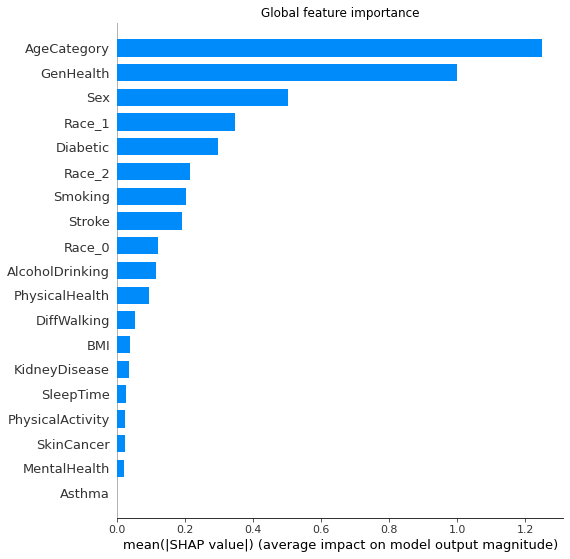

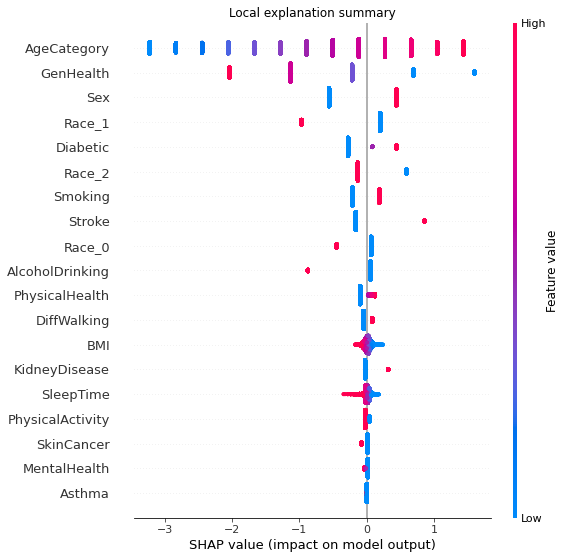

In [60]:
# SHAP
explainer = shap.Explainer(model_SVMSMOTE, x_train_SVMSMOTE, feature_names=features)
shap_values = explainer(x_test)

plt.title('Global feature importance')
shap.summary_plot(shap_values, plot_type="bar")

plt.title('Local explanation summary')
shap.summary_plot(shap_values)

# ADASYN 샘플링 PDP, ICE, SHAP

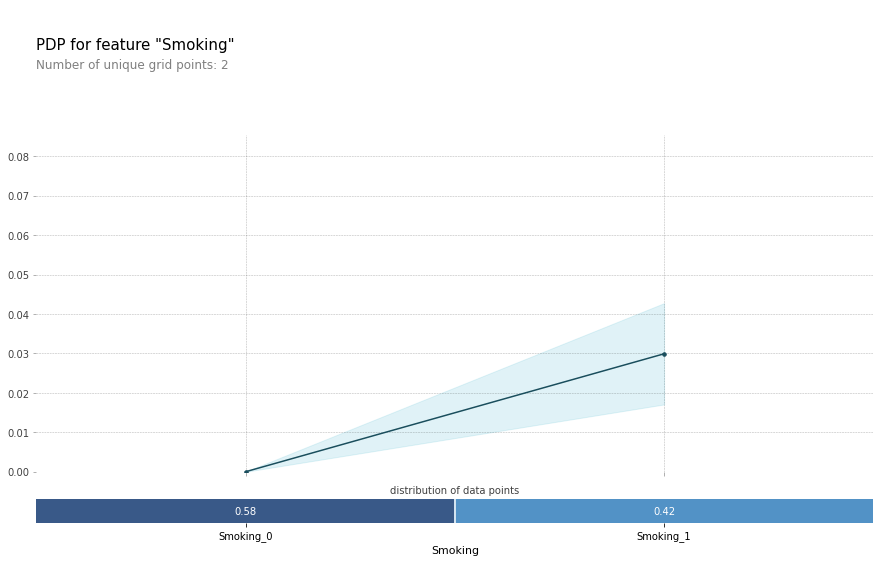

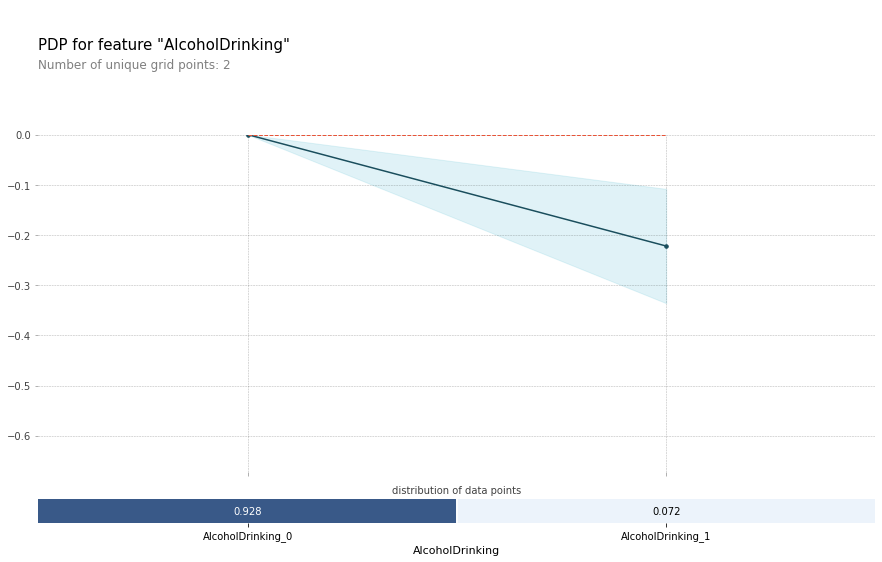

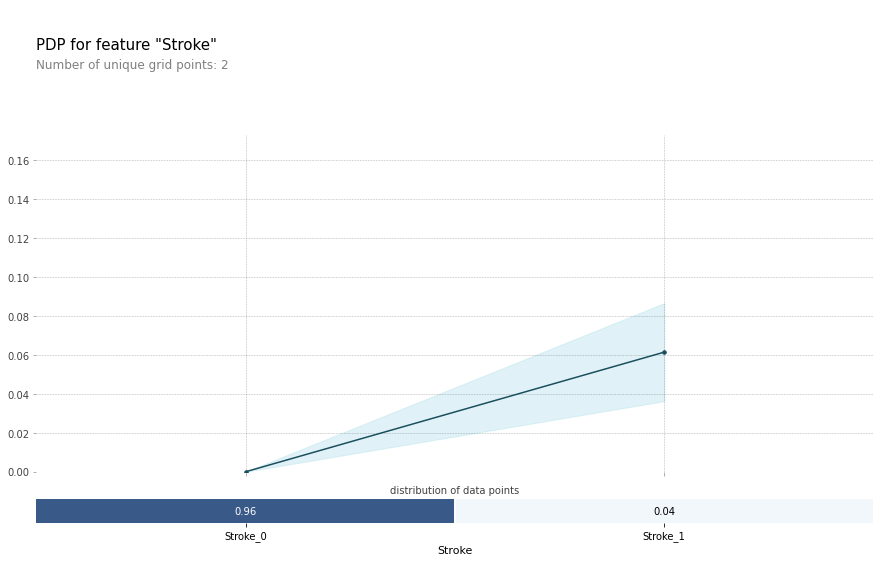

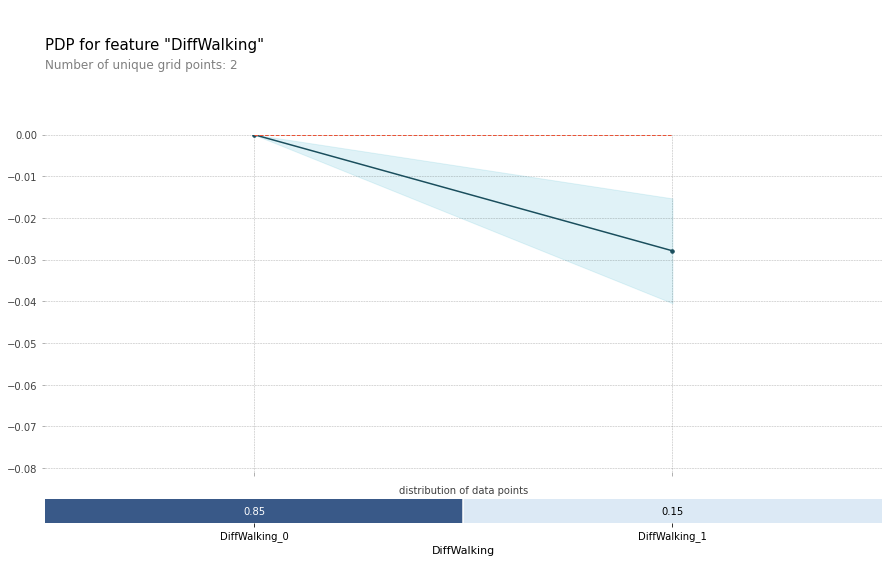

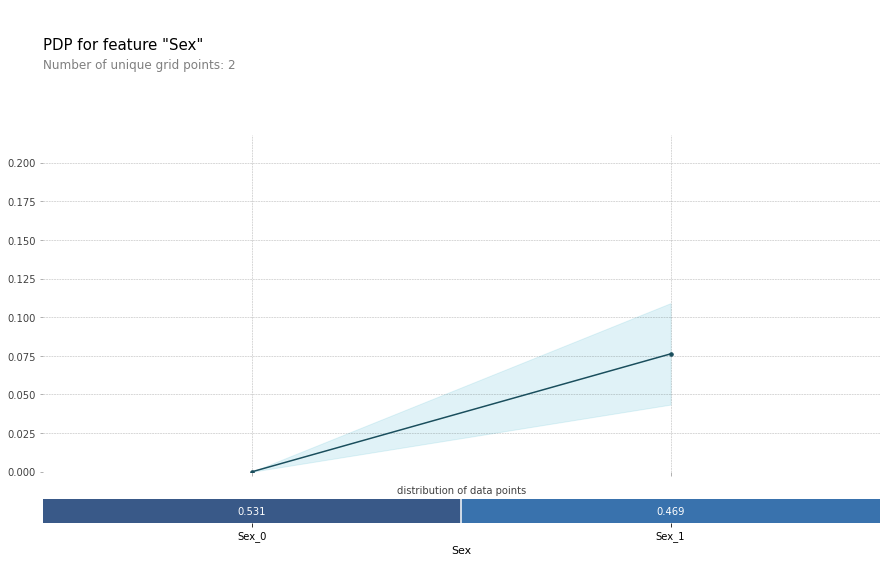

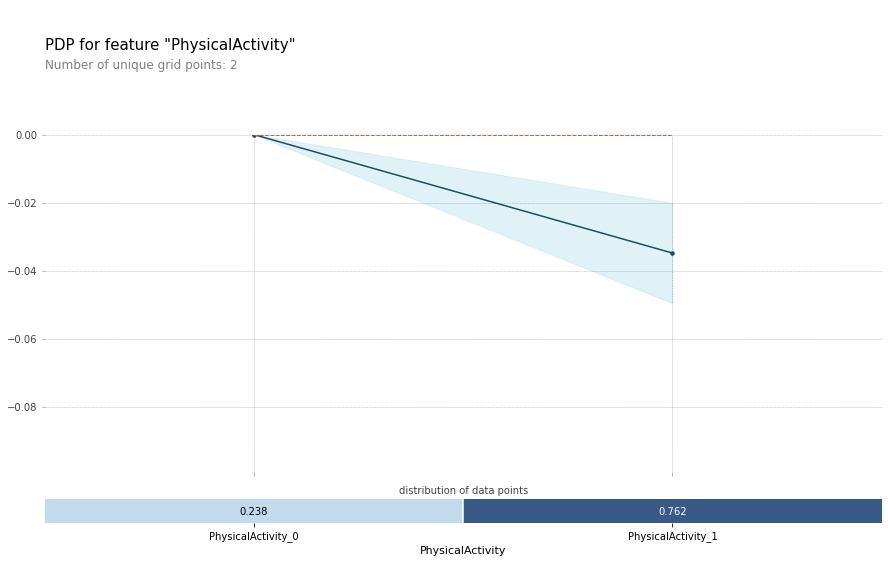

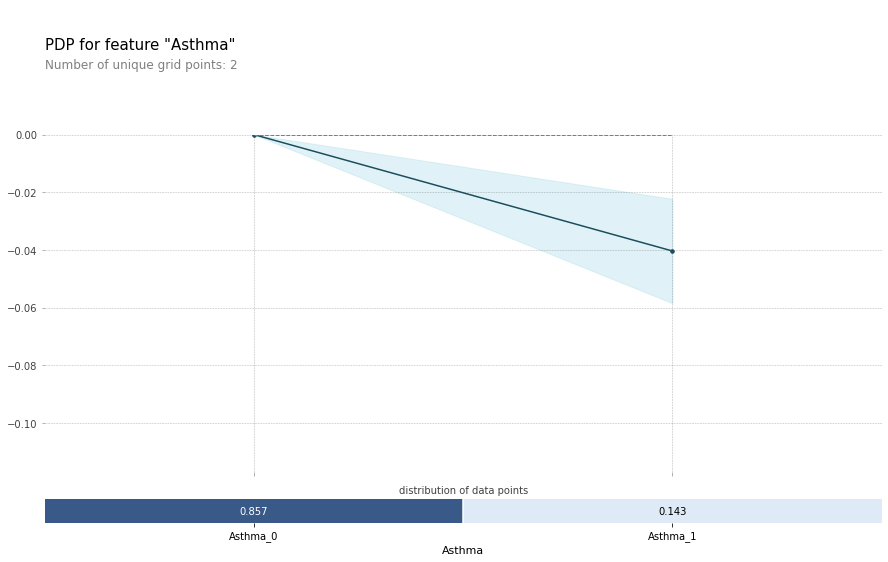

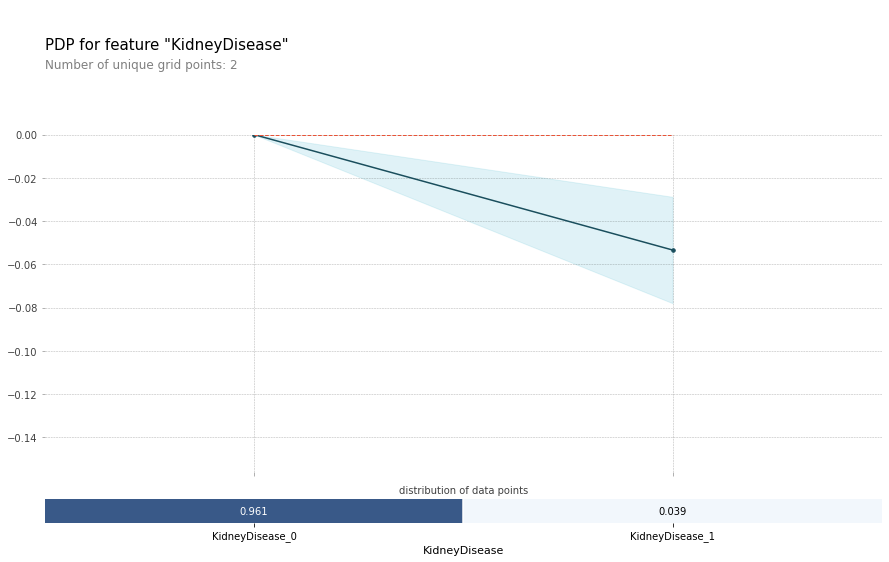

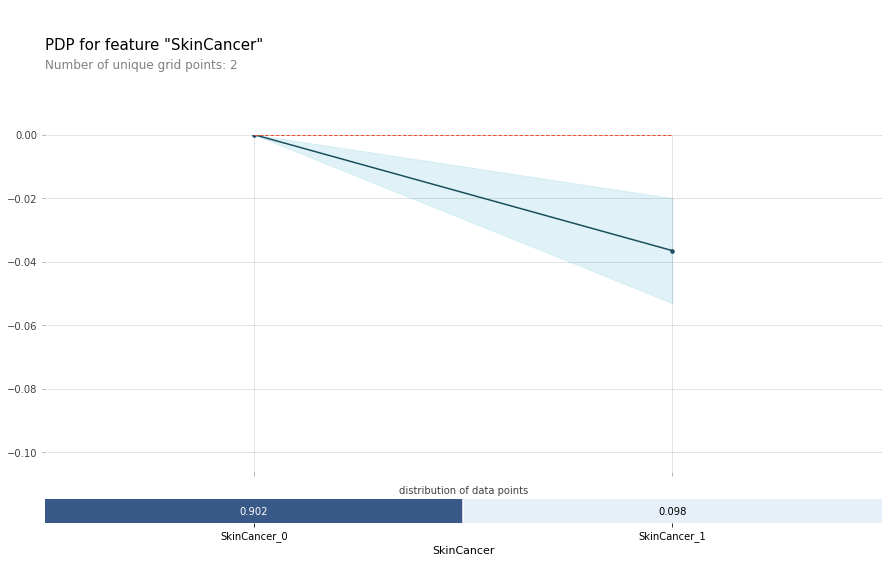

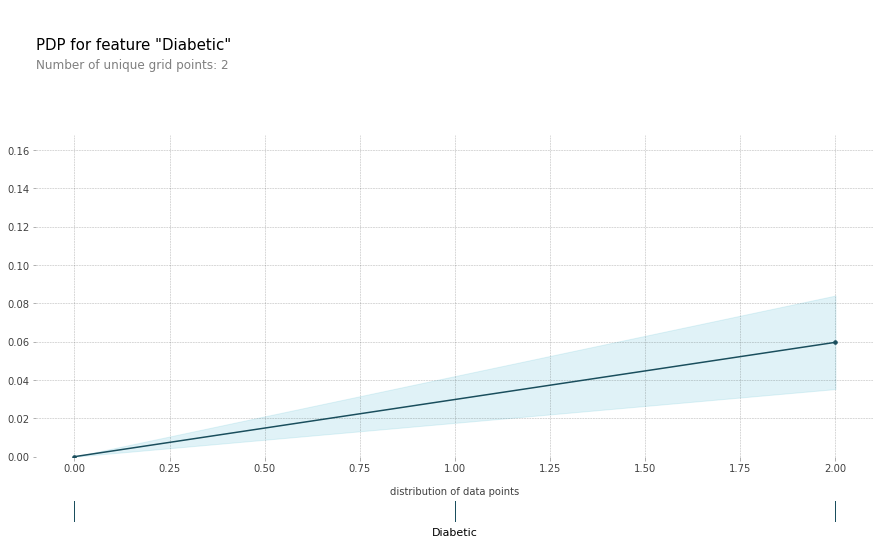

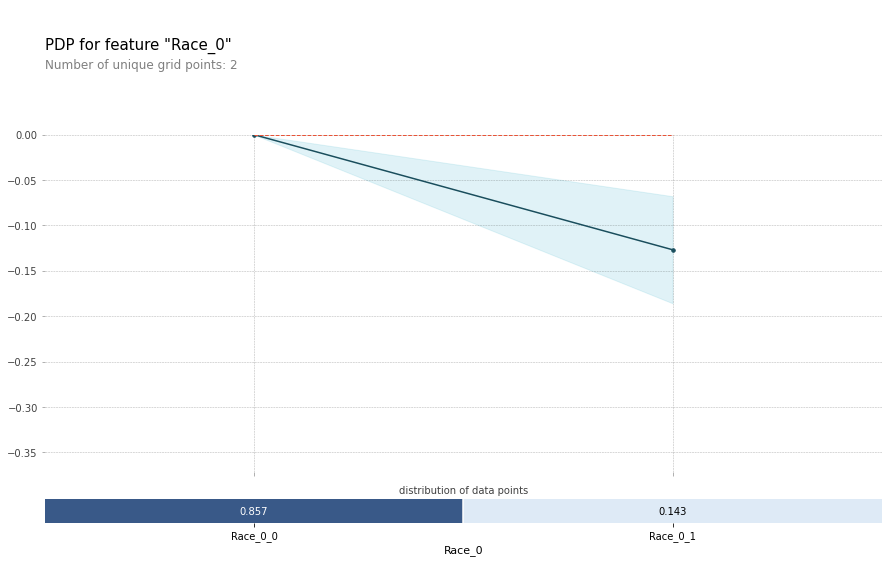

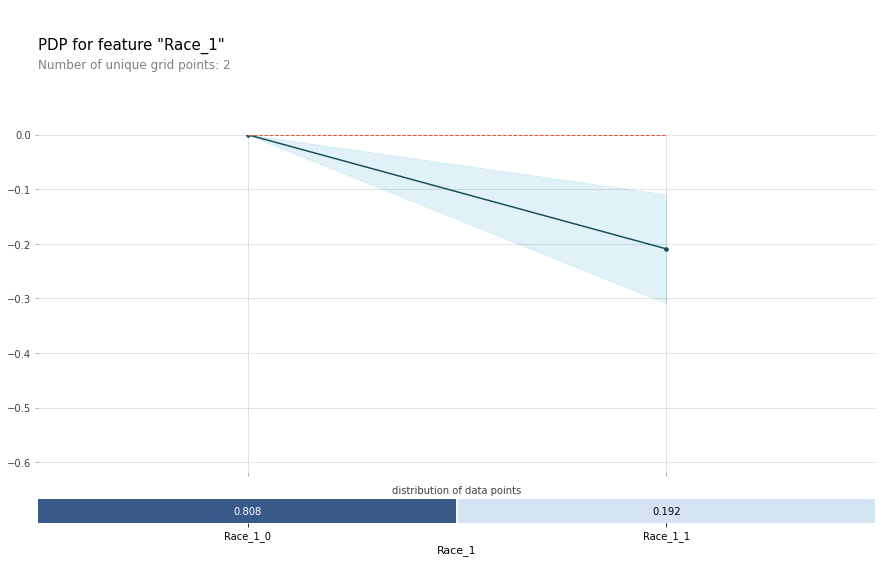

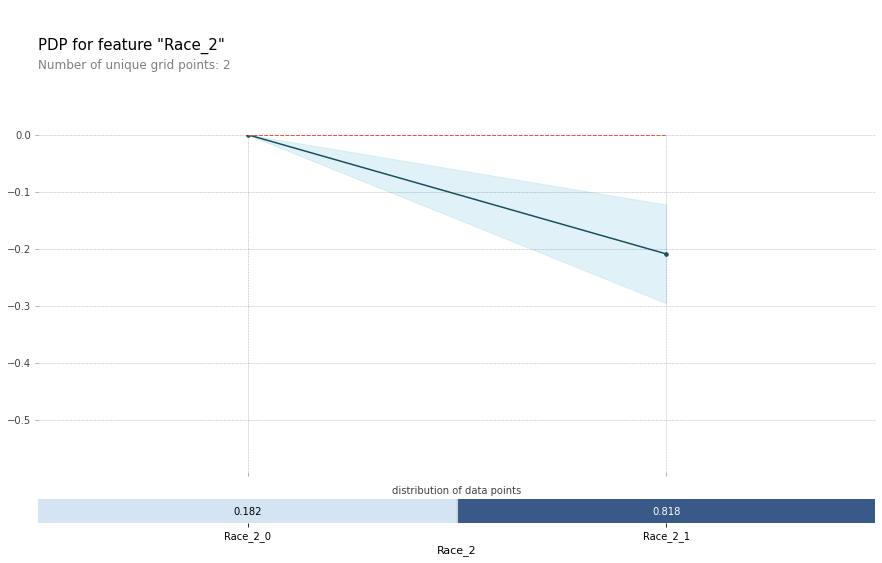

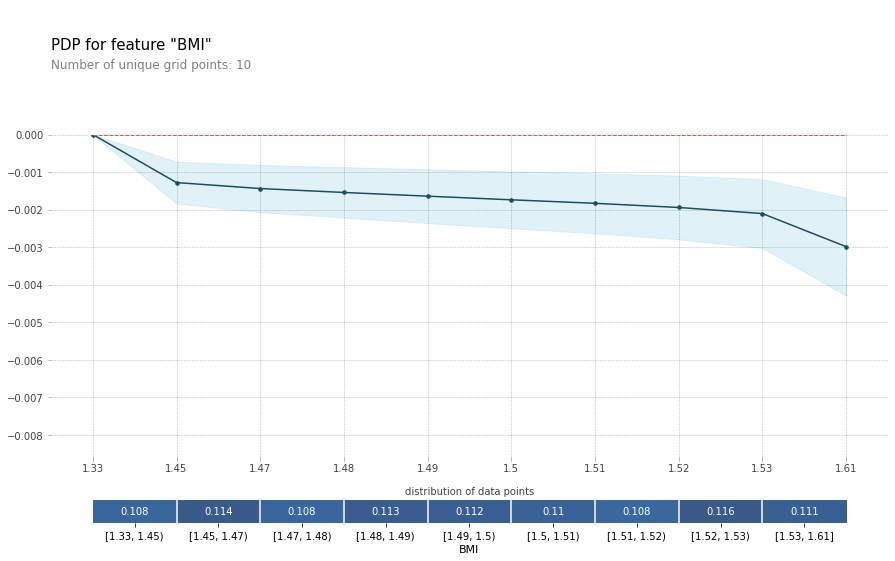

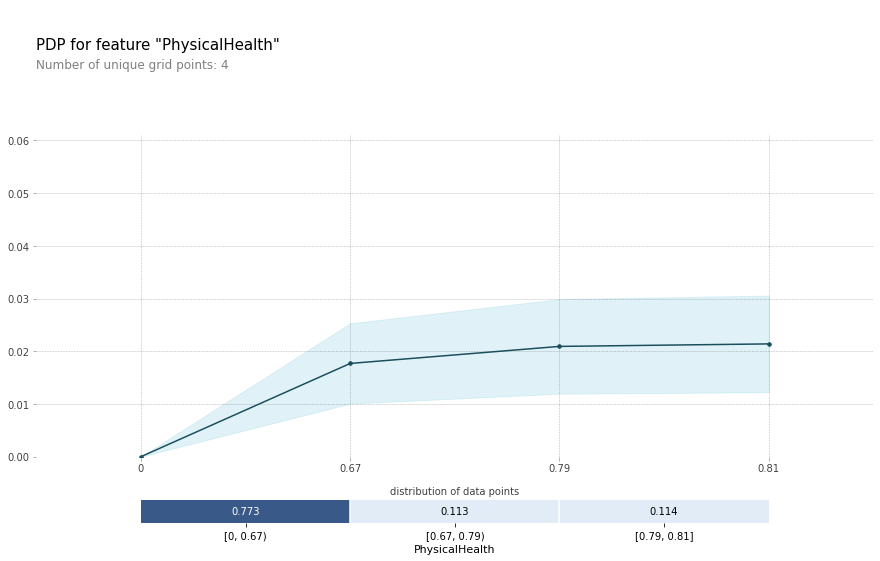

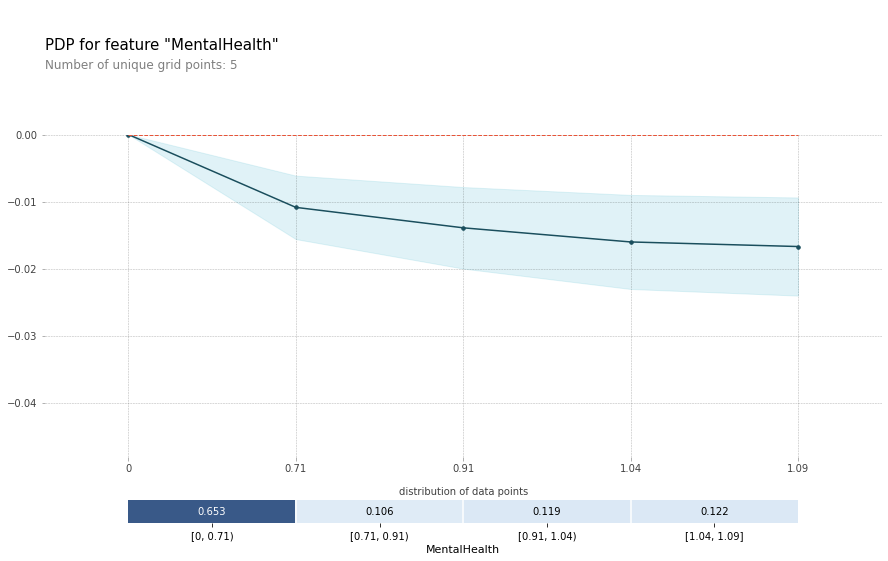

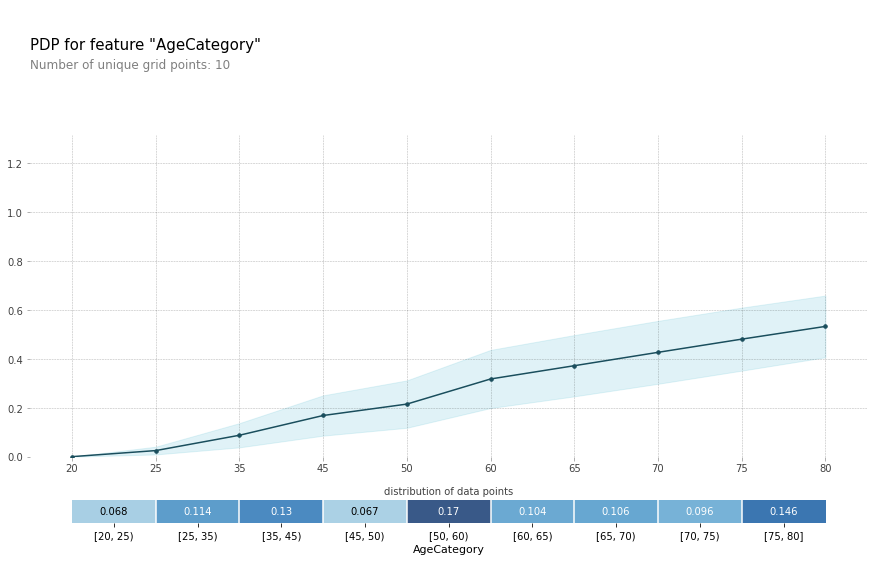

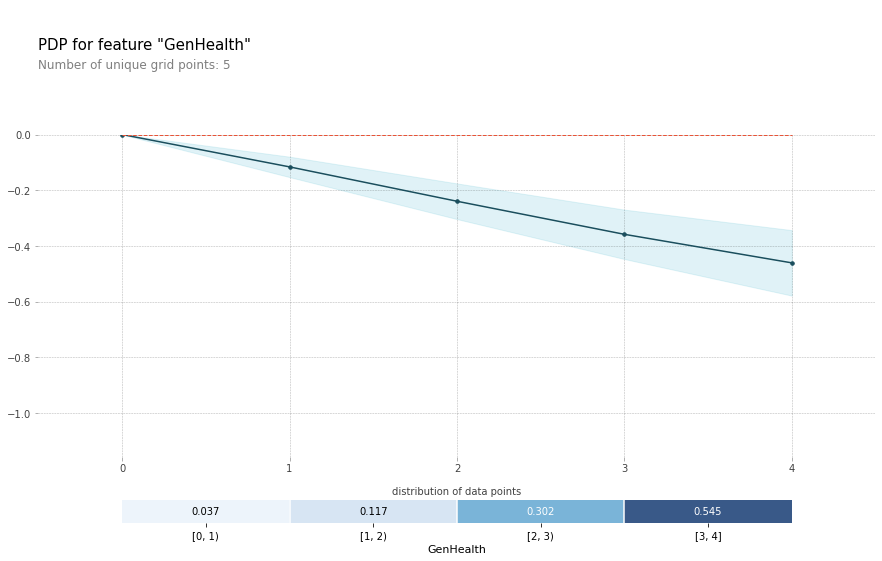

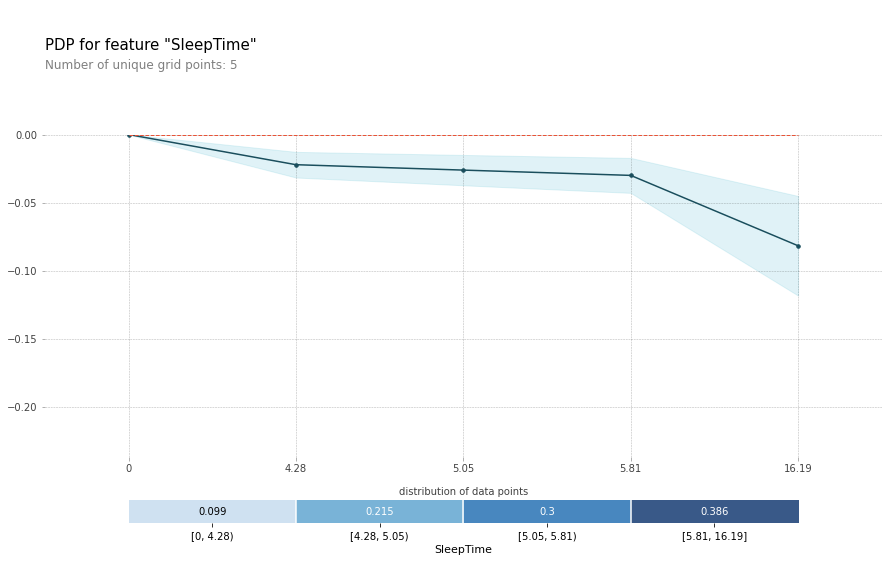

In [61]:
# PDP
for i in range (len(feature)):
  pdp_res = pdp.pdp_isolate(model=model_ADASYN, dataset=x_test, model_features=features, feature=feature[i])
  pdp.pdp_plot(pdp_res, feature[i], plot_pts_dist=True)

for i in range (len(feature2)):
  pdp_res = pdp.pdp_isolate(model=model_ADASYN, dataset=x_test, model_features=features, feature=feature2[i])
  pdp.pdp_plot(pdp_res, feature2[i], plot_pts_dist=True,  x_quantile=True)

In [62]:
# ICE
for i in range (len(feature)):
  pdp_res = pdp.pdp_isolate(model=model_ADASYN, dataset=x_test, model_features=features, feature=feature[i])
  pdp.pdp_plot(pdp_res, feature[i],frac_to_plot=1000, plot_lines=True, plot_pts_dist=True)

for i in range (len(feature2)):
  pdp_res = pdp.pdp_isolate(model=model_ADASYN, dataset=x_test, model_features=features, feature=feature2[i])
  pdp.pdp_plot(pdp_res, feature2[i], frac_to_plot=1000, plot_lines=True, plot_pts_dist=True,  x_quantile=True)

Output hidden; open in https://colab.research.google.com to view.

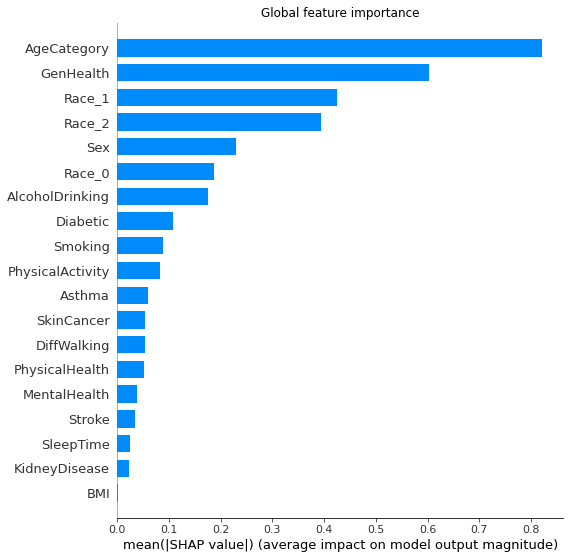

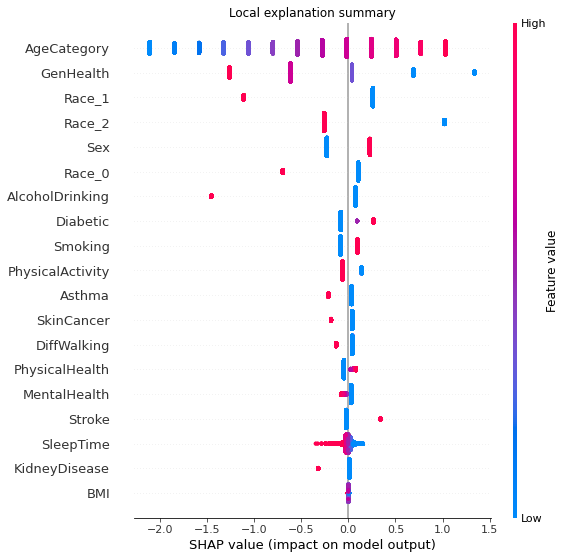

In [63]:
# SHAP
explainer = shap.Explainer(model_ADASYN, x_train_ADASYN, feature_names=features)
shap_values = explainer(x_test)

plt.title('Global feature importance')
shap.summary_plot(shap_values, plot_type="bar")


plt.title('Local explanation summary')
shap.summary_plot(shap_values)

# SMOTE-ENN 샘플링 PDP, ICE, SHAP

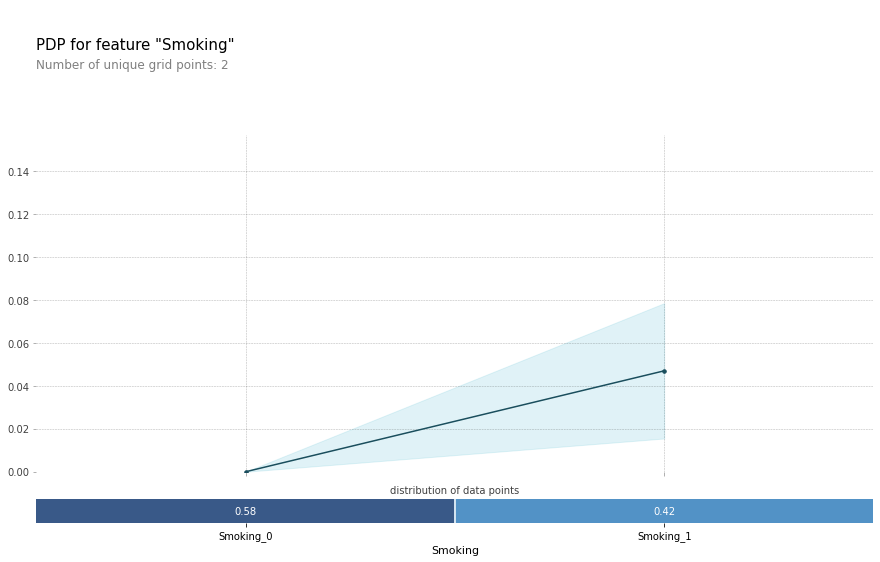

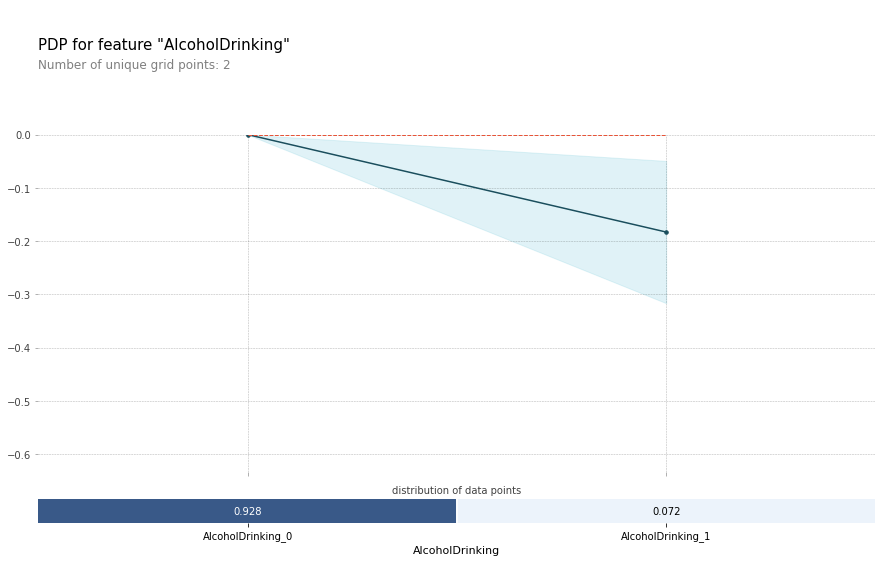

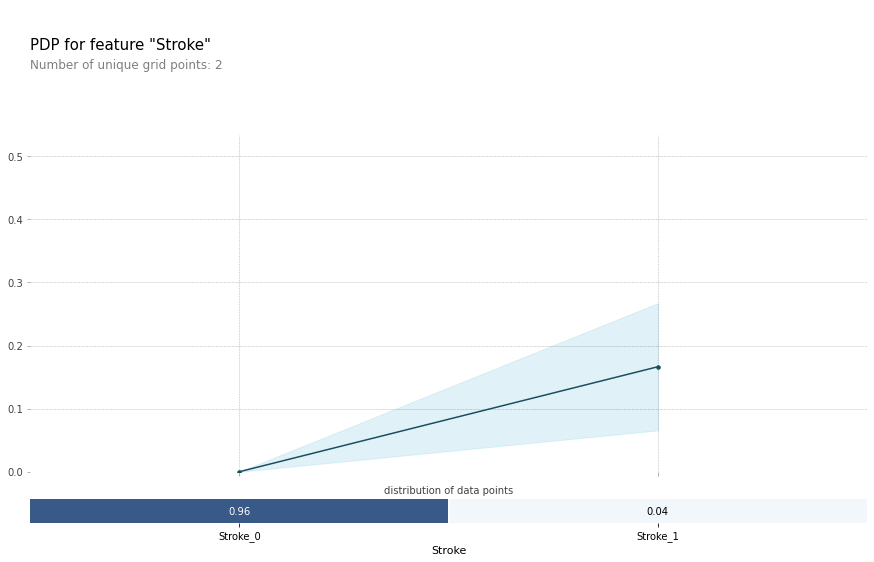

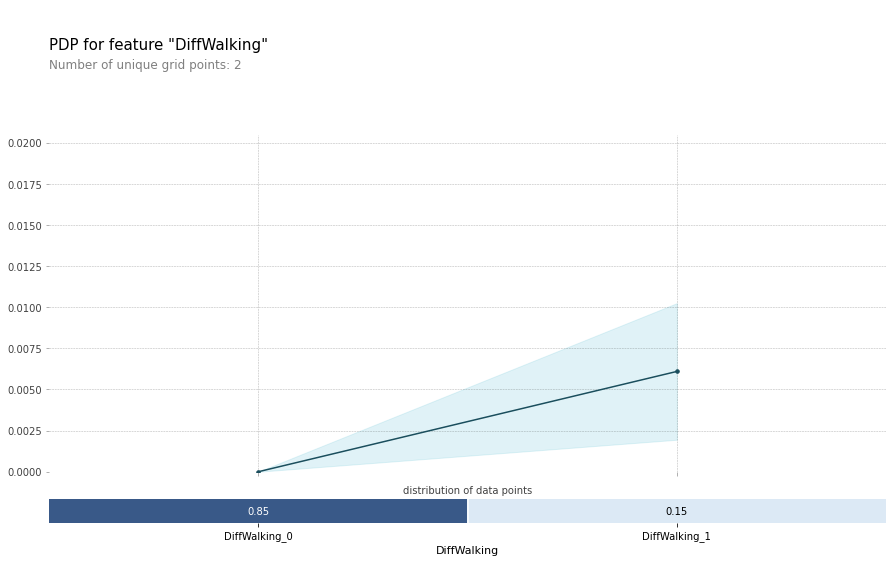

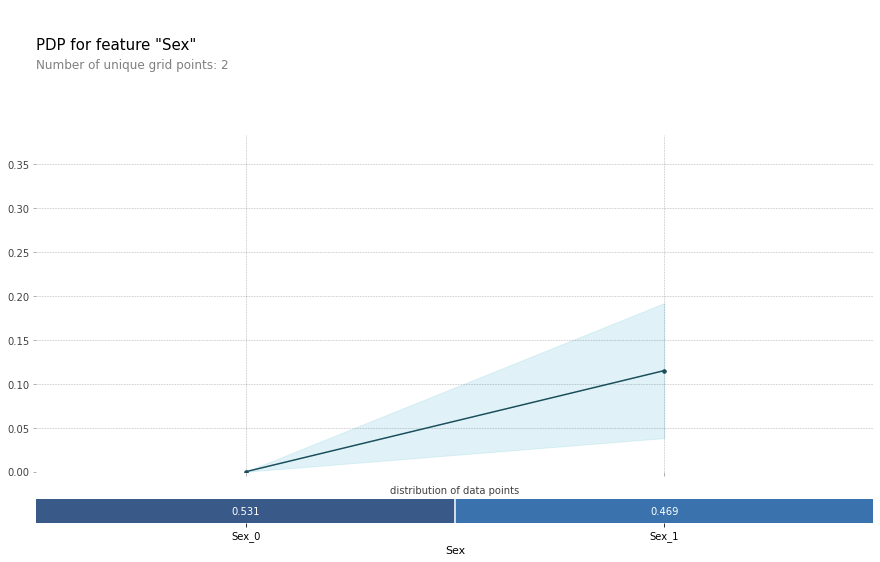

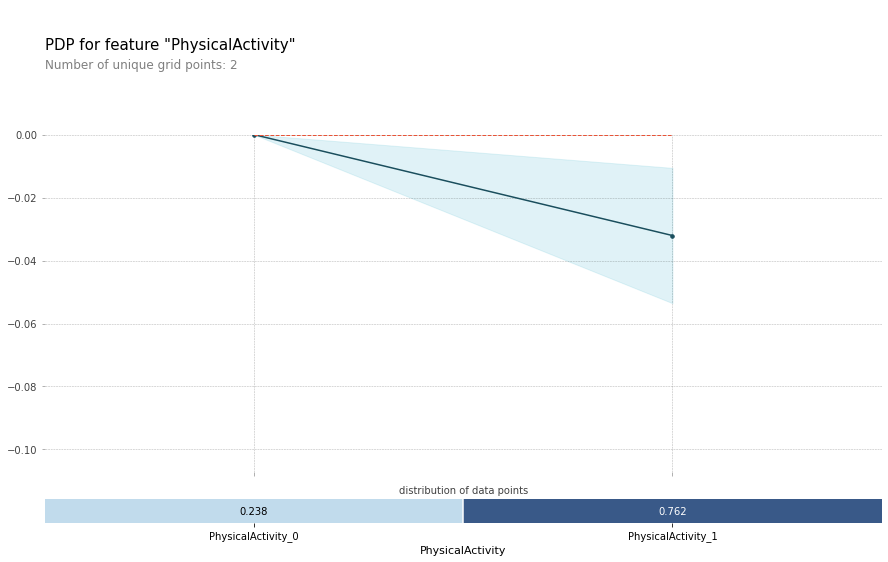

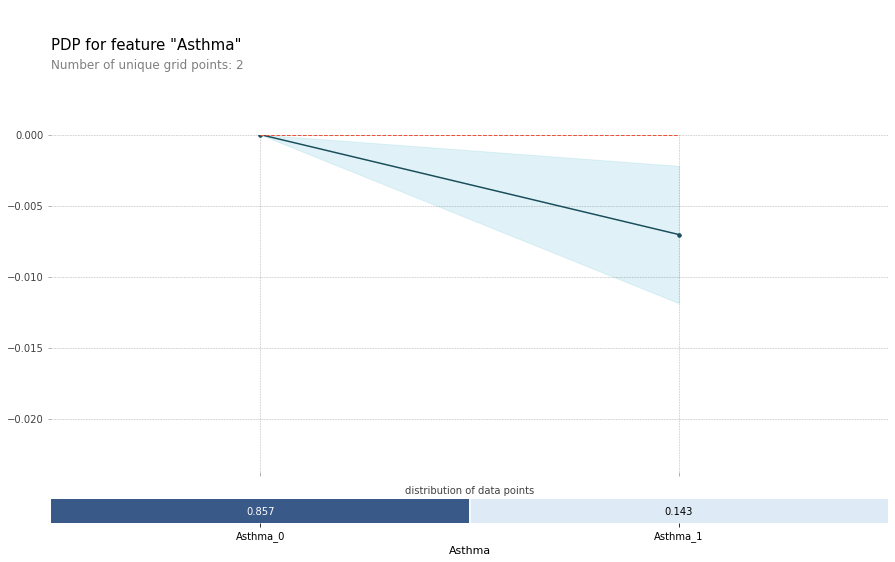

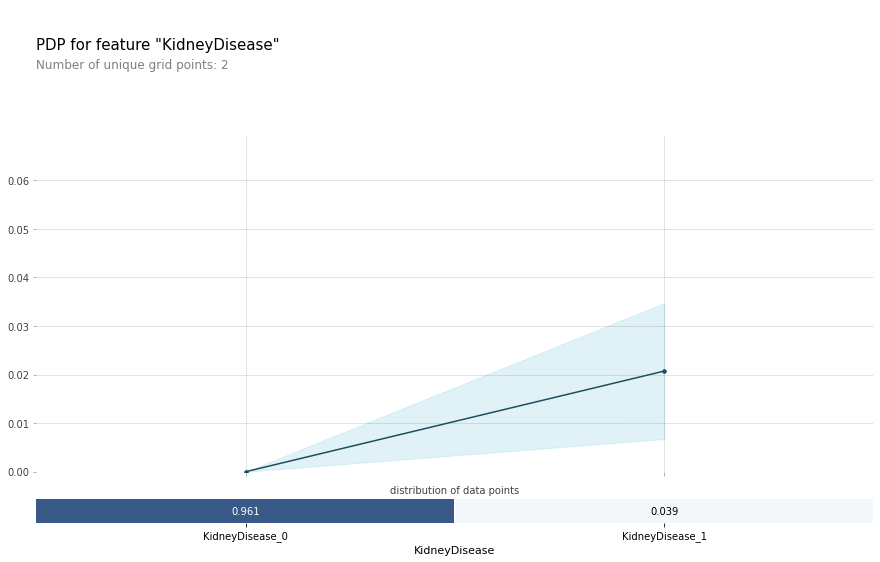

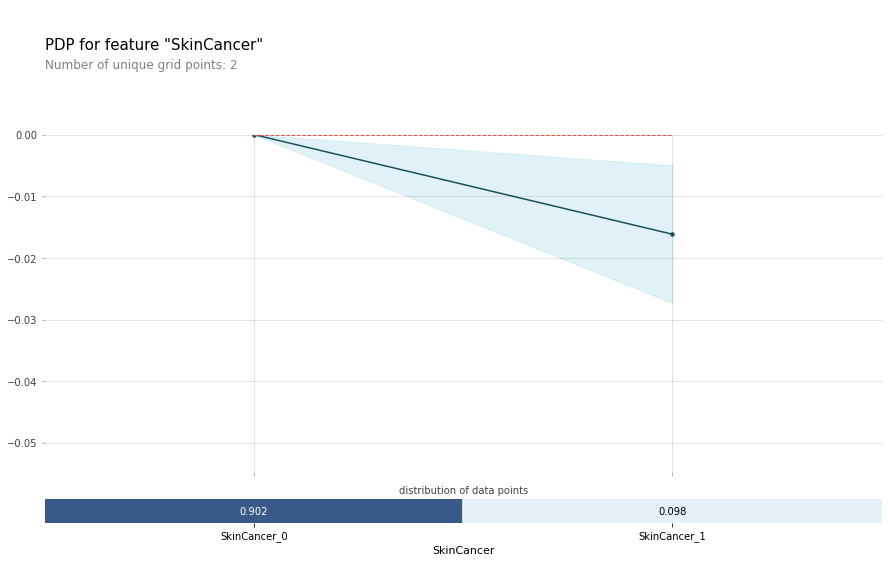

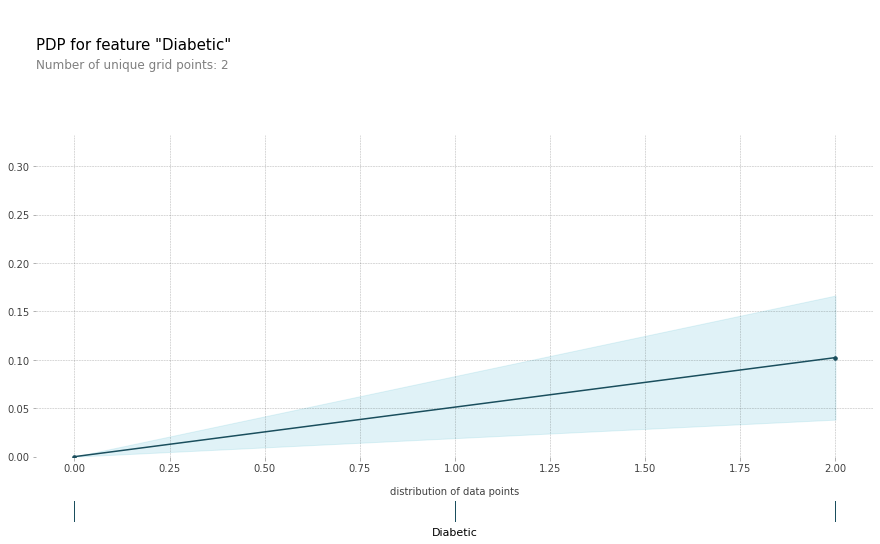

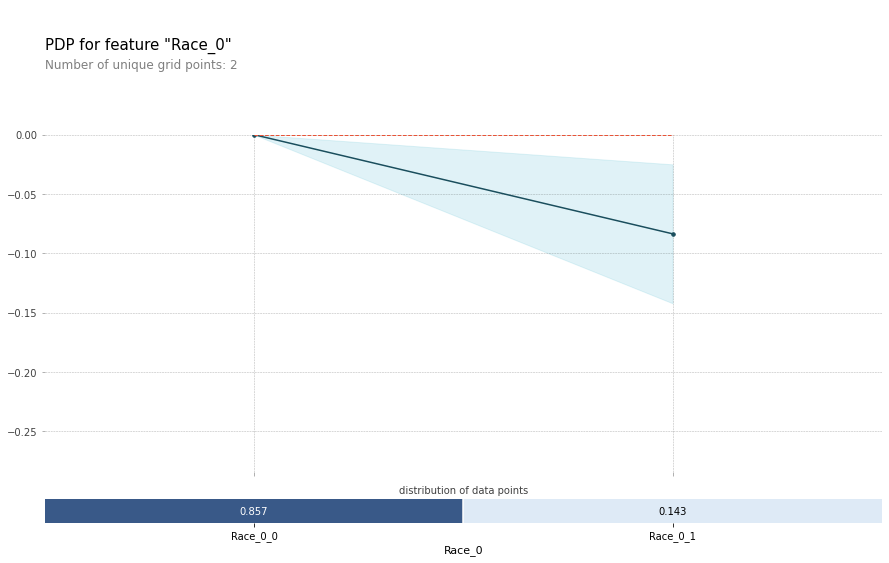

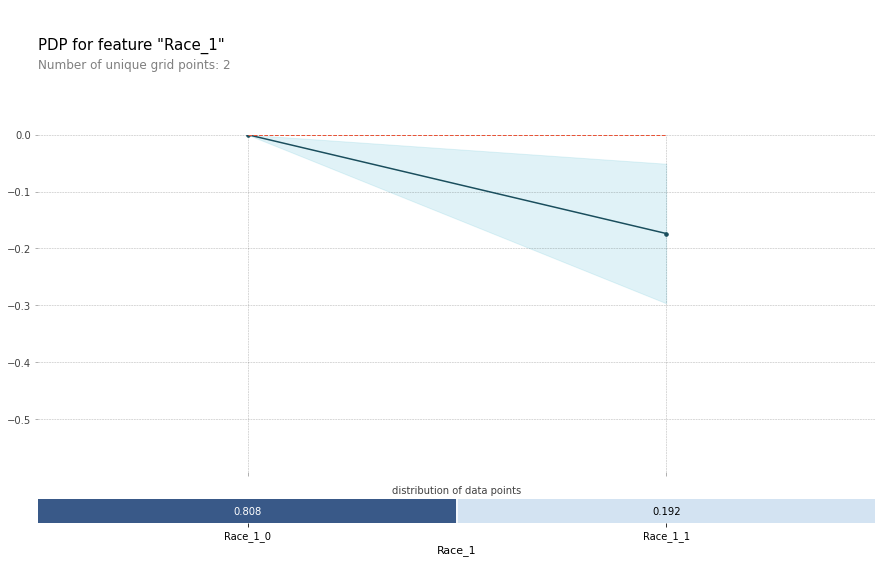

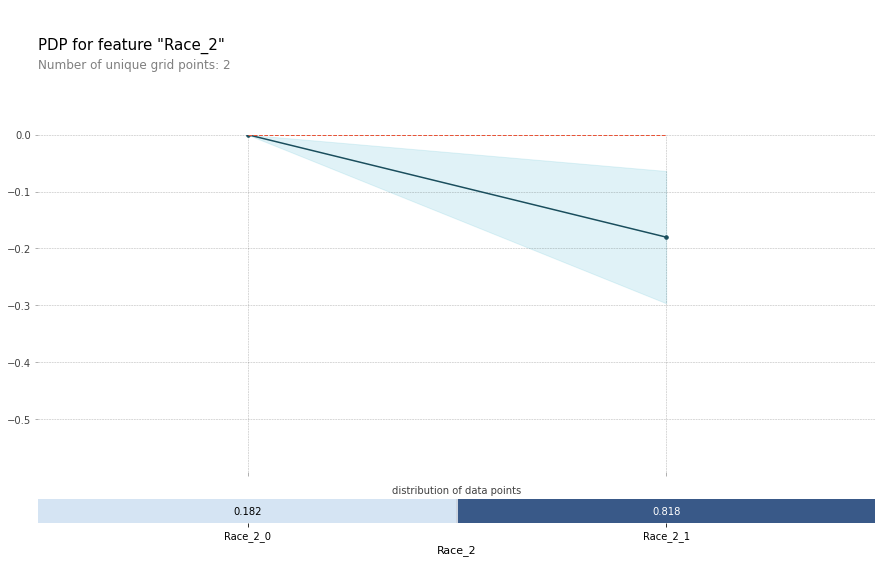

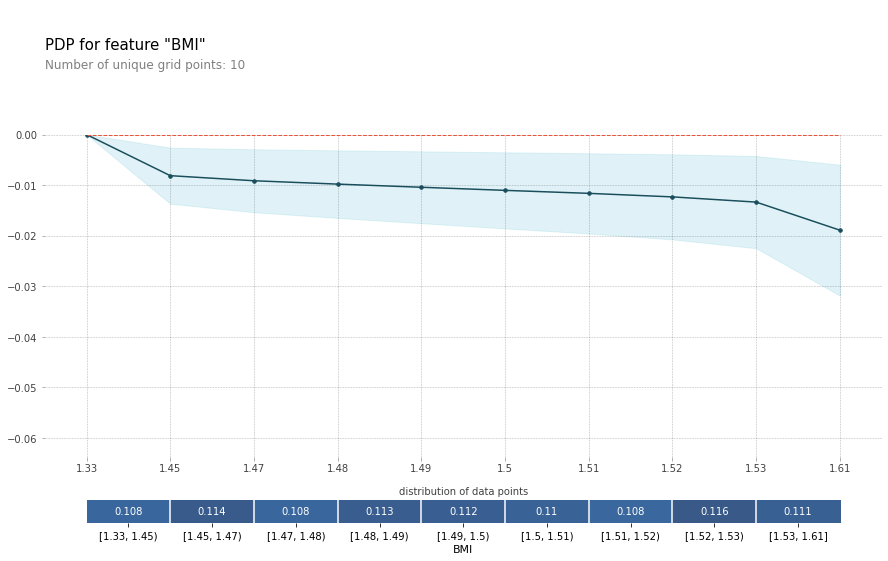

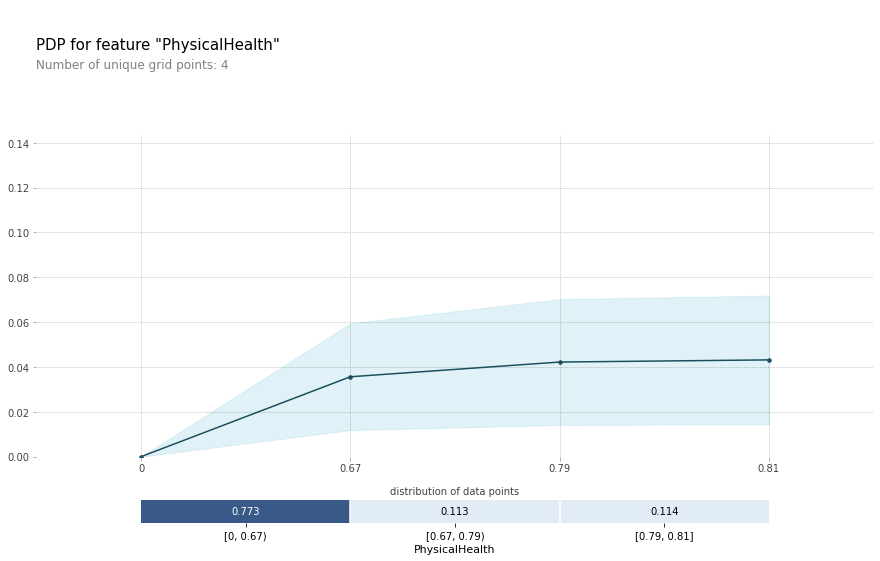

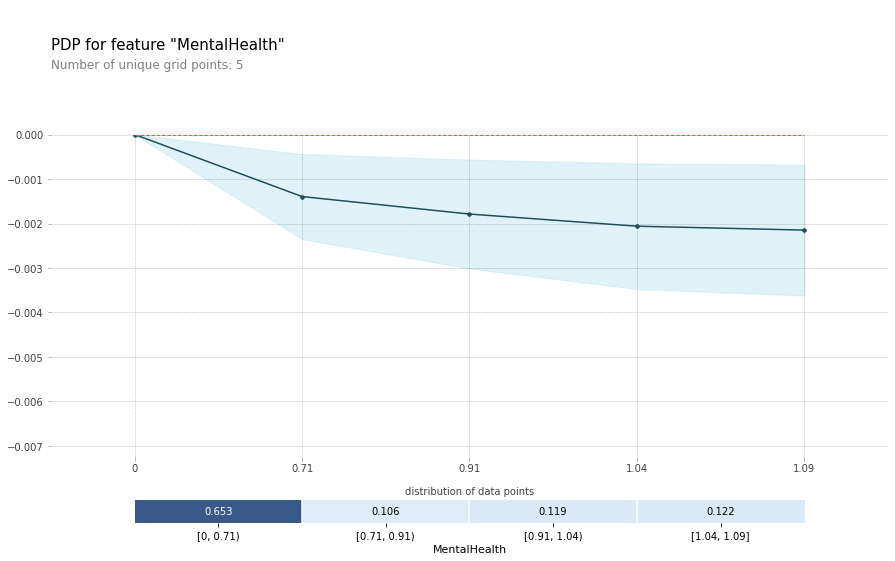

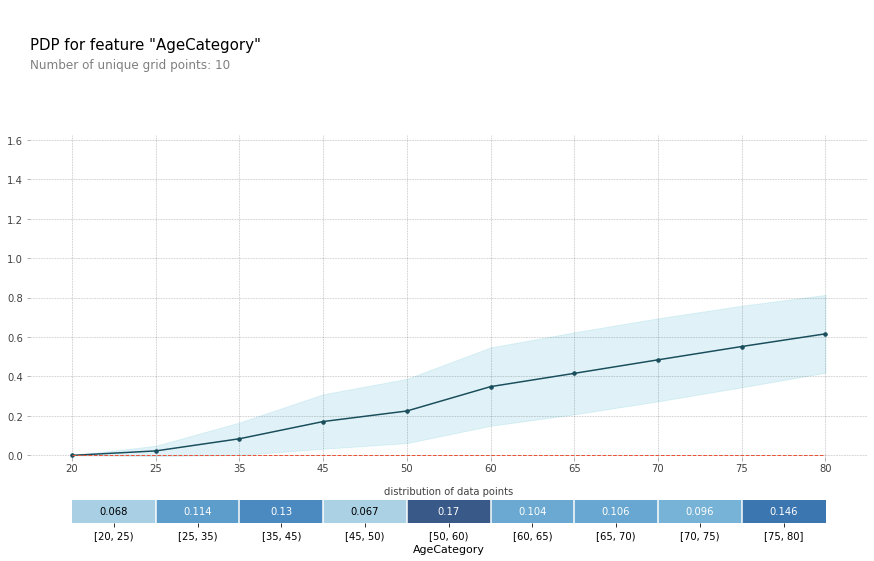

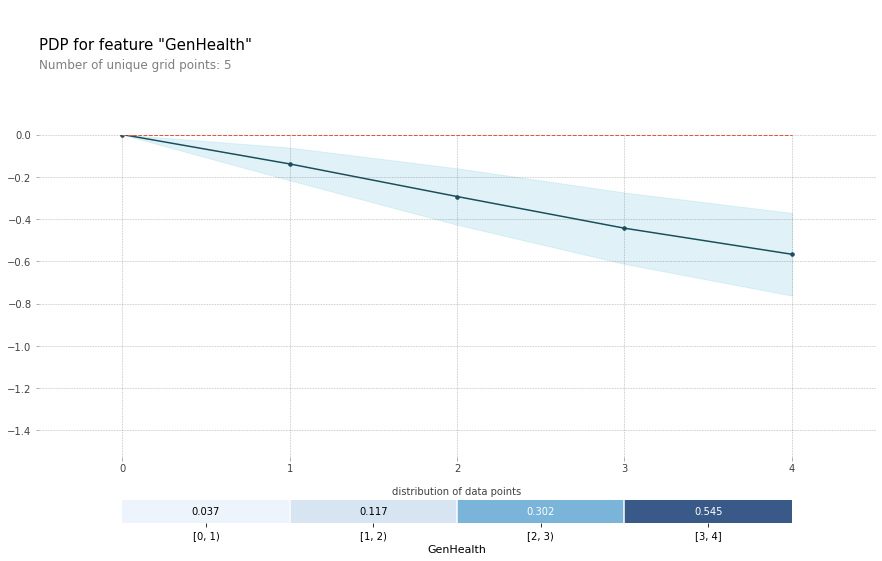

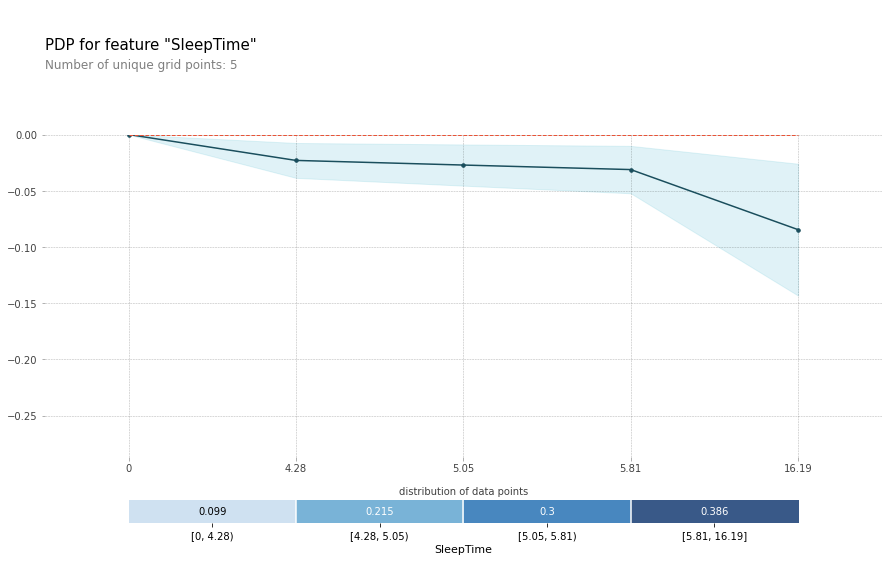

In [64]:
# PDP
for i in range (len(feature)):
  pdp_res = pdp.pdp_isolate(model=model_SMOTEENN, dataset=x_test, model_features=features, feature=feature[i])
  pdp.pdp_plot(pdp_res, feature[i], plot_pts_dist=True)

for i in range (len(feature2)):
  pdp_res = pdp.pdp_isolate(model=model_SMOTEENN, dataset=x_test, model_features=features, feature=feature2[i])
  pdp.pdp_plot(pdp_res, feature2[i], plot_pts_dist=True,  x_quantile=True)

In [65]:
# ICE
for i in range (len(feature)):
  pdp_res = pdp.pdp_isolate(model=model_SMOTEENN, dataset=x_test, model_features=features, feature=feature[i])
  pdp.pdp_plot(pdp_res, feature[i],frac_to_plot=1000, plot_lines=True, plot_pts_dist=True)

for i in range (len(feature2)):
  pdp_res = pdp.pdp_isolate(model=model_SMOTEENN, dataset=x_test, model_features=features, feature=feature2[i])
  pdp.pdp_plot(pdp_res, feature2[i], frac_to_plot=1000, plot_lines=True, plot_pts_dist=True,  x_quantile=True)

Output hidden; open in https://colab.research.google.com to view.

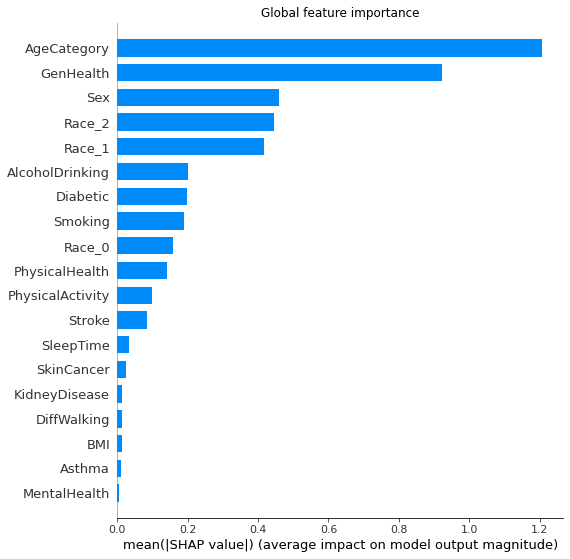

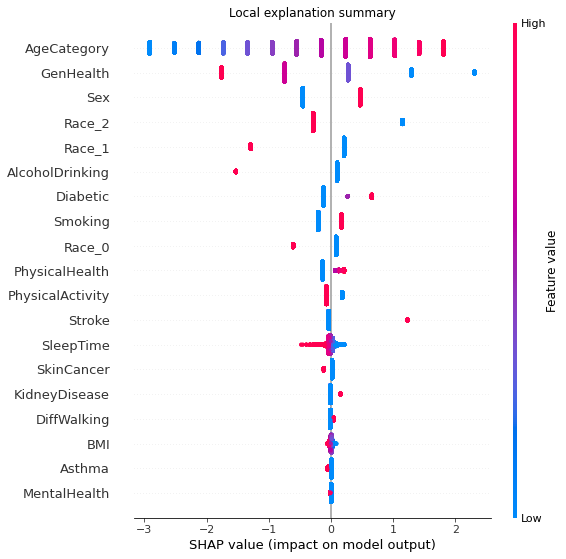

In [66]:
# SHAP
explainer = shap.Explainer(model_SMOTEENN, x_train_SMOTEENN, feature_names=features)
shap_values = explainer(x_test)

plt.title('Global feature importance')
shap.summary_plot(shap_values, plot_type="bar")


plt.title('Local explanation summary')
shap.summary_plot(shap_values)

# CostSensitive Model - PDP, ICE, SHAP

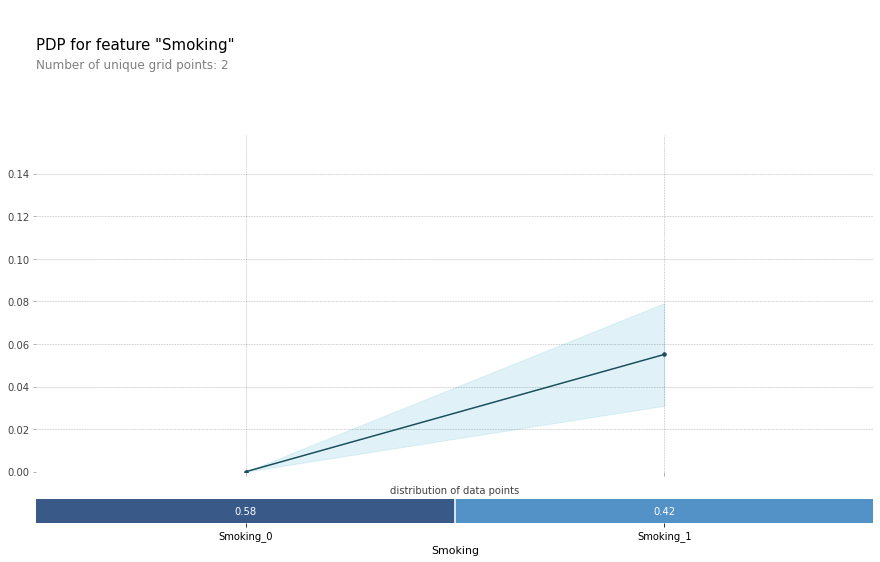

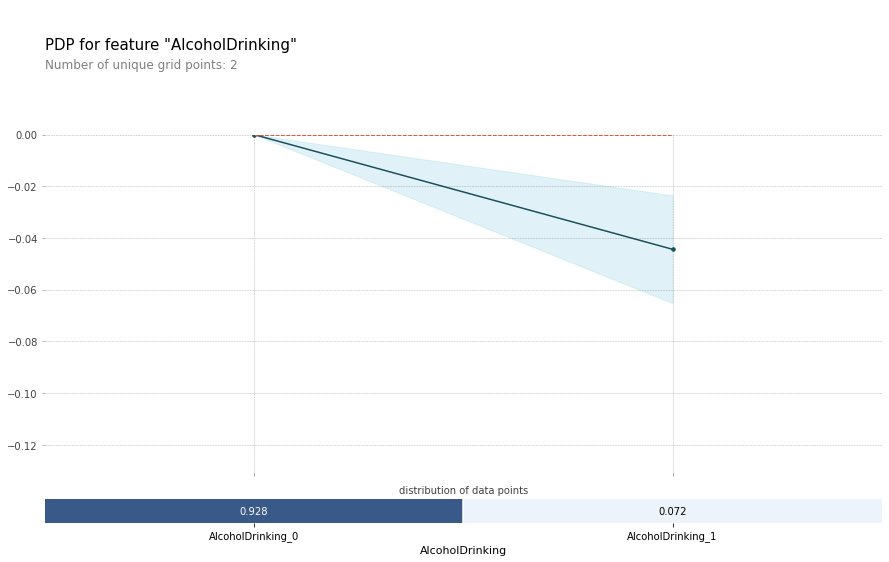

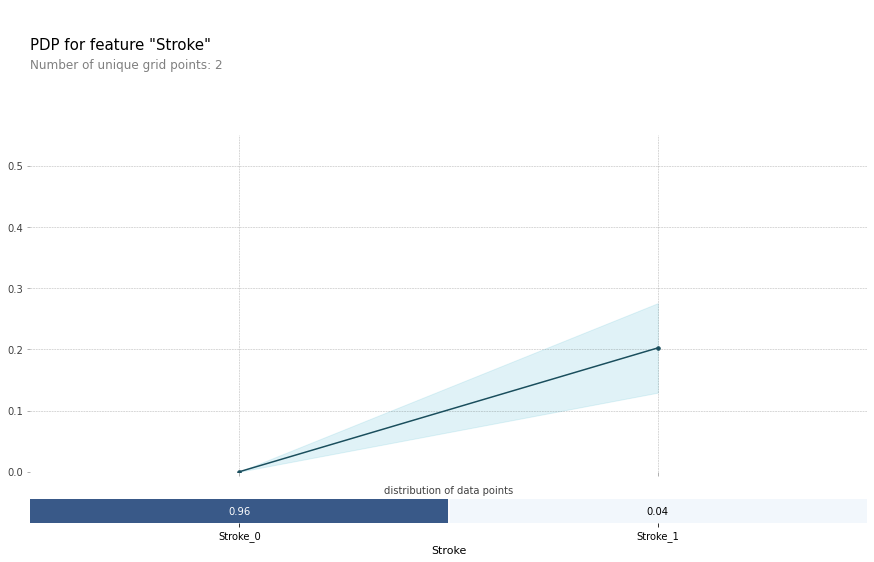

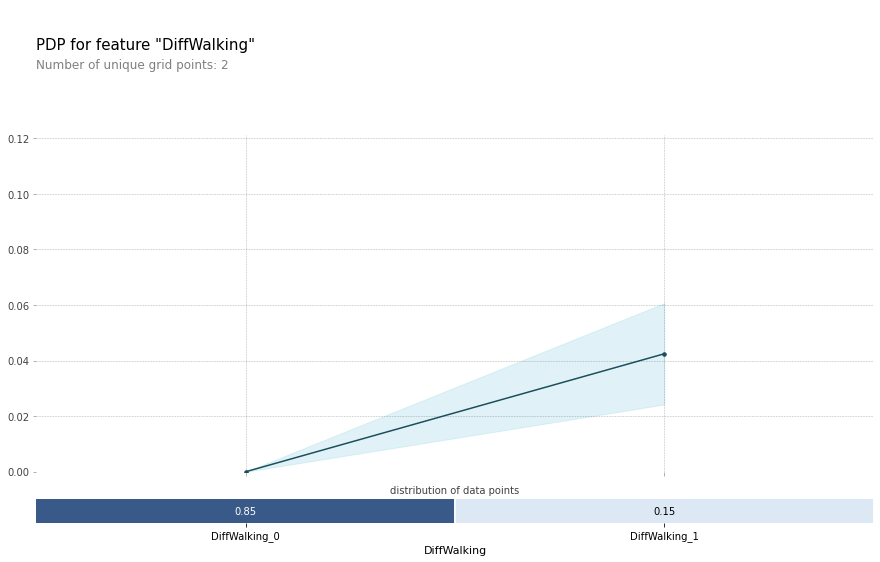

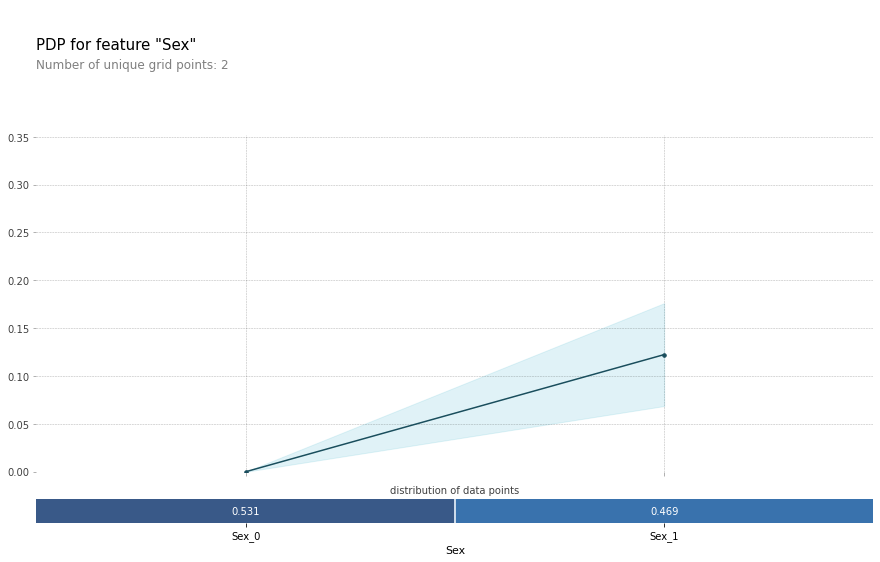

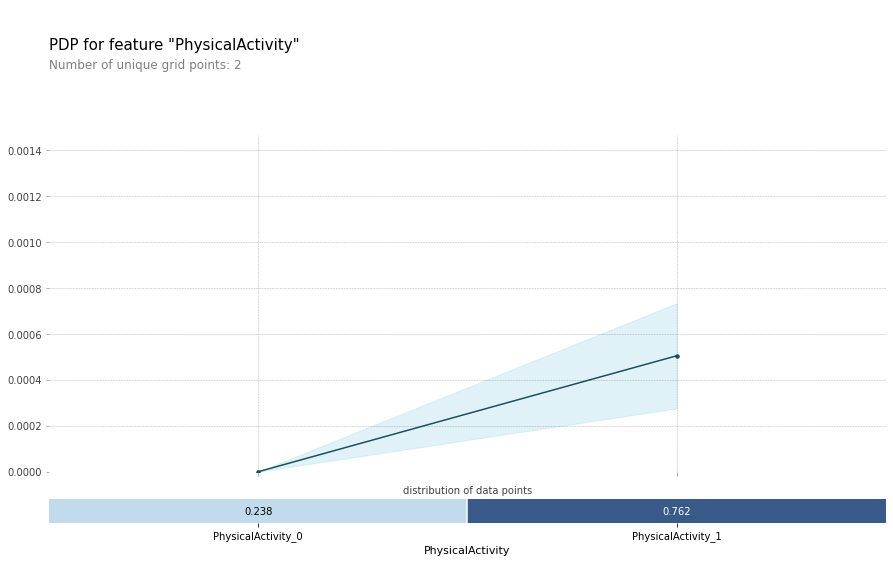

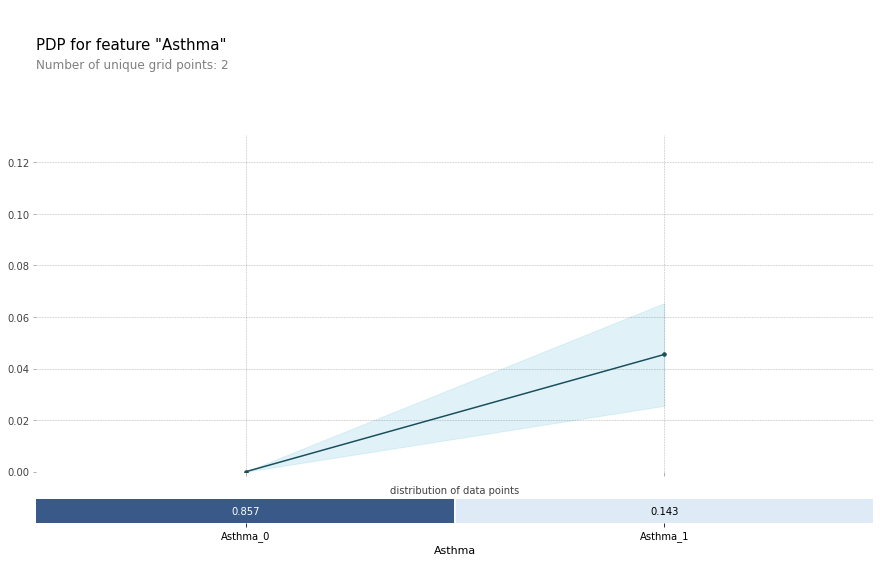

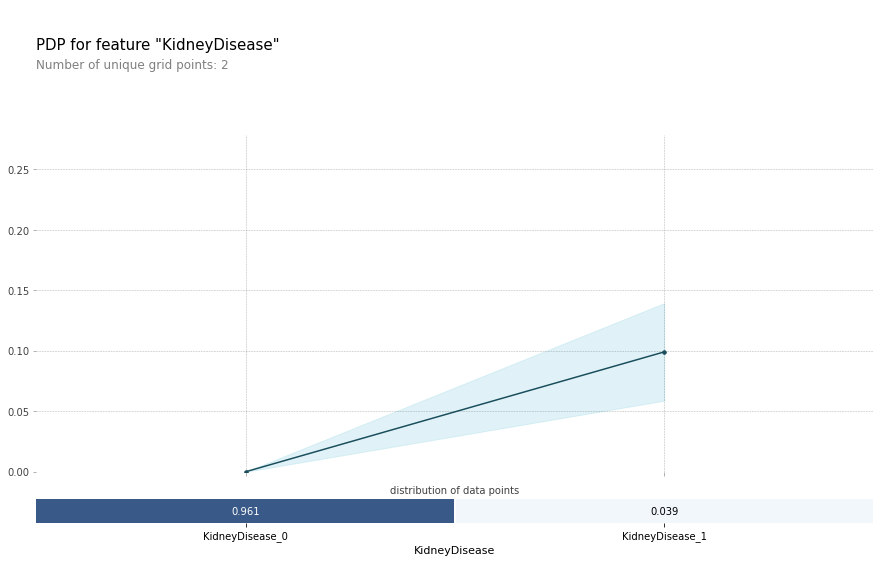

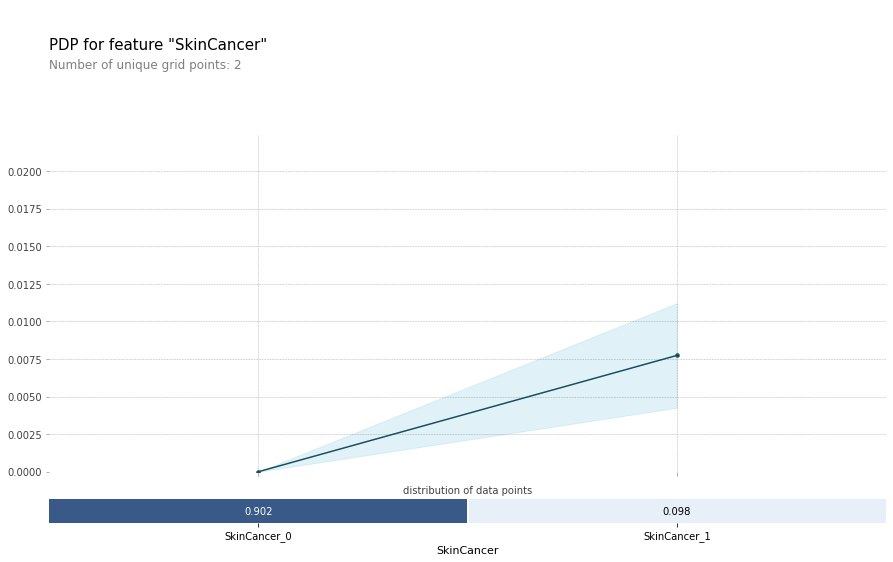

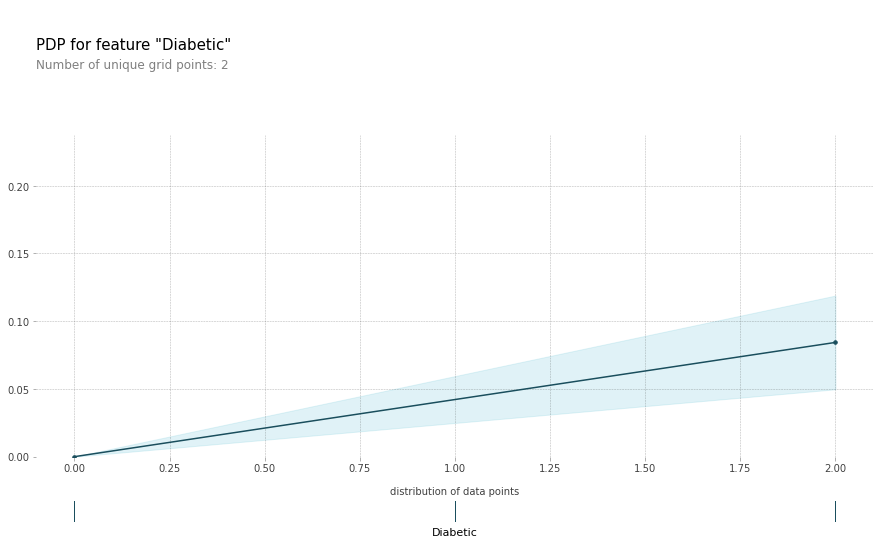

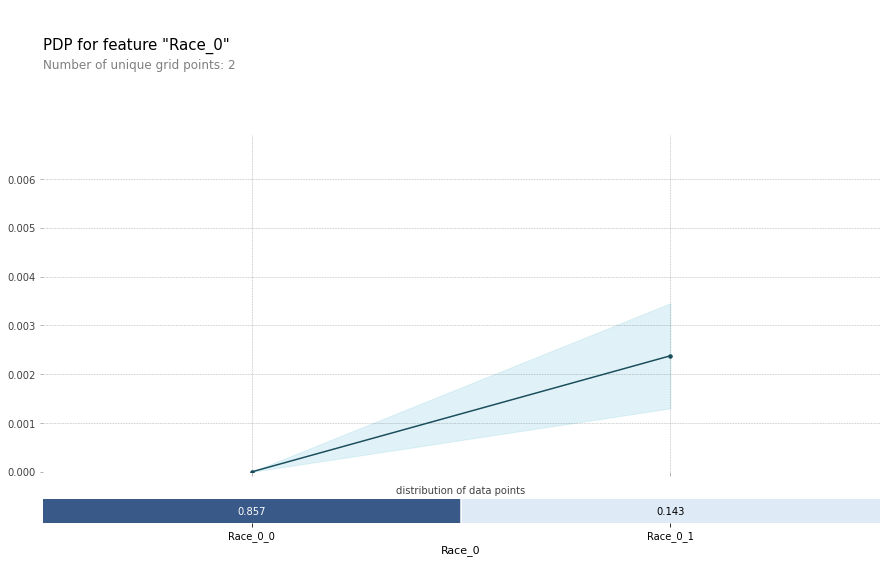

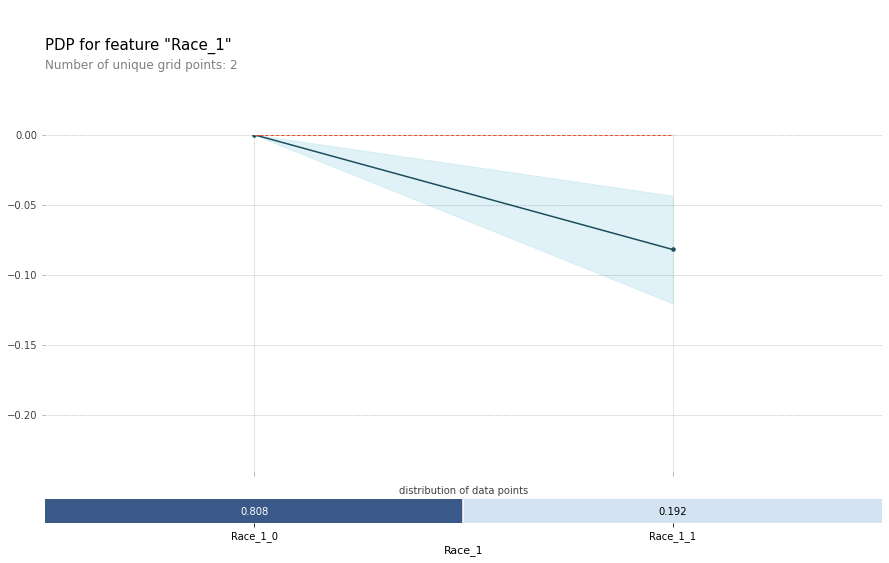

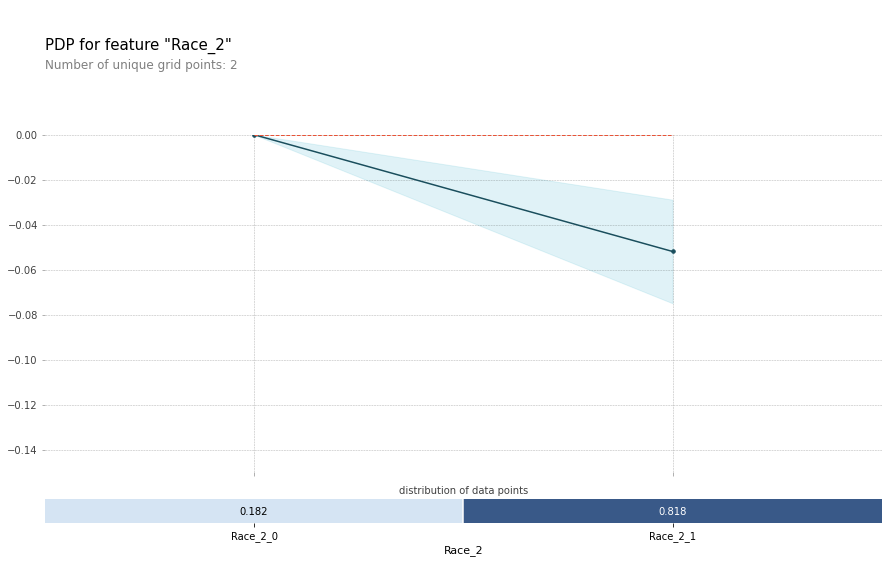

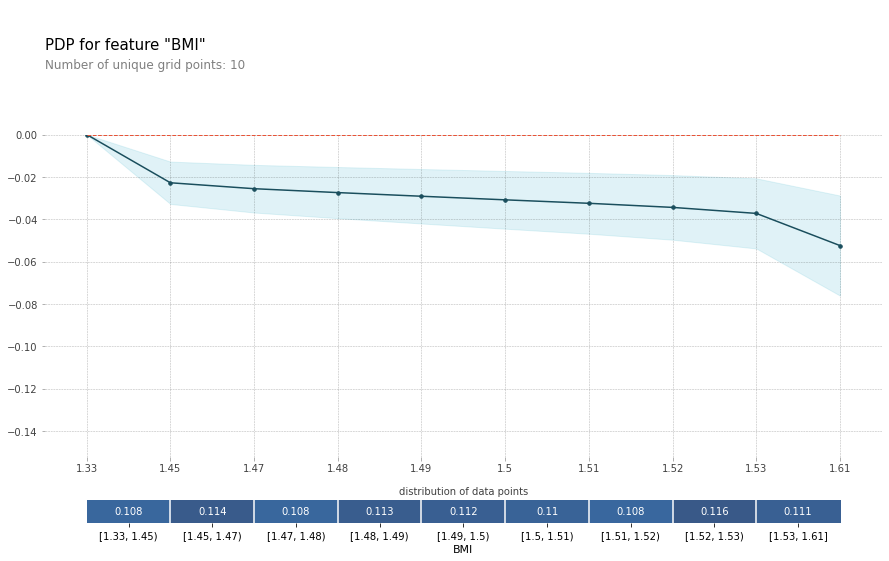

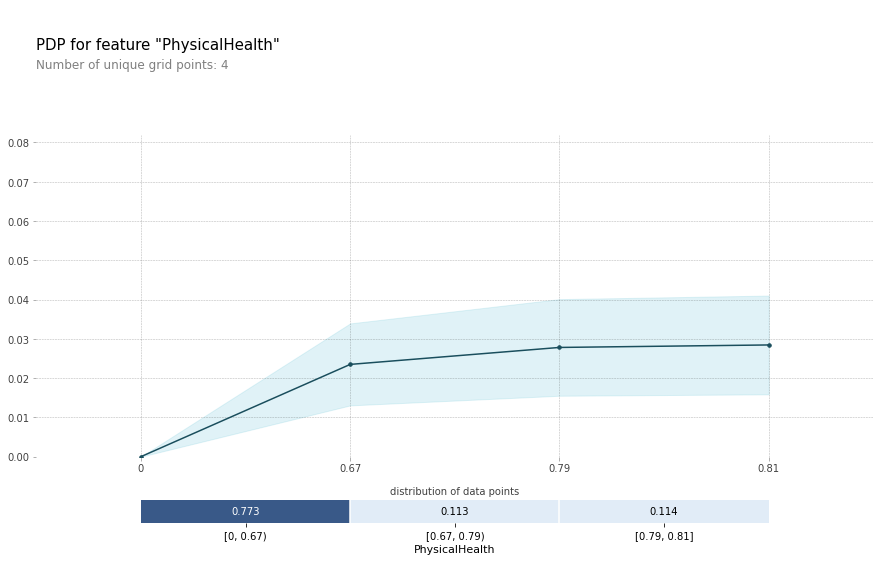

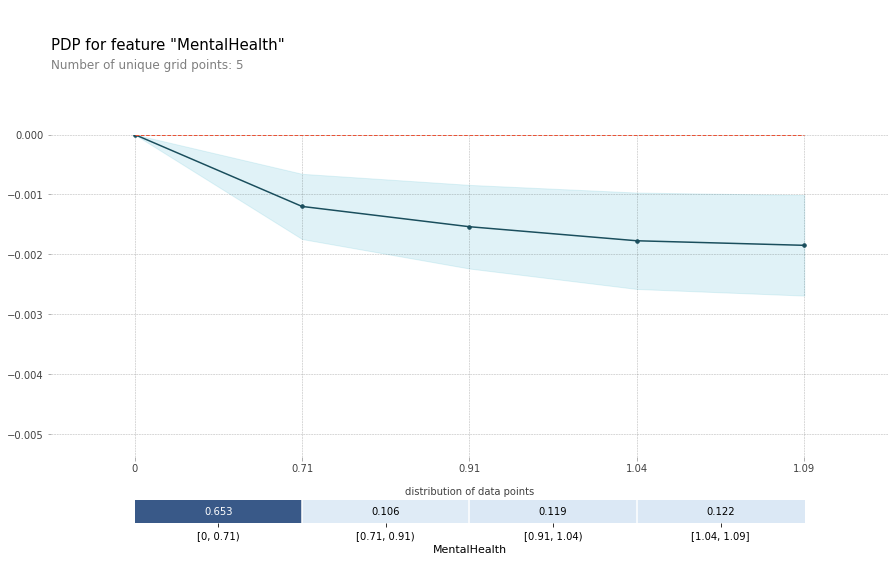

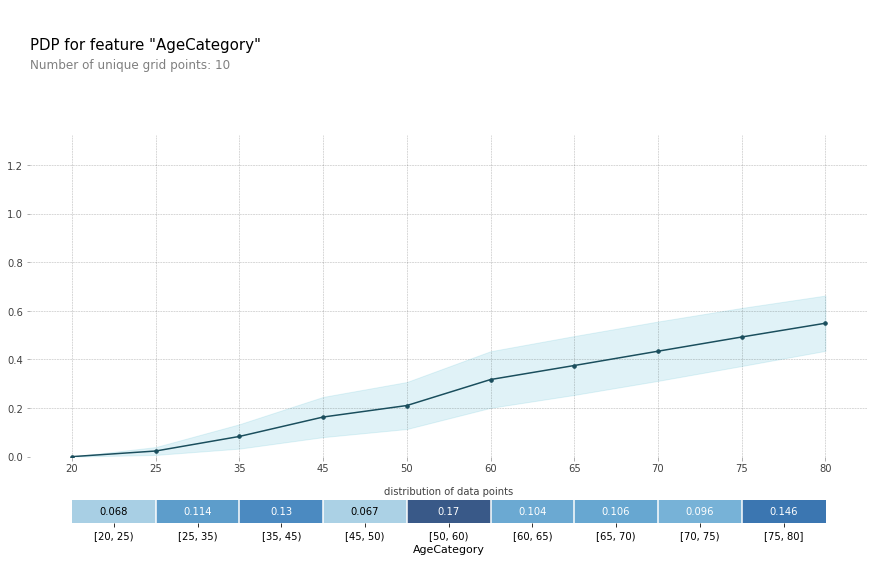

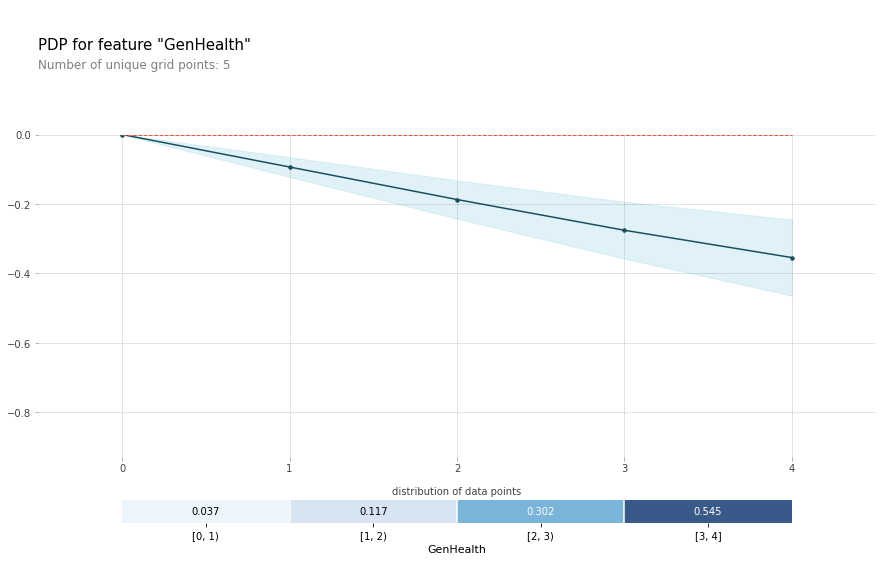

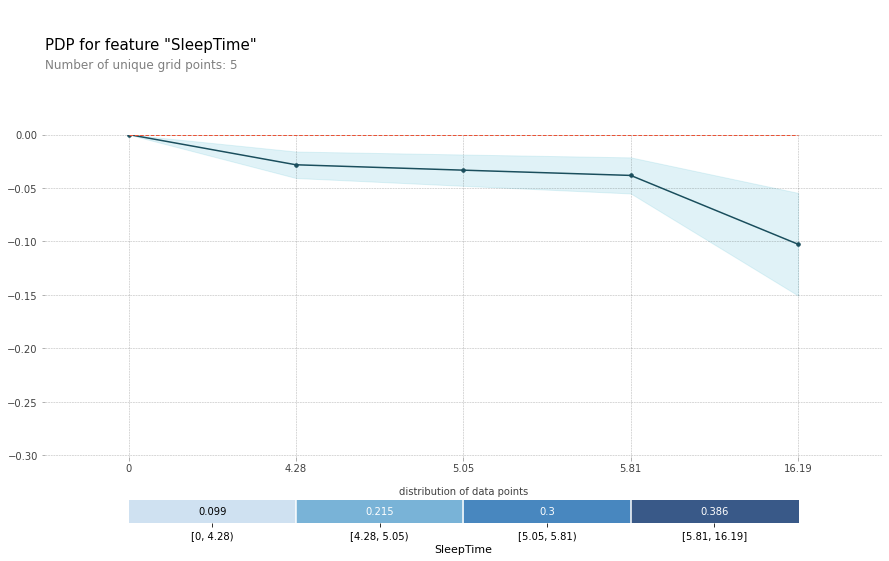

In [67]:
# PDP
for i in range (len(feature)):
  pdp_res = pdp.pdp_isolate(model=model_cost, dataset=x_test, model_features=features, feature=feature[i])
  pdp.pdp_plot(pdp_res, feature[i], plot_pts_dist=True)

for i in range (len(feature2)):
  pdp_res = pdp.pdp_isolate(model=model_cost, dataset=x_test, model_features=features, feature=feature2[i])
  pdp.pdp_plot(pdp_res, feature2[i], plot_pts_dist=True,  x_quantile=True)

In [68]:
# ICE
for i in range (len(feature)):
  pdp_res = pdp.pdp_isolate(model=model_cost, dataset=x_test, model_features=features, feature=feature[i])
  pdp.pdp_plot(pdp_res, feature[i],frac_to_plot=1000, plot_lines=True, plot_pts_dist=True)

for i in range (len(feature2)):
  pdp_res = pdp.pdp_isolate(model=model_cost, dataset=x_test, model_features=features, feature=feature2[i])
  pdp.pdp_plot(pdp_res, feature2[i], frac_to_plot=1000, plot_lines=True, plot_pts_dist=True,  x_quantile=True)

Output hidden; open in https://colab.research.google.com to view.

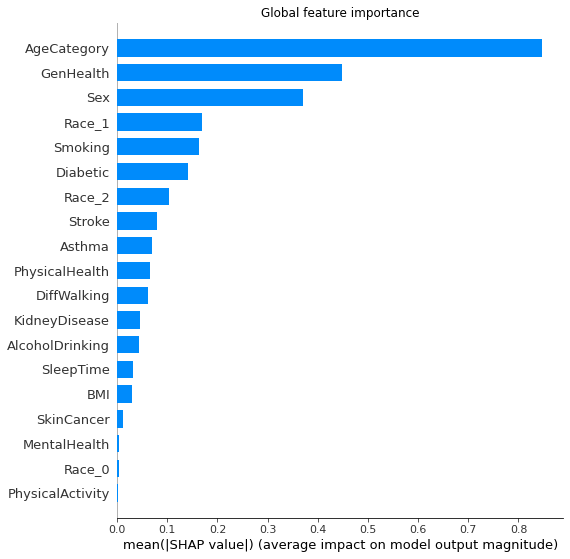

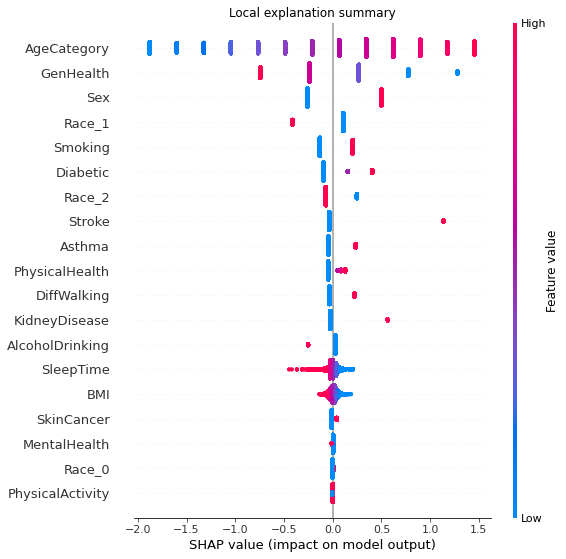

In [69]:
# SHAP
explainer = shap.Explainer(model_cost, x_train, feature_names=features)
shap_values = explainer(x_test)

plt.title('Global feature importance')
shap.summary_plot(shap_values, plot_type="bar")


plt.title('Local explanation summary')
shap.summary_plot(shap_values)